In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [ ]:
dados = pd.read_csv('filtered-heart-attack-data.csv', sep=';', dtype=str)

In [ ]:
print(dados.isnull().sum())

ASSISTMED     0
ATESTANTE     0
CIRCOBITO     0
CIRURGIA      0
CODMUNOCOR    0
CODMUNRES     0
COMUNSVOIM    0
CONTADOR      0
ESC           0
ESTCIV        0
EXAME         0
GESTACAO      0
GRAVIDEZ      0
LOCOCOR       0
MORTEPARTO    0
NECROPSIA     0
OBITOGRAV     0
OBITOPARTO    0
OBITOPUERP    0
OCUP          0
ORIGEM        0
RACACOR       0
SEXO          0
STDOEPIDEM    0
STDONOVA      0
TIPOBITO      0
TPMORTEOCO    0
TPOBITOCOR    0
TPPO1         0
LINHAA        0
LINHAA_1      0
LINHAA_2      0
LINHAA_3      0
LINHAB        0
LINHAB_1      0
LINHAC        0
LINHAC_1      0
LINHAC_2      0
LINHAD        0
LINHAD_1      0
LINHAD_2      0
LINHAII       0
LINHAII_1     0
LINHAII_2     0
LINHAII_3     0
LINHAII_4     0
LINHAII_5     0
CAUSABAS      0
CAUSABAS_O    0
dtype: int64


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ASSISTMED   3856 non-null   int64
 1   ATESTANTE   3856 non-null   int64
 2   CIRCOBITO   3856 non-null   int64
 3   CIRURGIA    3856 non-null   int64
 4   CODMUNOCOR  3856 non-null   int64
 5   CODMUNRES   3856 non-null   int64
 6   COMUNSVOIM  3856 non-null   int64
 7   CONTADOR    3856 non-null   int64
 8   ESC         3856 non-null   int64
 9   ESTCIV      3856 non-null   int64
 10  EXAME       3856 non-null   int64
 11  GESTACAO    3856 non-null   int64
 12  GRAVIDEZ    3856 non-null   int64
 13  LOCOCOR     3856 non-null   int64
 14  MORTEPARTO  3856 non-null   int64
 15  NECROPSIA   3856 non-null   int64
 16  OBITOGRAV   3856 non-null   int64
 17  OBITOPARTO  3856 non-null   int64
 18  OBITOPUERP  3856 non-null   int64
 19  OCUP        3856 non-null   int64
 20  ORIGEM      3856 non-null   in

In [ ]:
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv', sep='\t', na_values=['', ' ', '-', 'NA', 'null'])  # reconhece campos em branco como NaN

In [ ]:
print(dados.isnull().sum())
colunas_vazias = dados.columns[dados.isnull().all()]
print("Colunas totalmente vazias:", colunas_vazias)

ASSISTMED,ATESTANTE,CIRCOBITO,CIRURGIA,CODMUNOCOR,CODMUNRES,COMUNSVOIM,CONTADOR,ESC,ESTCIV,EXAME,GESTACAO,GRAVIDEZ,LOCOCOR,MORTEPARTO,NECROPSIA,OBITOGRAV,OBITOPARTO,OBITOPUERP,OCUP,ORIGEM,RACACOR,SEXO,STDOEPIDEM,STDONOVA,TIPOBITO,TPMORTEOCO,TPOBITOCOR,TPPO1,LINHAA,LINHAA_1,LINHAA_2,LINHAA_3,LINHAB,LINHAB_1,LINHAC,LINHAC_1,LINHAC_2,LINHAD,LINHAD_1,LINHAD_2,LINHAII,LINHAII_1,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,CAUSABAS,CAUSABAS_O    0
dtype: int64
Colunas totalmente vazias: Index([], dtype='object')


In [ ]:
dados = dados.dropna(axis=1, how='all')

In [ ]:
print("Formato após remoção:", dados.shape)
print("Colunas restantes:", dados.columns.tolist())

Formato após remoção: (3856, 1)
Colunas restantes: ['ASSISTMED,ATESTANTE,CIRCOBITO,CIRURGIA,CODMUNOCOR,CODMUNRES,COMUNSVOIM,CONTADOR,ESC,ESTCIV,EXAME,GESTACAO,GRAVIDEZ,LOCOCOR,MORTEPARTO,NECROPSIA,OBITOGRAV,OBITOPARTO,OBITOPUERP,OCUP,ORIGEM,RACACOR,SEXO,STDOEPIDEM,STDONOVA,TIPOBITO,TPMORTEOCO,TPOBITOCOR,TPPO1,LINHAA,LINHAA_1,LINHAA_2,LINHAA_3,LINHAB,LINHAB_1,LINHAC,LINHAC_1,LINHAC_2,LINHAD,LINHAD_1,LINHAD_2,LINHAII,LINHAII_1,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,CAUSABAS,CAUSABAS_O']


In [ ]:
porcentagem_nulos = dados.isnull().mean() * 100
porcentagem_nulos = porcentagem_nulos.sort_values(ascending=False)

# Exibe as 10 colunas com mais valores faltantes
print(porcentagem_nulos.head(10))

ASSISTMED,ATESTANTE,CIRCOBITO,CIRURGIA,CODMUNOCOR,CODMUNRES,COMUNSVOIM,CONTADOR,ESC,ESTCIV,EXAME,GESTACAO,GRAVIDEZ,LOCOCOR,MORTEPARTO,NECROPSIA,OBITOGRAV,OBITOPARTO,OBITOPUERP,OCUP,ORIGEM,RACACOR,SEXO,STDOEPIDEM,STDONOVA,TIPOBITO,TPMORTEOCO,TPOBITOCOR,TPPO1,LINHAA,LINHAA_1,LINHAA_2,LINHAA_3,LINHAB,LINHAB_1,LINHAC,LINHAC_1,LINHAC_2,LINHAD,LINHAD_1,LINHAD_2,LINHAII,LINHAII_1,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,CAUSABAS,CAUSABAS_O    0.0
dtype: float64


In [ ]:
faltantes = porcentagem_nulos[porcentagem_nulos > 0]
print(faltantes)

Series([], dtype: float64)


In [ ]:
# Criando o dicionário de siglas e descrições
dicionario_colunas = {
    'FONTE': 'Fonte notificadora do óbito (ex: hospital, domicílio, IML etc.)',
    'CIRCOBITO': 'Circunstância do óbito (acidente, violência, natural etc.)',
    'CIRURGIA': 'Realizou cirurgia antes do óbito',
    'EXAME': 'Realização de exame que comprovou a causa do óbito',
    'LINHAD': 'Linha D da declaração de óbito (causa básica, início da cadeia causal)',
    'COMUNSVOIM': 'Comunicação ao Serviço de Verificação de Óbito/IML',
    'SERIESCFAL': 'Série escolar do falecido',
    'LINHAII': 'Linha II – condições que contribuíram para o óbito',
    'LINHAC': 'Linha C da declaração de óbito',
    'NUDIASOBIN': 'Número de dias que o falecido sobreviveu após internação',
    'DTINVESTIG': 'Data da investigação do óbito',
    'FONTEINV': 'Fonte da informação da investigação',
    'CODESTAB': 'Código do estabelecimento onde ocorreu o óbito',
    'TPMORTEOCO': 'Tipo de morte no local de ocorrência',
    'OBITOPUERP': 'Óbito no período puerperal',
    'OBITOGRAV': 'Óbito durante a gravidez',
    'LINHAB': 'Linha B da declaração de óbito',
    'NATURAL0': 'Indica se o óbito foi natural ou não',
    'NECROPSIA': 'Se foi realizada necrópsia',
    'ASSISTMED': 'Se houve assistência médica antes do óbito',
    'TPPOS': 'Tipo de pós-óbito informado',
    'OCUP': 'Ocupação da pessoa falecida',
    'DTCONINV': 'Data de conclusão da investigação',
    'TPOBITOCOR': 'Tipo de local onde ocorreu o óbito',
    'DTCADINV': 'Data de cadastro da investigação',
    'ATESTANTE': 'Quem atestou o óbito',
    'ESC2010': 'Escolaridade do falecido (classificação do Censo 2010)',
    'ESC': 'Escolaridade do falecido (classificação antiga)',
    'HORAOBITO': 'Hora do óbito',
    'RACACOR': 'Raça/cor da pessoa falecida',
    'ESTCIV': 'Estado civil',
    'DTATESTADO': 'Data do atestado de óbito',
    'LINHAA': 'Linha A da declaração de óbito',
    'DTCADASTRO': 'Data de cadastro da declaração',
    'CAUSABAS_O': 'Causa básica reclassificada após investigação',
    'DTRECEBIM': 'Data de recebimento da declaração'
}

# Transformando em DataFrame para visualização
df_dicionario = pd.DataFrame(list(dicionario_colunas.items()), columns=['Sigla', 'Descrição'])

# Visualizando
pd.set_option('display.max_colwidth', None)
display(df_dicionario)

Sigla  \
0        FONTE   
1    CIRCOBITO   
2     CIRURGIA   
3        EXAME   
4       LINHAD   
5   COMUNSVOIM   
6   SERIESCFAL   
7      LINHAII   
8       LINHAC   
9   NUDIASOBIN   
10  DTINVESTIG   
11    FONTEINV   
12    CODESTAB   
13  TPMORTEOCO   
14  OBITOPUERP   
15   OBITOGRAV   
16      LINHAB   
17    NATURAL0   
18   NECROPSIA   
19   ASSISTMED   
20       TPPOS   
21        OCUP   
22    DTCONINV   
23  TPOBITOCOR   
24    DTCADINV   
25   ATESTANTE   
26     ESC2010   
27         ESC   
28   HORAOBITO   
29     RACACOR   
30      ESTCIV   
31  DTATESTADO   
32      LINHAA   
33  DTCADASTRO   
34  CAUSABAS_O   
35   DTRECEBIM   

                                                                 Descrição  
0          Fonte notificadora do óbito (ex: hospital, domicílio, IML etc.)  
1               Circunstância do óbito (acidente, violência, natural etc.)  
2                                         Realizou cirurgia antes do óbito  
3                       Realização de exame que comprovou a causa do óbito  
4   Linha D da declaração de óbito (causa básica, início da cadeia causal)  
5                       Comunicação ao Serviço de Verificação de Óbito/IML  
6                                                Série escolar do falecido  
7                       Linha II – condições que contribuíram para o óbito  
8                                           Linha C da declaração de óbito  
9                 Número de dias que o falecido sobreviveu após internação  
10                                           Data da investigação do óbito  
11                                     Fonte da informação da investigação  
12                          Código do estabelecimento onde ocorreu o óbito  
13                                    Tipo de morte no local de ocorrência  
14                                              Óbito no período puerperal  
15                                                Óbito durante a gravidez  
16                                          Linha B da declaração de óbito  
17                                    Indica se o óbito foi natural ou não  
18                                              Se foi realizada necrópsia  
19                              Se houve assistência médica antes do óbito  
20                                             Tipo de pós-óbito informado  
21                                             Ocupação da pessoa falecida  
22                                       Data de conclusão da investigação  
23                                      Tipo de local onde ocorreu o óbito  
24                                        Data de cadastro da investigação  
25                                                    Quem atestou o óbito  
26                  Escolaridade do falecido (classificação do Censo 2010)  
27                         Escolaridade do falecido (classificação antiga)  
28                                                           Hora do óbito  
29                                             Raça/cor da pessoa falecida  
30                                                            Estado civil  
31                                               Data do atestado de óbito  
32                                          Linha A da declaração de óbito  
33                                          Data de cadastro da declaração  
34                           Causa básica reclassificada após investigação  
35                                       Data de recebimento da declaração

In [ ]:
print(dados.columns.tolist())

['ASSISTMED,ATESTANTE,CIRCOBITO,CIRURGIA,CODMUNOCOR,CODMUNRES,COMUNSVOIM,CONTADOR,ESC,ESTCIV,EXAME,GESTACAO,GRAVIDEZ,LOCOCOR,MORTEPARTO,NECROPSIA,OBITOGRAV,OBITOPARTO,OBITOPUERP,OCUP,ORIGEM,RACACOR,SEXO,STDOEPIDEM,STDONOVA,TIPOBITO,TPMORTEOCO,TPOBITOCOR,TPPO1,LINHAA,LINHAA_1,LINHAA_2,LINHAA_3,LINHAB,LINHAB_1,LINHAC,LINHAC_1,LINHAC_2,LINHAD,LINHAD_1,LINHAD_2,LINHAII,LINHAII_1,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,CAUSABAS,CAUSABAS_O']


In [ ]:
dados.dtypes.value_counts()

object    1
dtype: int64

In [ ]:
dados.select_dtypes(include='float').columns.tolist()
dados.select_dtypes(include='object').columns.tolist()
dados.select_dtypes(include='int').columns.tolist()

[]

In [ ]:
print(dados.head())

  ASSISTMED,ATESTANTE,CIRCOBITO,CIRURGIA,CODMUNOCOR,CODMUNRES,COMUNSVOIM,CONTADOR,ESC,ESTCIV,EXAME,GESTACAO,GRAVIDEZ,LOCOCOR,MORTEPARTO,NECROPSIA,OBITOGRAV,OBITOPARTO,OBITOPUERP,OCUP,ORIGEM,RACACOR,SEXO,STDOEPIDEM,STDONOVA,TIPOBITO,TPMORTEOCO,TPOBITOCOR,TPPO1,LINHAA,LINHAA_1,LINHAA_2,LINHAA_3,LINHAB,LINHAB_1,LINHAC,LINHAC_1,LINHAC_2,LINHAD,LINHAD_1,LINHAD_2,LINHAII,LINHAII_1,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,CAUSABAS,CAUSABAS_O
0                                                                                                                                                                                                                                                                                                             0,1,0,0,120020,120042,0,635,3,1,0,0,0,1,0,0,2,0,3,999992,1,4,2,0,1,2,8,9,0,16688,0,0,0,16092,0,16570,0,0,8219,0,0,0,0,0,0,0,0,8219,8219
1                                                                                                                           

In [ ]:
print(dados.dtypes)

ASSISTMED,ATESTANTE,CIRCOBITO,CIRURGIA,CODMUNOCOR,CODMUNRES,COMUNSVOIM,CONTADOR,ESC,ESTCIV,EXAME,GESTACAO,GRAVIDEZ,LOCOCOR,MORTEPARTO,NECROPSIA,OBITOGRAV,OBITOPARTO,OBITOPUERP,OCUP,ORIGEM,RACACOR,SEXO,STDOEPIDEM,STDONOVA,TIPOBITO,TPMORTEOCO,TPOBITOCOR,TPPO1,LINHAA,LINHAA_1,LINHAA_2,LINHAA_3,LINHAB,LINHAB_1,LINHAC,LINHAC_1,LINHAC_2,LINHAD,LINHAD_1,LINHAD_2,LINHAII,LINHAII_1,LINHAII_2,LINHAII_3,LINHAII_4,LINHAII_5,CAUSABAS,CAUSABAS_O    object
dtype: object


In [ ]:
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv', sep=',', encoding='utf-8')

In [ ]:
print(dados.dtypes)

ASSISTMED     int64
ATESTANTE     int64
CIRCOBITO     int64
CIRURGIA      int64
CODMUNOCOR    int64
CODMUNRES     int64
COMUNSVOIM    int64
CONTADOR      int64
ESC           int64
ESTCIV        int64
EXAME         int64
GESTACAO      int64
GRAVIDEZ      int64
LOCOCOR       int64
MORTEPARTO    int64
NECROPSIA     int64
OBITOGRAV     int64
OBITOPARTO    int64
OBITOPUERP    int64
OCUP          int64
ORIGEM        int64
RACACOR       int64
SEXO          int64
STDOEPIDEM    int64
STDONOVA      int64
TIPOBITO      int64
TPMORTEOCO    int64
TPOBITOCOR    int64
TPPO1         int64
LINHAA        int64
LINHAA_1      int64
LINHAA_2      int64
LINHAA_3      int64
LINHAB        int64
LINHAB_1      int64
LINHAC        int64
LINHAC_1      int64
LINHAC_2      int64
LINHAD        int64
LINHAD_1      int64
LINHAD_2      int64
LINHAII       int64
LINHAII_1     int64
LINHAII_2     int64
LINHAII_3     int64
LINHAII_4     int64
LINHAII_5     int64
CAUSABAS      int64
CAUSABAS_O    int64
dtype: object


In [ ]:
print("Tem NaN?", dados.isnull().values.any())
print("Tem inf?", np.isinf(dados.values).any())

Tem NaN? False
Tem inf? False


In [ ]:
colunas_com_nan = dados.isnull().sum()
colunas_com_nan = colunas_com_nan[colunas_com_nan > 0]
print("Colunas com NaN:")
print(colunas_com_nan.index.tolist())

Colunas com NaN:
[]


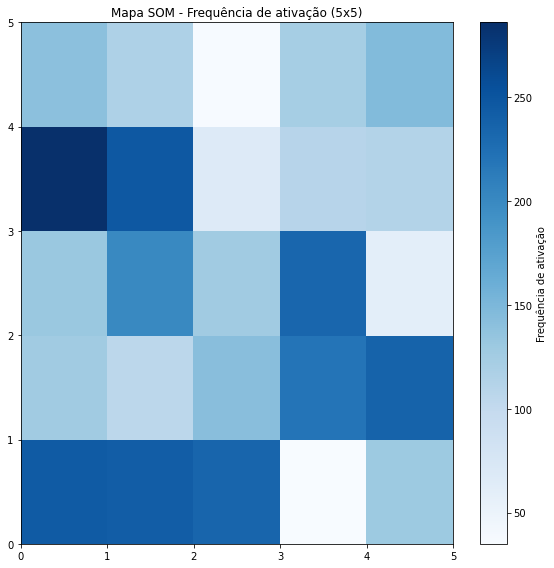

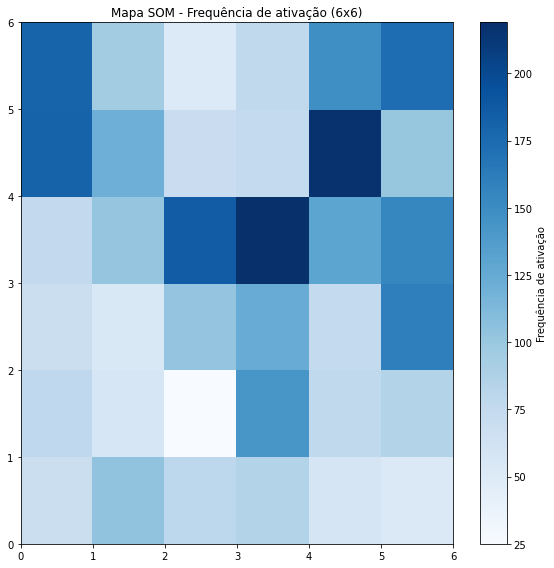

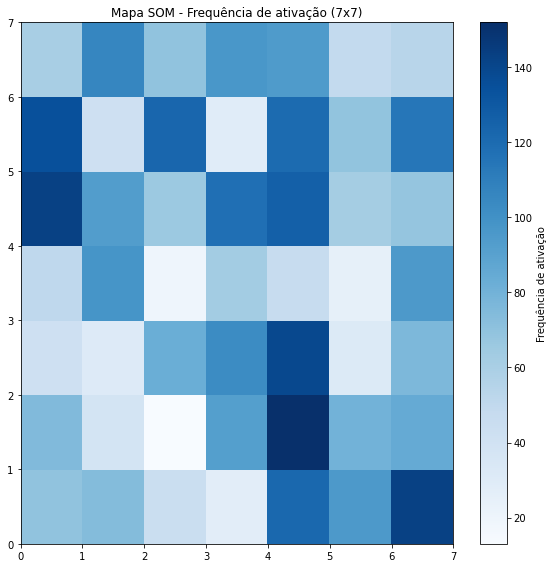

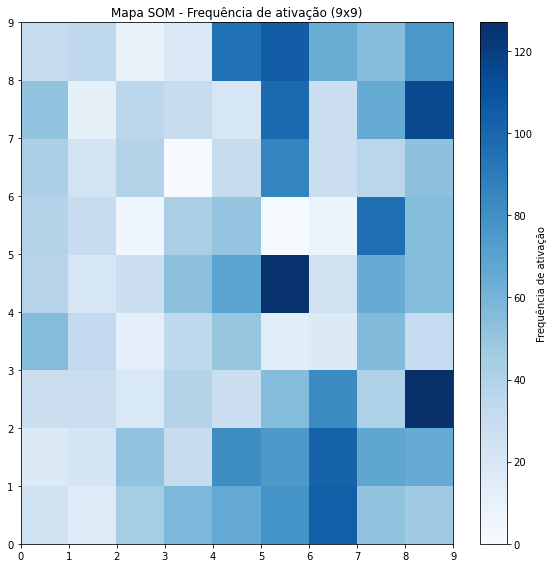

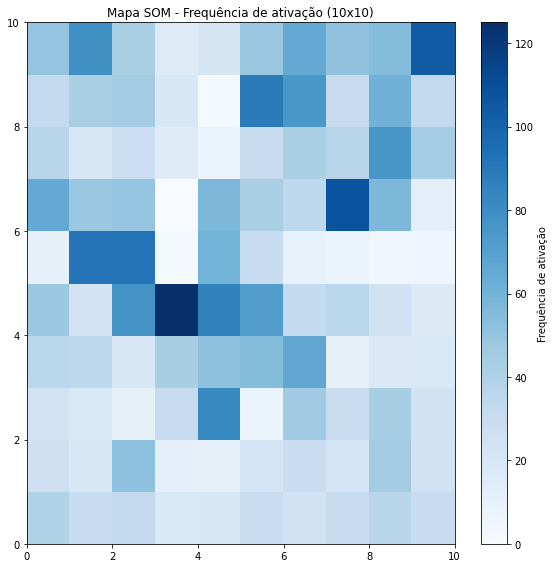

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np
import random

# Fixar seeds para reprodutibilidade
random.seed(42)
np.random.seed(42)

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Selecionar somente variáveis numéricas
df_num = dados.select_dtypes(include=['int64', 'float64'])

# Normalização
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_num)

# Loop para gerar SOMs de 4x4 até 10x10
for tamanho in range(4, 11):
    # Fixar novamente as seeds a cada iteração
    random.seed(42)
    np.random.seed(42)

    # Inicializar o SOM
    som = MiniSom(x=tamanho, y=tamanho, input_len=dados_normalizados.shape[1],
                  sigma=1.5, learning_rate=0.8)

    # Inicializar pesos manualmente e normalizar
    pesos_iniciais = np.random.rand(tamanho, tamanho, dados_normalizados.shape[1])
    pesos_iniciais /= np.linalg.norm(pesos_iniciais, axis=2, keepdims=True)
    som._weights = pesos_iniciais.copy()

    # Treinar o SOM
    som.train_batch(dados_normalizados, num_iteration=10000)

    # Plotar a frequência de ativação
    plt.figure(figsize=(8, 8))
    frequencia = som.activation_response(dados_normalizados)
    plt.pcolor(frequencia.T, cmap='Blues')
    plt.colorbar(label='Frequência de ativação')
    plt.title(f'Mapa SOM - Frequência de ativação ({tamanho}x{tamanho})')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Fixar seeds globais
np.random.seed(42)

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# 1. Normalizar os dados
df_num = dados.select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_num)

# 2. Lista de neighborhood_functions que vamos testar
neigh_funcs = ['gaussian', 'mexican_hat', 'bubble', 'triangle']

# 3. Gerar e plotar um mapa para cada função
plt.figure(figsize=(20, 20))

for i, func in enumerate(neigh_funcs):
    # Ajustar sigma dependendo da função
    sigma_value = 2 if func in ['bubble', 'triangle'] else 1.5

    # Criar o SOM com semente fixa
    som = MiniSom(
        x=6,
        y=6,
        input_len=dados_normalizados.shape[1],
        sigma=sigma_value,
        learning_rate=0.3,
        neighborhood_function=func,
        random_seed=42
    )

    # Inicializar pesos manualmente com normalização
    pesos_iniciais = np.random.rand(6, 6, dados_normalizados.shape[1])
    pesos_iniciais /= np.linalg.norm(pesos_iniciais, axis=2, keepdims=True)
    som._weights = pesos_iniciais.copy()

    # Treinar o SOM
    som.train_batch(dados_normalizados, num_iteration=3000)

    # Plotar
    plt.subplot(2, 2, i + 1)
    frequencia = som.activation_response(dados_normalizados)
    plt.pcolor(frequencia.T, cmap='Blues')
    plt.colorbar(label='Frequência de ativação')
    plt.title(f'Mapa SOM - {func}')

plt.tight_layout()
plt.show()


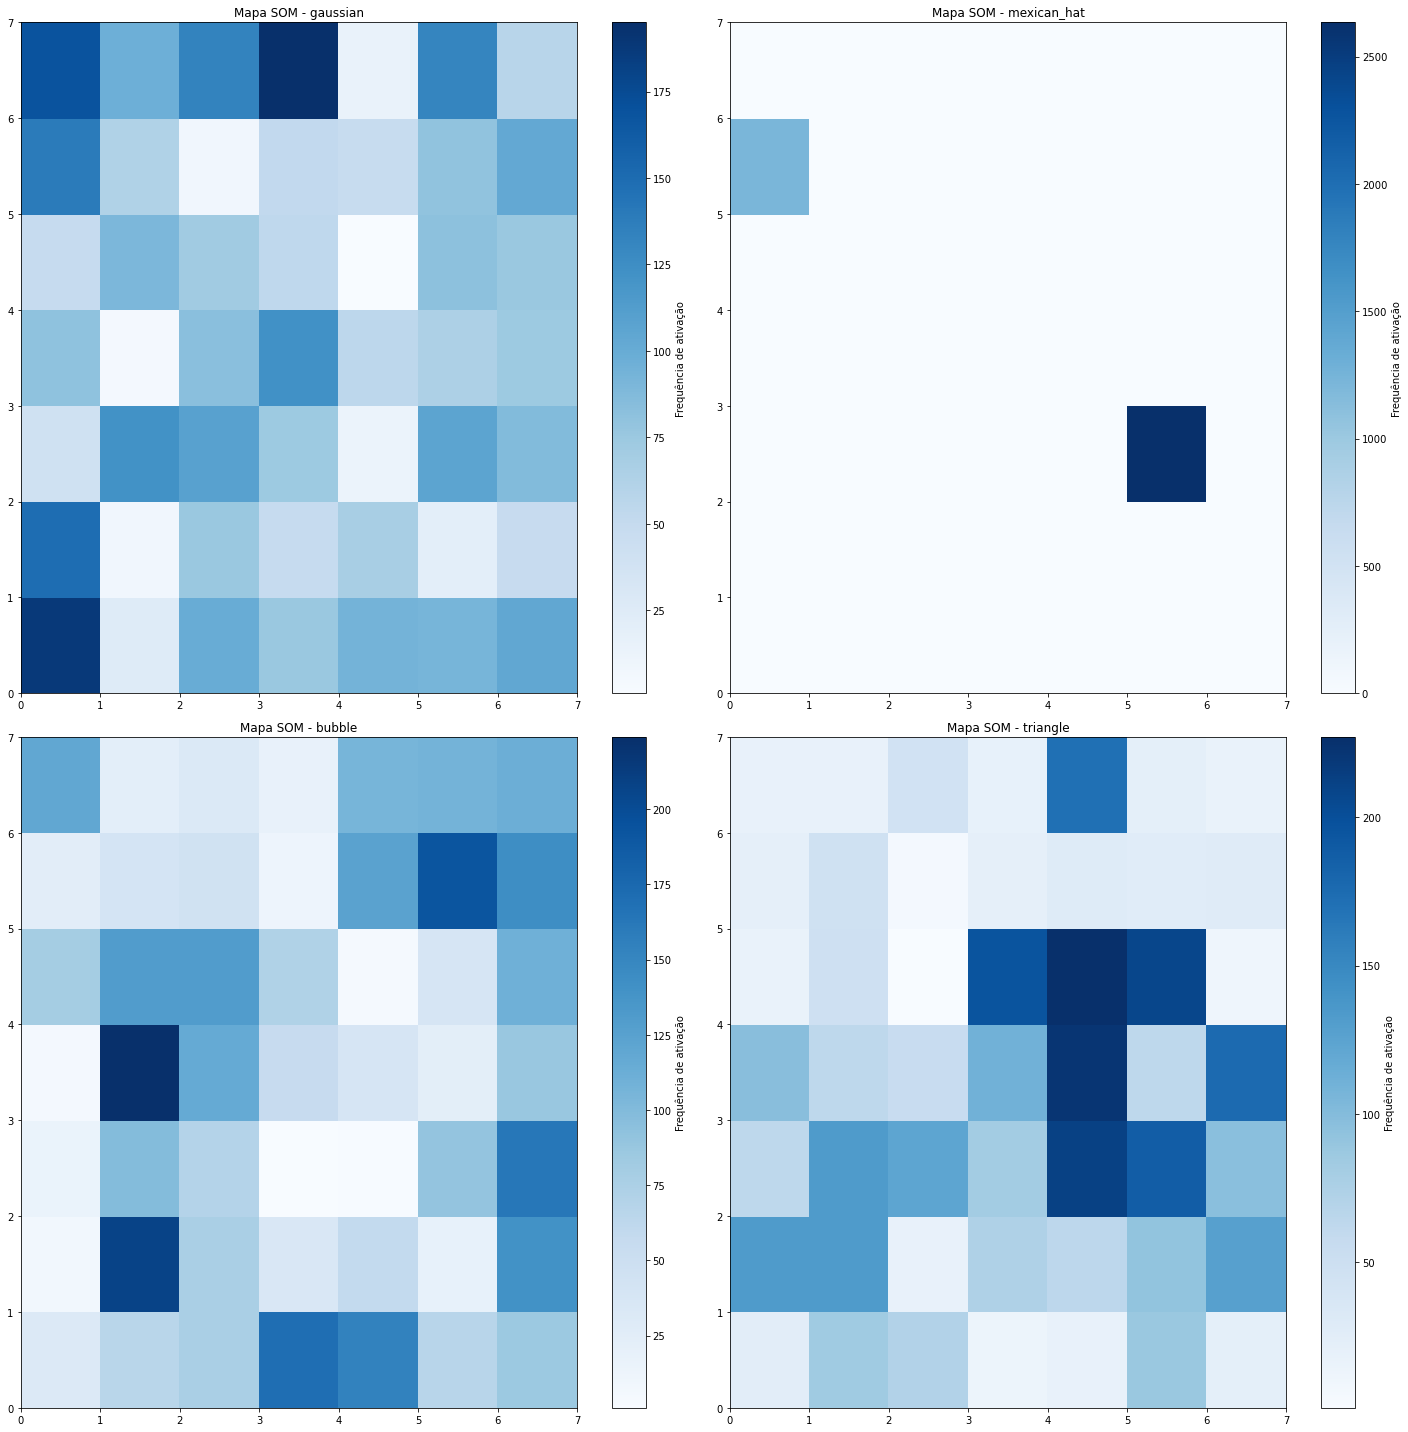

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Definir a semente para reprodutibilidade total
np.random.seed(42)

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# 1. Normalizar os dados numéricos
df_num = dados.select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_num)

# 2. Lista das funções de vizinhança a testar
neigh_funcs = ['gaussian', 'mexican_hat', 'bubble', 'triangle']

# 3. Gerar e plotar o mapa SOM para cada função
plt.figure(figsize=(20, 20))

for i, func in enumerate(neigh_funcs):
    # Ajustar sigma dependendo da função
    sigma_value = 2 if func in ['bubble', 'triangle'] else 1.5

    # Criar o SOM com random_seed fixo
    som = MiniSom(
        x=7,
        y=7,
        input_len=dados_normalizados.shape[1],
        sigma=sigma_value,
        learning_rate=0.3,
        neighborhood_function=func,
        random_seed=42
    )

    # Inicialização manual dos pesos com normalização
    pesos_iniciais = np.random.rand(7, 7, dados_normalizados.shape[1])
    pesos_iniciais /= np.linalg.norm(pesos_iniciais, axis=2, keepdims=True)
    som._weights = pesos_iniciais.copy()

    # Treinar SOM com método determinístico
    som.train_batch(dados_normalizados, num_iteration=3000)

    # Plotar frequência de ativação
    plt.subplot(2, 2, i + 1)
    frequencia = som.activation_response(dados_normalizados)
    plt.pcolor(frequencia.T, cmap='Blues')
    plt.colorbar(label='Frequência de ativação')
    plt.title(f'Mapa SOM - {func}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Semente global para reprodutibilidade
np.random.seed(42)

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# 1. Normalizar os dados
df_num = dados.select_dtypes(include=['int64', 'float64'])

scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_num)

# 2. Lista das funções de vizinhança que vamos testar
neigh_funcs = ['gaussian', 'mexican_hat', 'bubble', 'triangle']

# 3. Gerar e plotar um mapa SOM para cada função
plt.figure(figsize=(20, 20))

for i, func in enumerate(neigh_funcs):
    # Ajustar sigma dependendo da função
    sigma_value = 2 if func in ['bubble', 'triangle'] else 1.5

    # Criar o SOM com parâmetros fixos
    som = MiniSom(
        x=8,
        y=8,
        input_len=dados_normalizados.shape[1],
        sigma=sigma_value,
        learning_rate=0.3,
        neighborhood_function=func,
        random_seed=42
    )

    # Inicialização manual dos pesos para garantir consistência
    pesos_iniciais = np.random.rand(8, 8, dados_normalizados.shape[1])
    pesos_iniciais /= np.linalg.norm(pesos_iniciais, axis=2, keepdims=True)
    som._weights = pesos_iniciais.copy()

    # Treinamento determinístico
    som.train_batch(dados_normalizados, num_iteration=3000)

    # Plotar
    plt.subplot(2, 2, i + 1)
    frequencia = som.activation_response(dados_normalizados)
    plt.pcolor(frequencia.T, cmap='Blues')
    plt.colorbar(label='Frequência de ativação')
    plt.title(f'Mapa SOM - {func}')

plt.tight_layout()
plt.show()


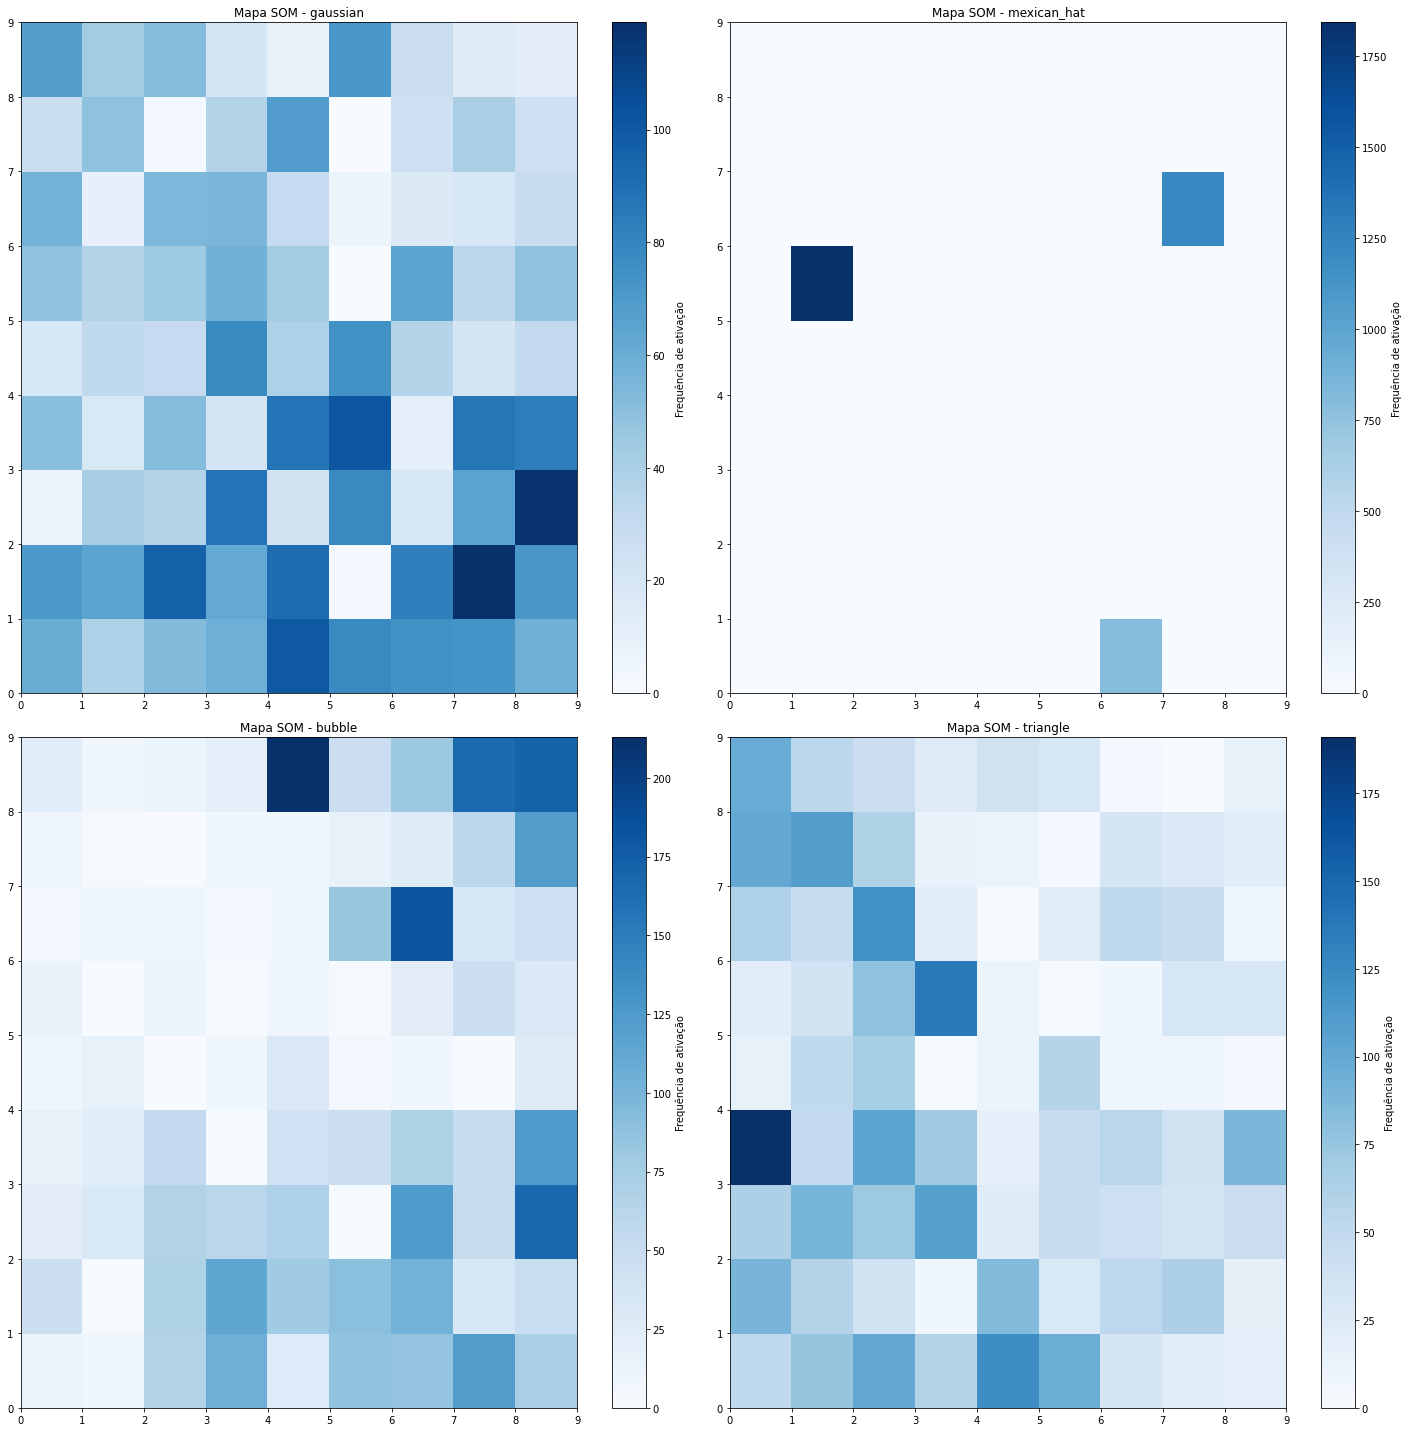

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# 1. Definir semente global para reprodutibilidade
np.random.seed(42)

# 2. Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# 3. Normalizar os dados numéricos
df_num = dados.select_dtypes(include=['int64', 'float64'])

scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_num)

# 4. Lista de funções de vizinhança
neigh_funcs = ['gaussian', 'mexican_hat', 'bubble', 'triangle']

# 5. Gerar e plotar um mapa SOM para cada função
plt.figure(figsize=(20, 20))

for i, func in enumerate(neigh_funcs):
    # Ajustar sigma dependendo da função
    sigma_value = 2 if func in ['bubble', 'triangle'] else 1.5

    # Criar SOM com parâmetros fixos
    som = MiniSom(
        x=9,
        y=9,
        input_len=dados_normalizados.shape[1],
        sigma=sigma_value,
        learning_rate=0.3,
        neighborhood_function=func,
        random_seed=42
    )

    # Inicializar pesos manualmente (determinístico)
    pesos_iniciais = np.random.rand(9, 9, dados_normalizados.shape[1])
    pesos_iniciais /= np.linalg.norm(pesos_iniciais, axis=2, keepdims=True)
    som._weights = pesos_iniciais.copy()

    # Treinamento determinístico
    som.train_batch(dados_normalizados, num_iteration=3000)

    # Plotar o mapa de frequência de ativação
    plt.subplot(2, 2, i + 1)
    frequencia = som.activation_response(dados_normalizados)
    plt.pcolor(frequencia.T, cmap='Blues')
    plt.colorbar(label='Frequência de ativação')
    plt.title(f'Mapa SOM - {func}')

plt.tight_layout()
plt.show()


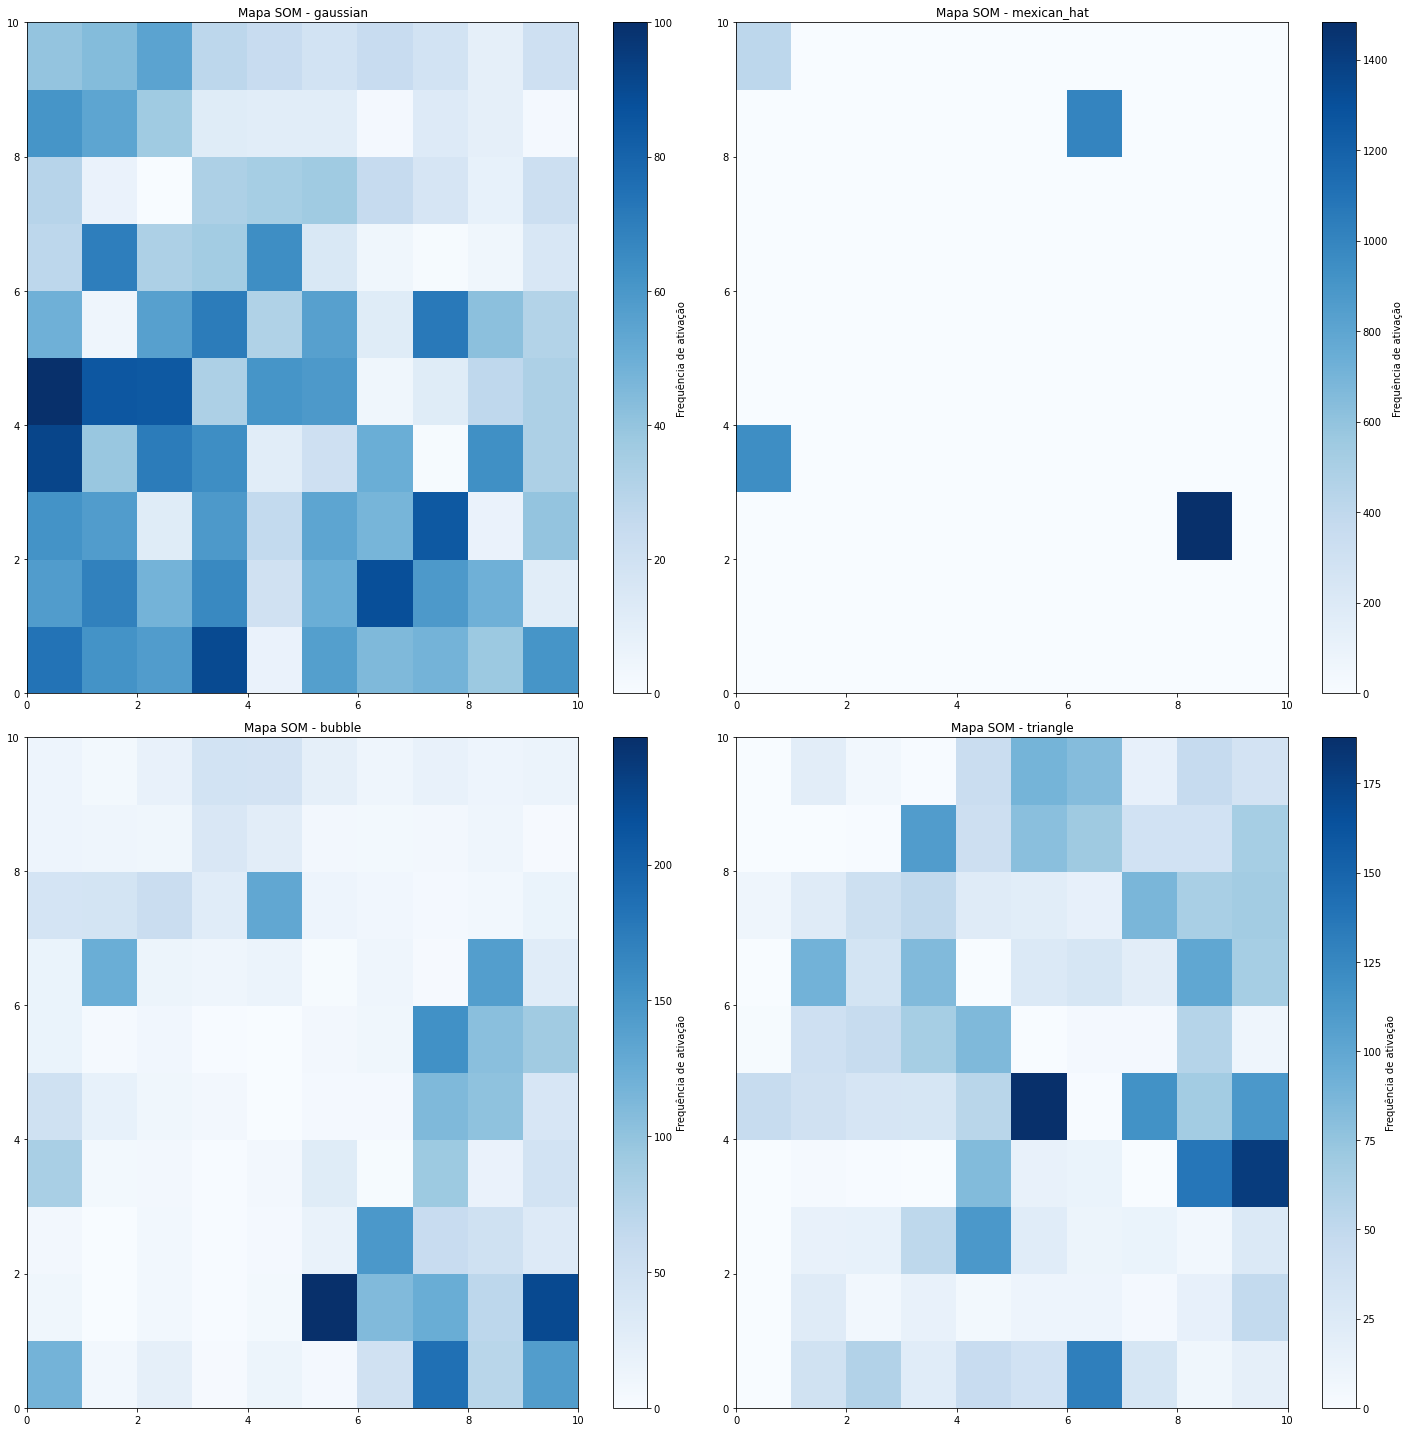

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# 1. Fixar a semente para garantir reprodutibilidade
np.random.seed(42)

# 2. Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# 3. Normalizar os dados numéricos
df_num = dados.select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_num)

# 4. Lista de funções de vizinhança
neigh_funcs = ['gaussian', 'mexican_hat', 'bubble', 'triangle']

# 5. Criar gráfico com múltiplos mapas SOM
plt.figure(figsize=(20, 20))

for i, func in enumerate(neigh_funcs):
    # Ajustar o sigma conforme a função de vizinhança
    sigma_value = 2 if func in ['bubble', 'triangle'] else 1.5

    # Criar SOM com parâmetros fixos
    som = MiniSom(
        x=10,
        y=10,
        input_len=dados_normalizados.shape[1],
        sigma=sigma_value,
        learning_rate=0.3,
        neighborhood_function=func,
        random_seed=42
    )

    # Inicializar pesos de forma consistente
    pesos_iniciais = np.random.rand(10, 10, dados_normalizados.shape[1])
    pesos_iniciais /= np.linalg.norm(pesos_iniciais, axis=2, keepdims=True)
    som._weights = pesos_iniciais.copy()

    # Treinar com método batch (determinístico)
    som.train_batch(dados_normalizados, num_iteration=3000)

    # Plotar frequência de ativação
    plt.subplot(2, 2, i + 1)
    frequencia = som.activation_response(dados_normalizados)
    plt.pcolor(frequencia.T, cmap='Blues')
    plt.colorbar(label='Frequência de ativação')
    plt.title(f'Mapa SOM - {func}')

plt.tight_layout()
plt.show()


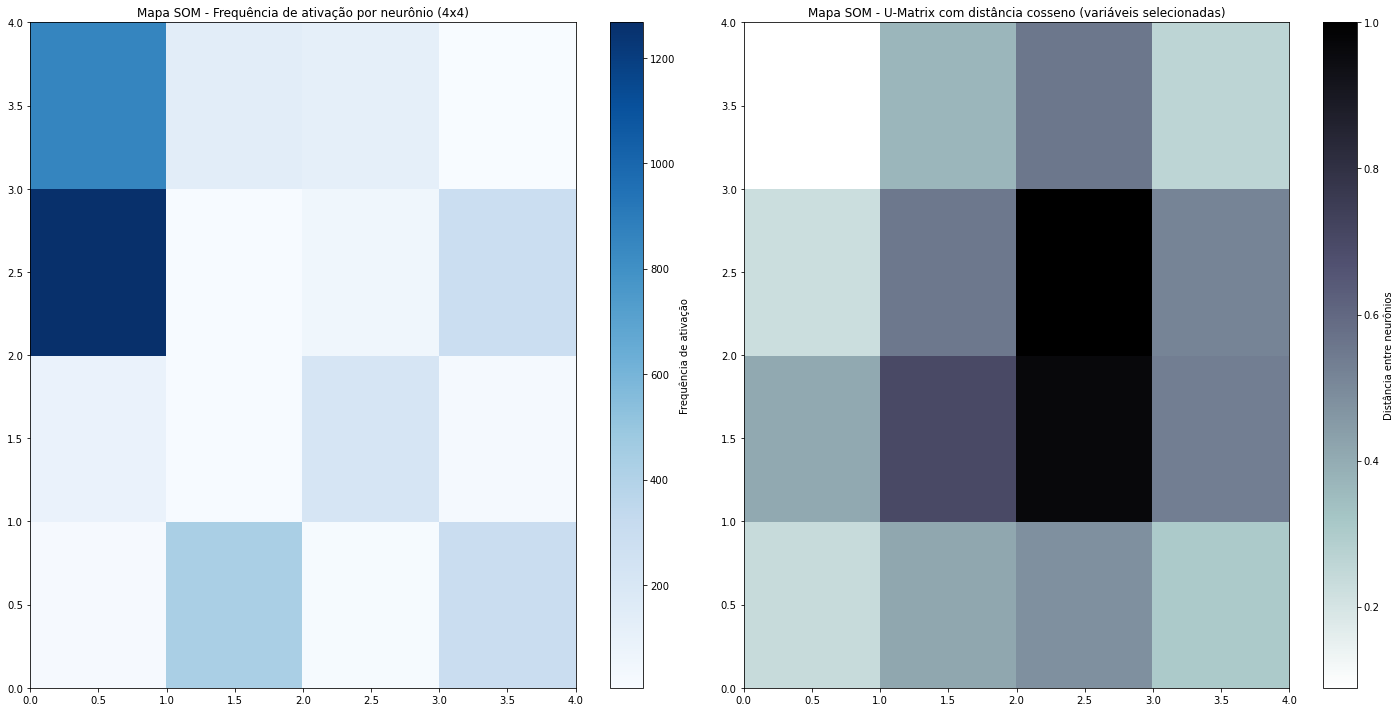

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis específicas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionando e normalizando os dados
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Parâmetros fixos para garantir a reprodutibilidade
sigma = 1.0  # Valor fixo de sigma
learning_rate = 0.2  # Valor fixo de learning_rate
num_iteration = 50000  # Número fixo de iterações
random_seed = 42  # Valor fixo para garantir a reprodutibilidade

# Inicializar o SOM com distância cosseno (primeiro gráfico)
som1 = MiniSom(x=4, y=4, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som1.random_weights_init(dados_normalizados)
som1.train_random(dados_normalizados, num_iteration=num_iteration)

# Inicializar o SOM com distância cosseno (segundo gráfico - U-Matrix)
som2 = MiniSom(x=4, y=4, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som2.random_weights_init(dados_normalizados)
som2.train_random(dados_normalizados, num_iteration=num_iteration)  # Número de iterações igual

# Visualizando os gráficos lado a lado
plt.figure(figsize=(20, 10))

# Primeiro gráfico - Frequência de ativação dos neurônios
plt.subplot(1, 2, 1)
frequencia = som1.activation_response(dados_normalizados)
plt.pcolor(frequencia.T, cmap='Blues')
plt.colorbar(label='Frequência de ativação')
plt.title('Mapa SOM - Frequência de ativação por neurônio')

# Segundo gráfico - U-Matrix
plt.subplot(1, 2, 2)
plt.pcolor(som2.distance_map().T, cmap='bone_r')  # Transposto para alinhar os eixos visualmente
plt.colorbar(label='Distância entre neurônios')
plt.title('Mapa SOM - U-Matrix com distância cosseno (variáveis selecionadas)')

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


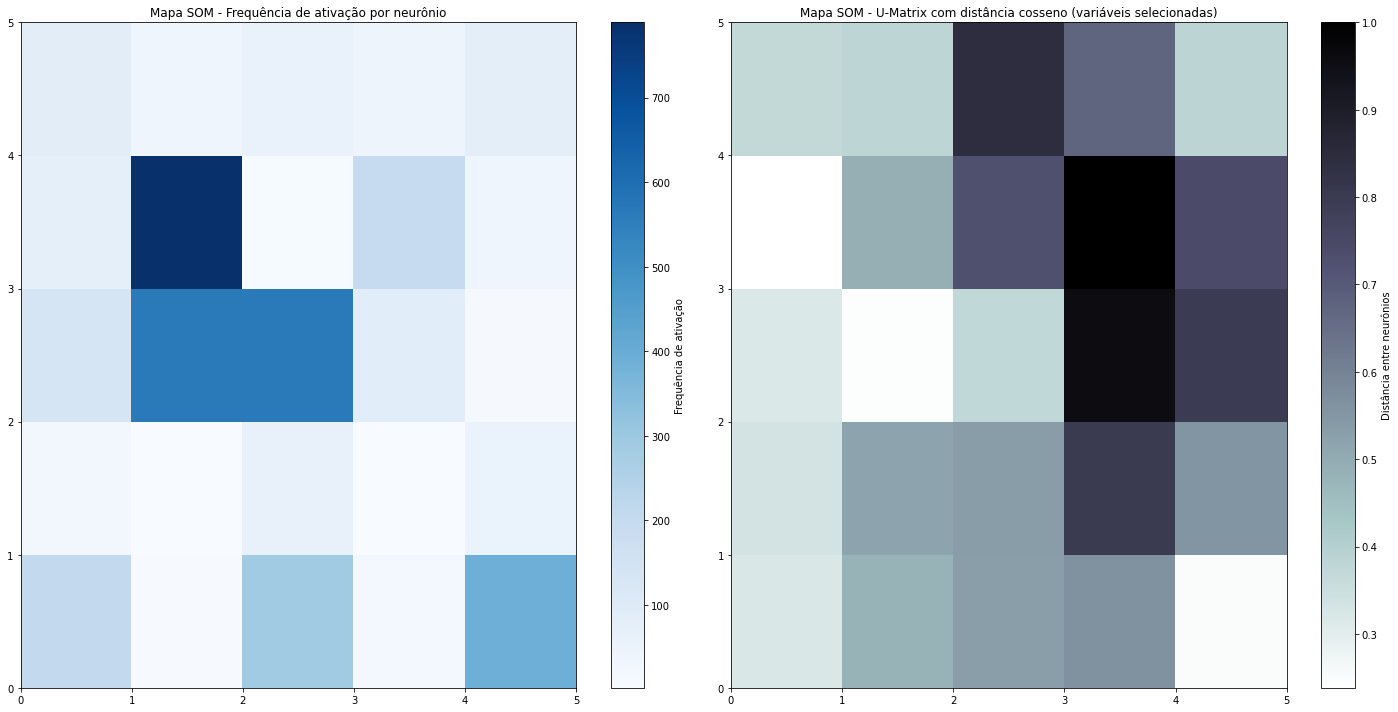

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis específicas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionando e normalizando os dados
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Parâmetros fixos para garantir a reprodutibilidade
sigma = 1.0  # Valor fixo de sigma
learning_rate = 0.2  # Valor fixo de learning_rate
num_iteration = 50000  # Número fixo de iterações
random_seed = 42  # Valor fixo para garantir a reprodutibilidade

# Inicializar o SOM com distância cosseno (primeiro gráfico)
som1 = MiniSom(x=5, y=5, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som1.random_weights_init(dados_normalizados)
som1.train_random(dados_normalizados, num_iteration=num_iteration)

# Inicializar o SOM com distância cosseno (segundo gráfico - U-Matrix)
som2 = MiniSom(x=5, y=5, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som2.random_weights_init(dados_normalizados)
som2.train_random(dados_normalizados, num_iteration=num_iteration)  # Número de iterações igual

# Visualizando os gráficos lado a lado
plt.figure(figsize=(20, 10))

# Primeiro gráfico - Frequência de ativação dos neurônios
plt.subplot(1, 2, 1)
frequencia = som1.activation_response(dados_normalizados)
plt.pcolor(frequencia.T, cmap='Blues')
plt.colorbar(label='Frequência de ativação')
plt.title('Mapa SOM - Frequência de ativação por neurônio')

# Segundo gráfico - U-Matrix
plt.subplot(1, 2, 2)
plt.pcolor(som2.distance_map().T, cmap='bone_r')  # Transposto para alinhar os eixos visualmente
plt.colorbar(label='Distância entre neurônios')
plt.title('Mapa SOM - U-Matrix com distância cosseno (variáveis selecionadas)')

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


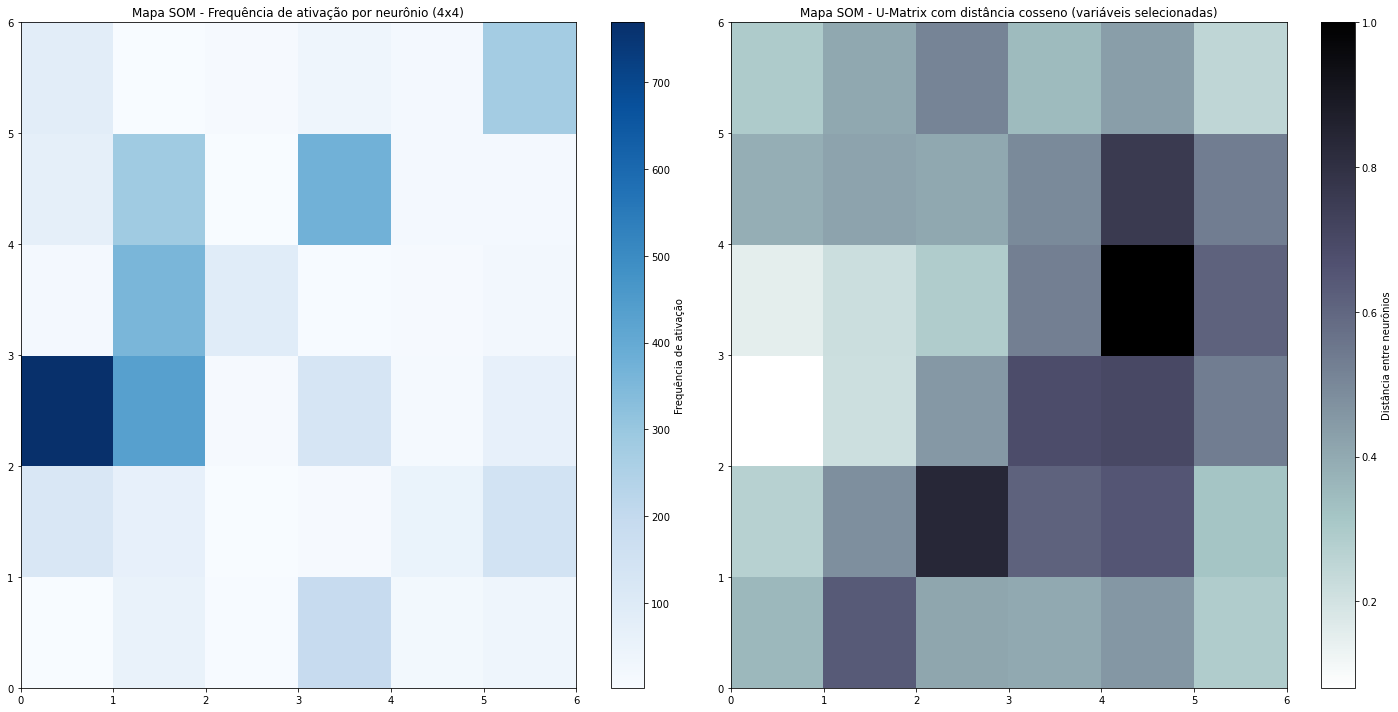

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis específicas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionando e normalizando os dados
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Parâmetros fixos para garantir a reprodutibilidade
sigma = 1.0  # Valor fixo de sigma
learning_rate = 0.2  # Valor fixo de learning_rate
num_iteration = 50000  # Número fixo de iterações
random_seed = 42  # Valor fixo para garantir a reprodutibilidade

# Inicializar o SOM com distância cosseno (primeiro gráfico)
som1 = MiniSom(x=6, y=6, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som1.random_weights_init(dados_normalizados)
som1.train_random(dados_normalizados, num_iteration=num_iteration)

# Inicializar o SOM com distância cosseno (segundo gráfico - U-Matrix)
som2 = MiniSom(x=6, y=6, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som2.random_weights_init(dados_normalizados)
som2.train_random(dados_normalizados, num_iteration=num_iteration)  # Número de iterações igual

# Visualizando os gráficos lado a lado
plt.figure(figsize=(20, 10))

# Primeiro gráfico - Frequência de ativação dos neurônios
plt.subplot(1, 2, 1)
frequencia = som1.activation_response(dados_normalizados)
plt.pcolor(frequencia.T, cmap='Blues')
plt.colorbar(label='Frequência de ativação')
plt.title('Mapa SOM - Frequência de ativação por neurônio')

# Segundo gráfico - U-Matrix
plt.subplot(1, 2, 2)
plt.pcolor(som2.distance_map().T, cmap='bone_r')  # Transposto para alinhar os eixos visualmente
plt.colorbar(label='Distância entre neurônios')
plt.title('Mapa SOM - U-Matrix com distância cosseno (variáveis selecionadas)')

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis específicas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionando e normalizando os dados
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Parâmetros fixos para garantir a reprodutibilidade
sigma = 1.0  # Valor fixo de sigma
learning_rate = 0.2  # Valor fixo de learning_rate
num_iteration = 50000  # Número fixo de iterações
random_seed = 42  # Valor fixo para garantir a reprodutibilidade

# Inicializar o SOM com distância cosseno (primeiro gráfico)
som1 = MiniSom(x=7, y=7, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som1.random_weights_init(dados_normalizados)
som1.train_random(dados_normalizados, num_iteration=num_iteration)

# Inicializar o SOM com distância cosseno (segundo gráfico - U-Matrix)
som2 = MiniSom(x=7, y=7, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som2.random_weights_init(dados_normalizados)
som2.train_random(dados_normalizados, num_iteration=num_iteration)  # Número de iterações igual

# Visualizando os gráficos lado a lado
plt.figure(figsize=(20, 10))

# Primeiro gráfico - Frequência de ativação dos neurônios
plt.subplot(1, 2, 1)
frequencia = som1.activation_response(dados_normalizados)
plt.pcolor(frequencia.T, cmap='Blues')
plt.colorbar(label='Frequência de ativação')
plt.title('Mapa SOM - Frequência de ativação por neurônio')

# Segundo gráfico - U-Matrix
plt.subplot(1, 2, 2)
plt.pcolor(som2.distance_map().T, cmap='bone_r')  # Transposto para alinhar os eixos visualmente
plt.colorbar(label='Distância entre neurônios')
plt.title('Mapa SOM - U-Matrix com distância cosseno (variáveis selecionadas)')

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


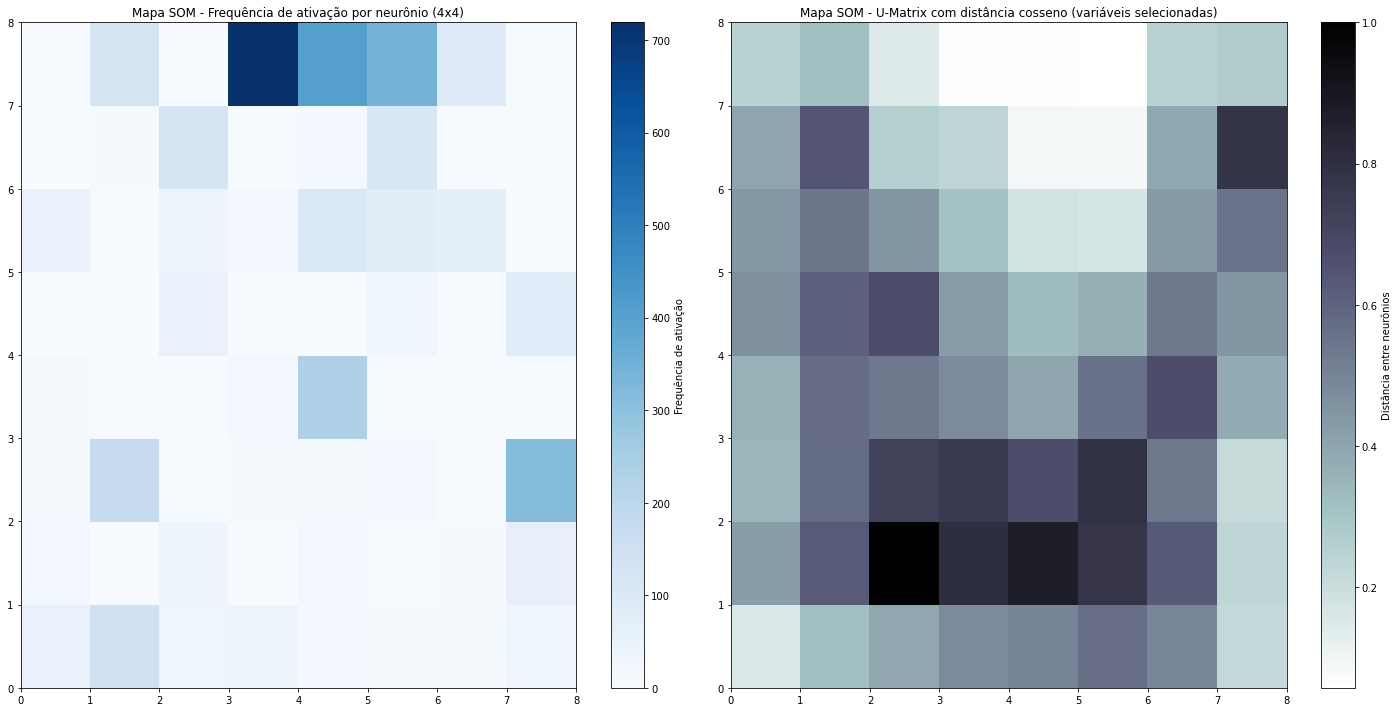

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis específicas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionando e normalizando os dados
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Parâmetros fixos para garantir a reprodutibilidade
sigma = 1.0  # Valor fixo de sigma
learning_rate = 0.2  # Valor fixo de learning_rate
num_iteration = 50000  # Número fixo de iterações
random_seed = 42  # Valor fixo para garantir a reprodutibilidade

# Inicializar o SOM com distância cosseno (primeiro gráfico)
som1 = MiniSom(x=8, y=8, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som1.random_weights_init(dados_normalizados)
som1.train_random(dados_normalizados, num_iteration=num_iteration)

# Inicializar o SOM com distância cosseno (segundo gráfico - U-Matrix)
som2 = MiniSom(x=8, y=8, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som2.random_weights_init(dados_normalizados)
som2.train_random(dados_normalizados, num_iteration=num_iteration)  # Número de iterações igual

# Visualizando os gráficos lado a lado
plt.figure(figsize=(20, 10))

# Primeiro gráfico - Frequência de ativação dos neurônios
plt.subplot(1, 2, 1)
frequencia = som1.activation_response(dados_normalizados)
plt.pcolor(frequencia.T, cmap='Blues')
plt.colorbar(label='Frequência de ativação')
plt.title('Mapa SOM - Frequência de ativação por neurônio')

# Segundo gráfico - U-Matrix
plt.subplot(1, 2, 2)
plt.pcolor(som2.distance_map().T, cmap='bone_r')  # Transposto para alinhar os eixos visualmente
plt.colorbar(label='Distância entre neurônios')
plt.title('Mapa SOM - U-Matrix com distância cosseno (variáveis selecionadas)')

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


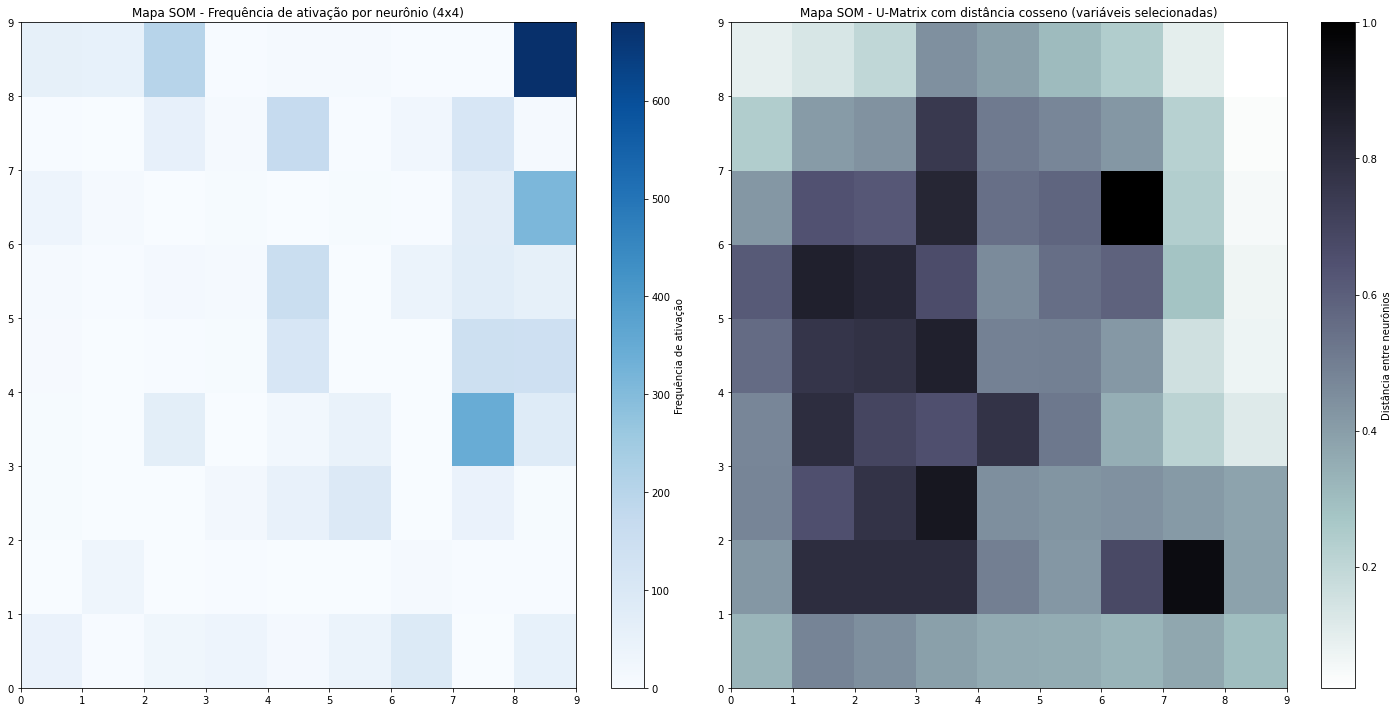

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis específicas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionando e normalizando os dados
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Parâmetros fixos para garantir a reprodutibilidade
sigma = 1.0  # Valor fixo de sigma
learning_rate = 0.2  # Valor fixo de learning_rate
num_iteration = 50000  # Número fixo de iterações
random_seed = 42  # Valor fixo para garantir a reprodutibilidade

# Inicializar o SOM com distância cosseno (primeiro gráfico)
som1 = MiniSom(x=9, y=9, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som1.random_weights_init(dados_normalizados)
som1.train_random(dados_normalizados, num_iteration=num_iteration)

# Inicializar o SOM com distância cosseno (segundo gráfico - U-Matrix)
som2 = MiniSom(x=9, y=9, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som2.random_weights_init(dados_normalizados)
som2.train_random(dados_normalizados, num_iteration=num_iteration)  # Número de iterações igual

# Visualizando os gráficos lado a lado
plt.figure(figsize=(20, 10))

# Primeiro gráfico - Frequência de ativação dos neurônios
plt.subplot(1, 2, 1)
frequencia = som1.activation_response(dados_normalizados)
plt.pcolor(frequencia.T, cmap='Blues')
plt.colorbar(label='Frequência de ativação')
plt.title('Mapa SOM - Frequência de ativação por neurônio')

# Segundo gráfico - U-Matrix
plt.subplot(1, 2, 2)
plt.pcolor(som2.distance_map().T, cmap='bone_r')  # Transposto para alinhar os eixos visualmente
plt.colorbar(label='Distância entre neurônios')
plt.title('Mapa SOM - U-Matrix com distância cosseno (variáveis selecionadas)')

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis específicas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionando e normalizando os dados
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Parâmetros fixos para garantir a reprodutibilidade
sigma = 1.0  # Valor fixo de sigma
learning_rate = 0.2  # Valor fixo de learning_rate
num_iteration = 50000  # Número fixo de iterações
random_seed = 42  # Valor fixo para garantir a reprodutibilidade

# Inicializar o SOM com distância cosseno (primeiro gráfico)
som1 = MiniSom(x=10, y=10, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som1.random_weights_init(dados_normalizados)
som1.train_random(dados_normalizados, num_iteration=num_iteration)

# Inicializar o SOM com distância cosseno (segundo gráfico - U-Matrix)
som2 = MiniSom(x=10, y=10, input_len=dados_normalizados.shape[1],
               sigma=sigma, learning_rate=learning_rate,
               random_seed=random_seed, activation_distance='cosine')
som2.random_weights_init(dados_normalizados)
som2.train_random(dados_normalizados, num_iteration=num_iteration)  # Número de iterações igual

# Visualizando os gráficos lado a lado
plt.figure(figsize=(20, 10))

# Primeiro gráfico - Frequência de ativação dos neurônios
plt.subplot(1, 2, 1)
frequencia = som1.activation_response(dados_normalizados)
plt.pcolor(frequencia.T, cmap='Blues')
plt.colorbar(label='Frequência de ativação')
plt.title('Mapa SOM - Frequência de ativação por neurônio')

# Segundo gráfico - U-Matrix
plt.subplot(1, 2, 2)
plt.pcolor(som2.distance_map().T, cmap='bone_r')  # Transposto para alinhar os eixos visualmente
plt.colorbar(label='Distância entre neurônios')
plt.title('Mapa SOM - U-Matrix com distância cosseno (variáveis selecionadas)')

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


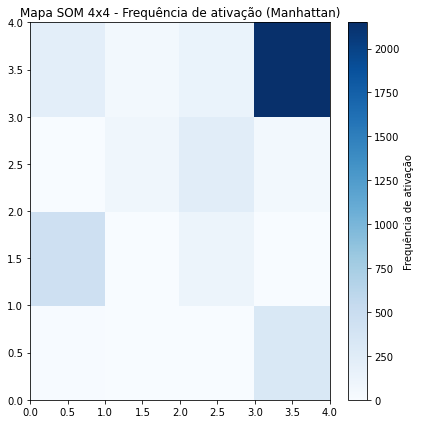

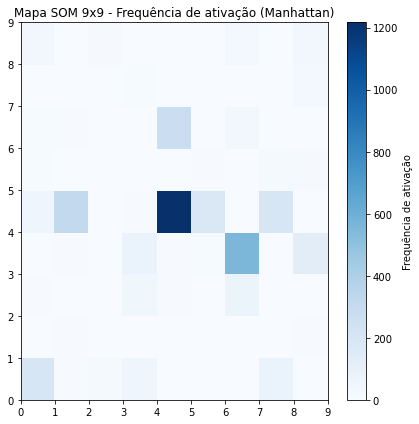

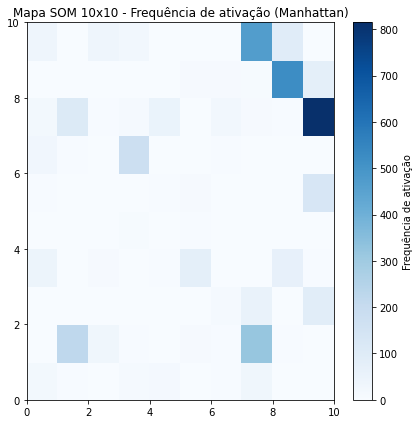

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Fixar a semente global para reprodutibilidade
np.random.seed(42)

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis desejadas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionar apenas colunas numéricas
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])

# Normalizar os dados
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Treinar e plotar SOMs de 4x4 a 10x10
for tamanho in range(4, 11):  # De 4x4 a 10x10
    som = MiniSom(
        x=tamanho,
        y=tamanho,
        input_len=dados_normalizados.shape[1],
        sigma=1.0,
        learning_rate=0.2,
        activation_distance='manhattan',
        random_seed=42  # Garante sempre o mesmo mapa
    )
    som.random_weights_init(dados_normalizados)
    som.train_random(dados_normalizados, num_iteration=50000)

    # Plotar a frequência de ativação
    plt.figure(figsize=(6, 6))
    frequencia = som.activation_response(dados_normalizados)
    plt.pcolor(frequencia.T, cmap='Blues')
    plt.colorbar(label='Frequência de ativação')
    plt.title(f'Mapa SOM {tamanho}x{tamanho} - Frequência de ativação (Manhattan)')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np
from numpy.linalg import norm

# Carregar os dados
dados = pd.read_csv('/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv')

# Lista das variáveis que você deseja usar
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Selecionar apenas as variáveis desejadas com tipos numéricos
df_filtrado = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])

# Normalizar os dados
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_filtrado)

# Função para calcular o erro de quantização com distância Cosseno
def erro_quantizacao_cosseno(som, dados):
    erro = 0
    pesos = som.get_weights()
    for u in dados:
        bmu = som.winner(u)
        peso_bmu = pesos[bmu[0], bmu[1]]
        similaridade = np.dot(u, peso_bmu) / (norm(u) * norm(peso_bmu) + 1e-8)
        erro += 1 - similaridade
    return erro / len(dados)

# Função para calcular o erro de quantização com distância Manhattan
def erro_quantizacao_manhattan(som, dados):
    erro = 0
    pesos = som.get_weights()
    for u in dados:
        bmu = som.winner(u)
        peso_bmu = pesos[bmu[0], bmu[1]]
        erro += np.sum(np.abs(u - peso_bmu))
    return erro / len(dados)

# Dimensões do SOM para teste
dimensoes = [(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]

# Listas para armazenar os erros
erros_cosine = []
erros_manhattan = []

# Avaliação com distância Cosseno
for dim in dimensoes:
    som_cos = MiniSom(x=dim[0], y=dim[1], input_len=dados_normalizados.shape[1],
                      sigma=1.0, learning_rate=0.2, activation_distance='cosine')
    som_cos.random_weights_init(dados_normalizados)
    som_cos.train_random(dados_normalizados, num_iteration=50000)
    erro_cos = erro_quantizacao_cosseno(som_cos, dados_normalizados)
    erros_cosine.append(erro_cos)

# Avaliação com distância Manhattan
for dim in dimensoes:
    som_man = MiniSom(x=dim[0], y=dim[1], input_len=dados_normalizados.shape[1],
                      sigma=1.0, learning_rate=0.2, activation_distance='manhattan')
    som_man.random_weights_init(dados_normalizados)
    som_man.train_random(dados_normalizados, num_iteration=50000)
    erro_man = erro_quantizacao_manhattan(som_man, dados_normalizados)
    erros_manhattan.append(erro_man)

# Plotando gráfico do erro de quantização
plt.figure(figsize=(10, 6))
plt.plot([str(dim) for dim in dimensoes], erros_cosine, label='Distância Cosseno', marker='o')
plt.plot([str(dim) for dim in dimensoes], erros_manhattan, label='Distância Manhattan', marker='o')
plt.xlabel('Dimensão do SOM')
plt.ylabel('Erro de Quantização (QE)')
plt.title('Erro de Quantização para diferentes dimensões do SOM')
plt.legend()
plt.grid(True)
plt.show()


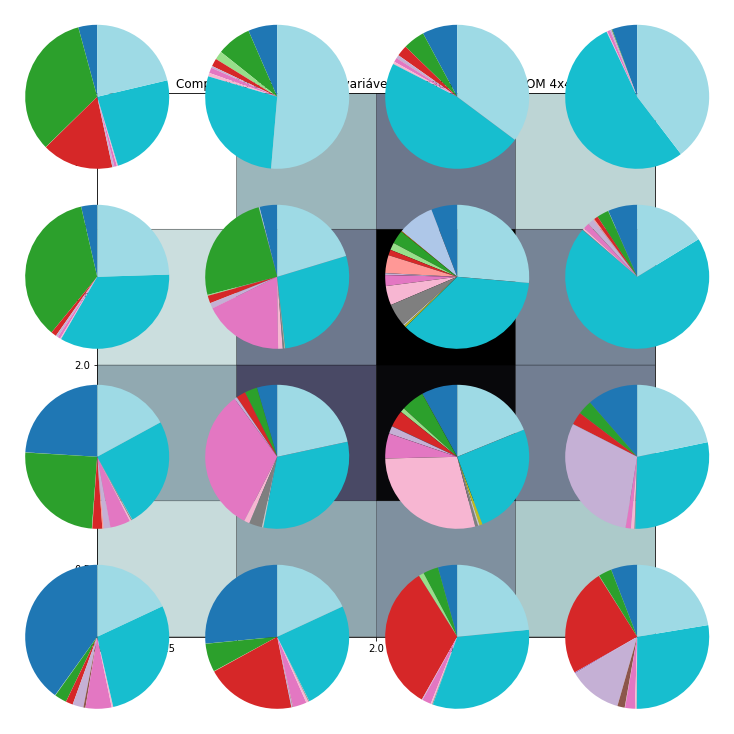

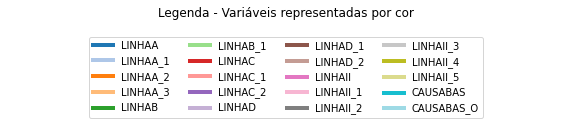

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Garantir reprodutibilidade
np.random.seed(42)

# Caminho único para os dados
caminho_dataset = '/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv'

# Carregar os dados
dados = pd.read_csv(caminho_dataset)

# Lista das variáveis desejadas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Dados filtrados (não normalizados)
df_original = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])

# Normalização
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_original)

# Treinar SOM com parâmetros fixos
x, y = 4, 4
som = MiniSom(x=x, y=y,
              input_len=dados_normalizados.shape[1],
              sigma=1.0,
              learning_rate=0.2,
              activation_distance='cosine',
              random_seed=42)
som.random_weights_init(dados_normalizados)
som.train_random(dados_normalizados, num_iteration=50000)

# Plot do SOM com gráficos de pizza
pesos = som.get_weights()
cores = plt.cm.tab20(np.linspace(0, 1, dados_normalizados.shape[1]))
labels = df_original.columns.tolist()

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r', edgecolors='k')
plt.title('Composição dos pesos das variáveis em cada neurônio (SOM 4x4)')

for i in range(x):
    for j in range(y):
        neuron_weights = pesos[i, j]
        neuron_weights = neuron_weights / np.sum(neuron_weights)
        cx, cy = j, i
        pie_ax = plt.axes([cx/y, 1 - (cy+1)/x, 1/y, 1/x])
        pie_ax.pie(neuron_weights, colors=cores, startangle=90)
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])

fig_legenda = plt.figure(figsize=(10, 2))
plt.legend(handles=[plt.Line2D([0], [0], color=c, lw=4) for c in cores],
           labels=labels, loc='center', ncol=4)
plt.axis('off')
plt.title("Legenda - Variáveis representadas por cor")
plt.show()



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

np.random.seed(42)

# Caminho do dataset
caminho_dataset = '/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv'

# Carregar dados
dados = pd.read_csv(caminho_dataset)

# Variáveis usadas no treino do SOM
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Dados filtrados
df_original = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])

# Normalização
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_original)

# Criar e treinar SOM com random_seed fixo
x, y = 4, 4
som = MiniSom(x=x, y=y, input_len=dados_normalizados.shape[1],
              sigma=1.0, learning_rate=0.2, activation_distance='cosine',
              random_seed=42)
som.random_weights_init(dados_normalizados)
som.train_random(dados_normalizados, num_iteration=50000)

# Neurônios de interesse
neurônios_interesse = [(0, 0), (2, 3), (3, 3), (3, 2)]
instancias_por_neuronio = {n: [] for n in neurônios_interesse}

# Mapear instâncias
for idx, x_norm in enumerate(dados_normalizados):
    neuronio = som.winner(x_norm)
    if neuronio in instancias_por_neuronio:
        linha_original = df_original.iloc[idx]
        instancias_por_neuronio[neuronio].append((idx, linha_original))

# Criar planilha
with pd.ExcelWriter('instancias_por_neuronio.xlsx') as writer:
    for neuronio, instancias in instancias_por_neuronio.items():
        if instancias:
            df_neuronio = pd.DataFrame([linha for idx, linha in instancias])
            df_neuronio.insert(0, 'Índice', [idx for idx, linha in instancias])
            aba = f'Neuronio_{neuronio[0]}_{neuronio[1]}'[:31]
            df_neuronio.to_excel(writer, sheet_name=aba, index=False)

print("Planilha 'instancias_por_neuronio.xlsx' criada com sucesso.")


Planilha 'instancias_por_neuronio.xlsx' criada com sucesso.


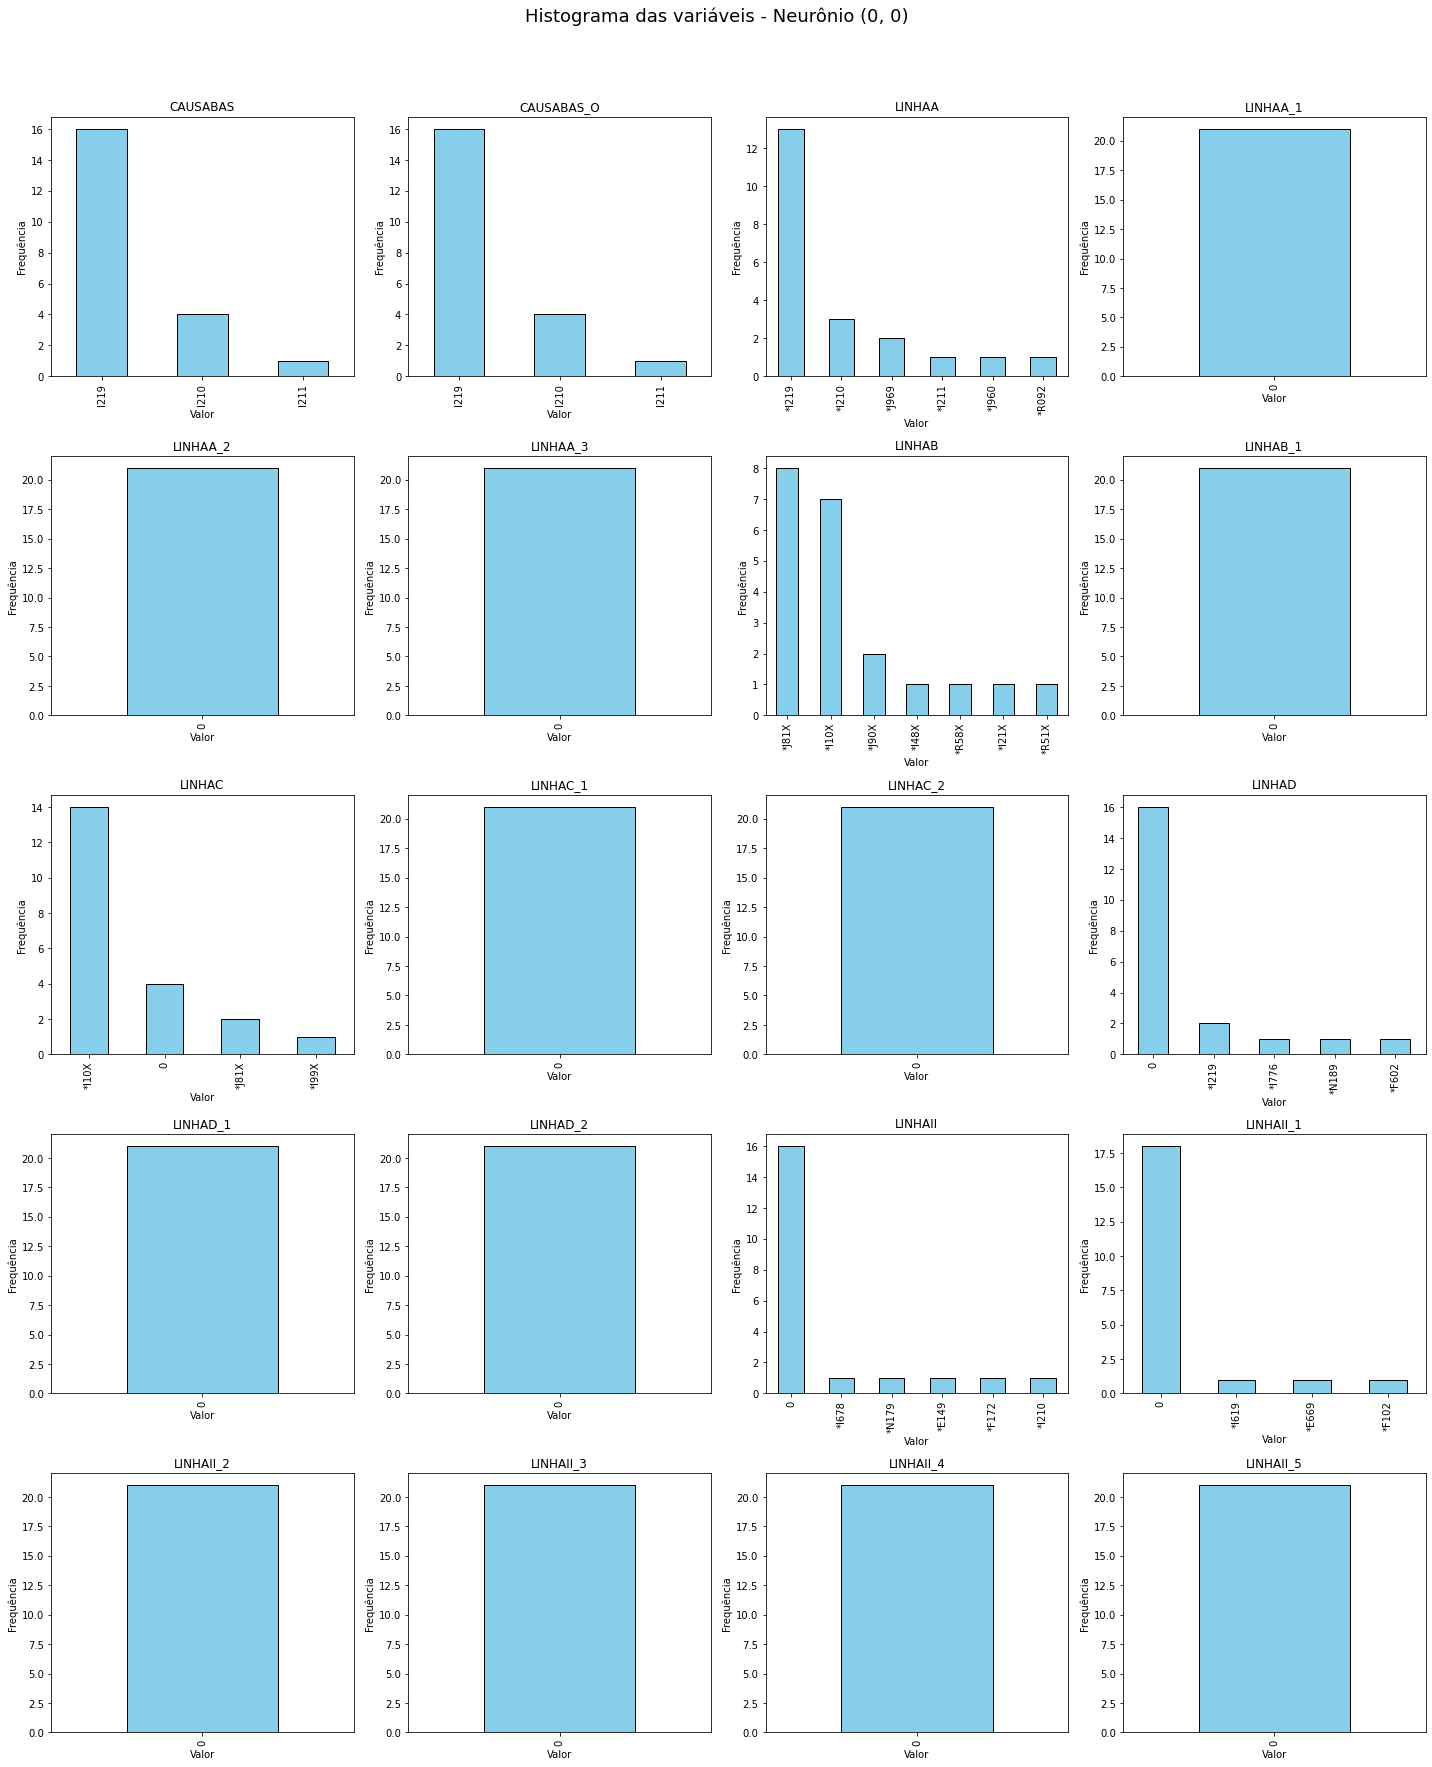

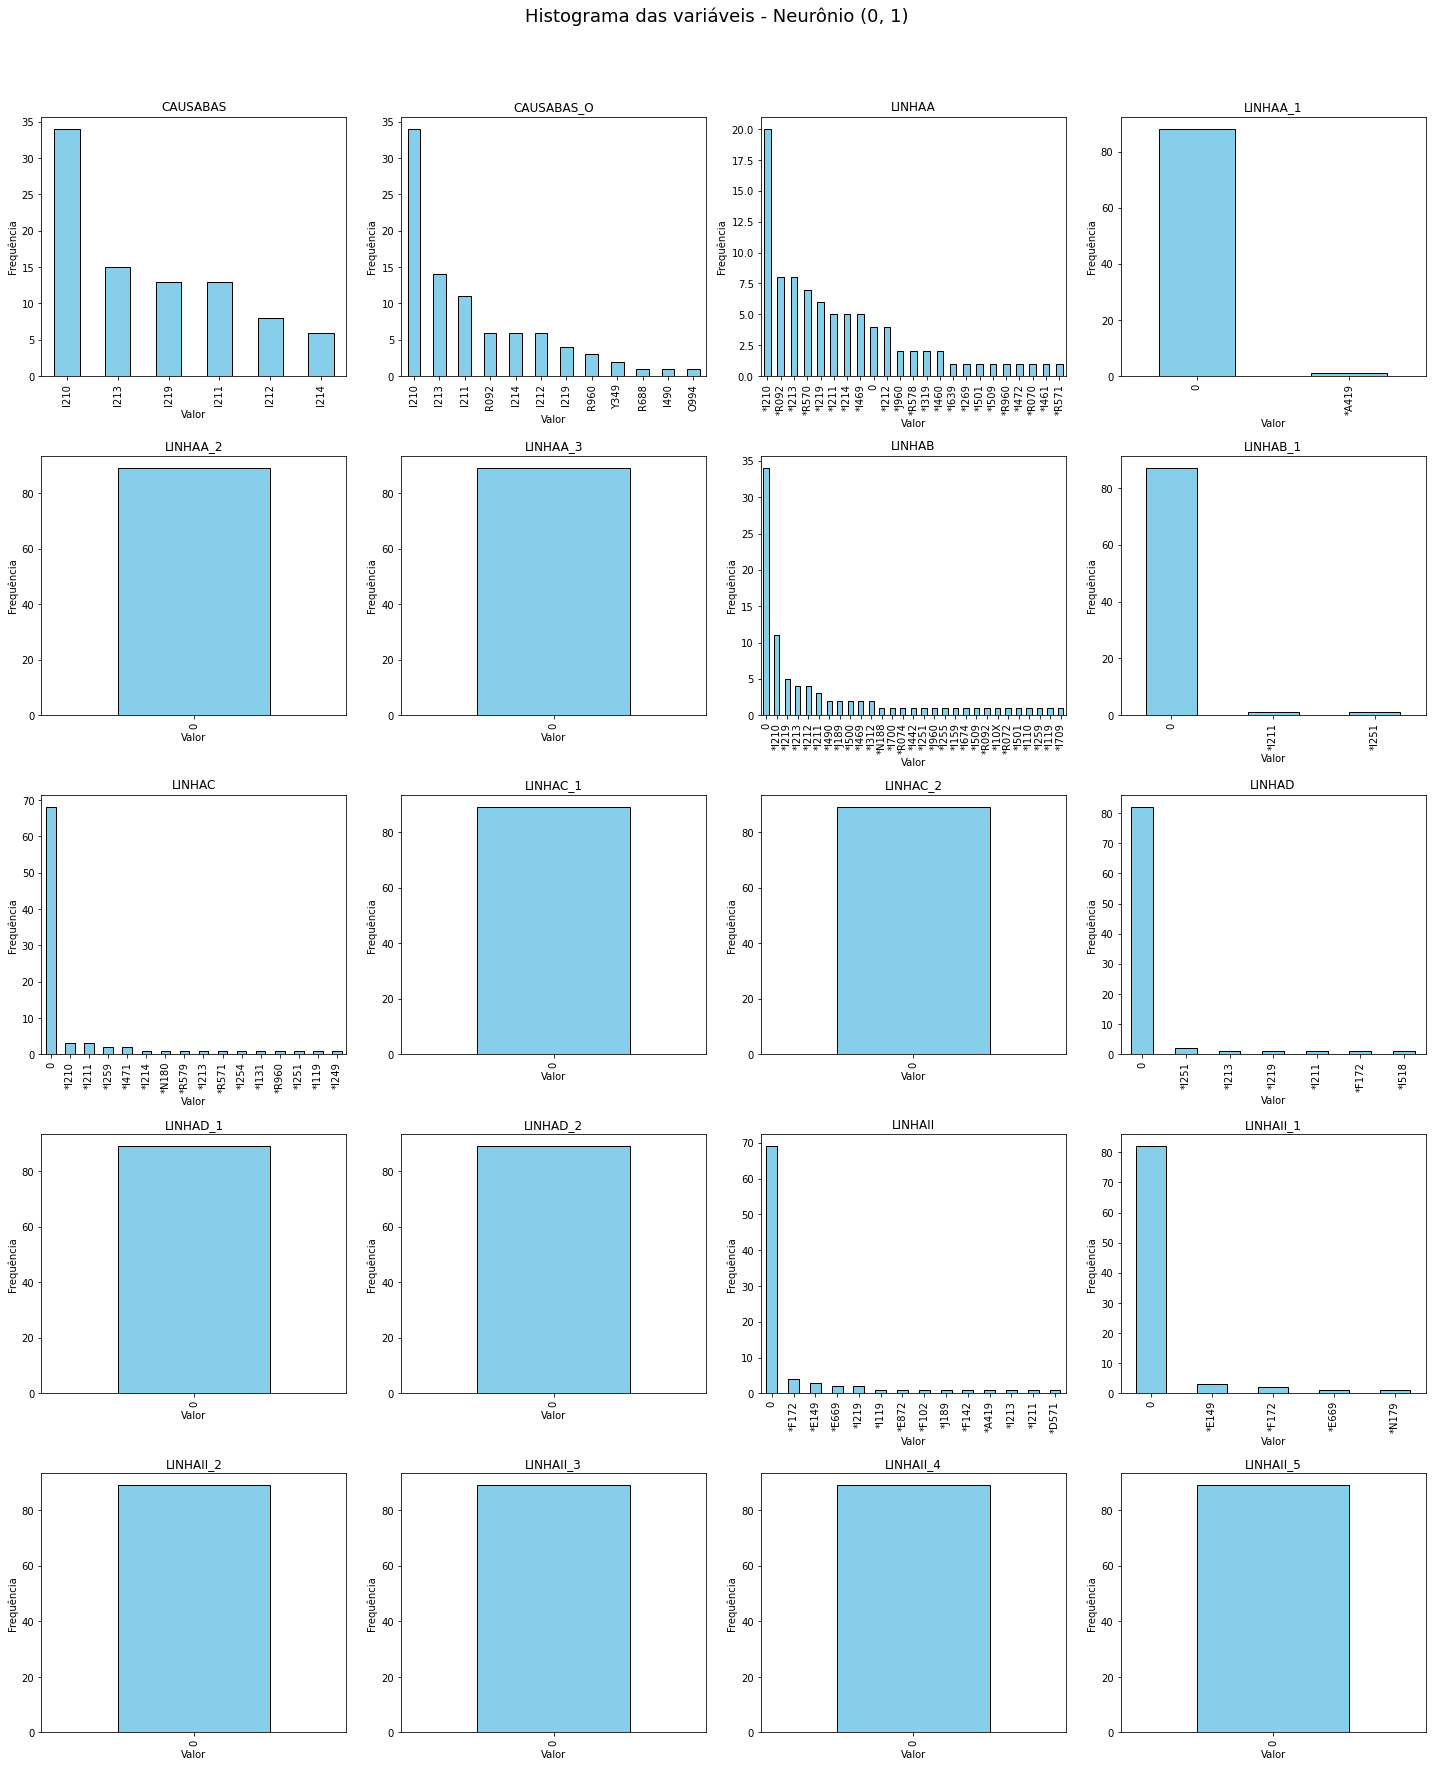

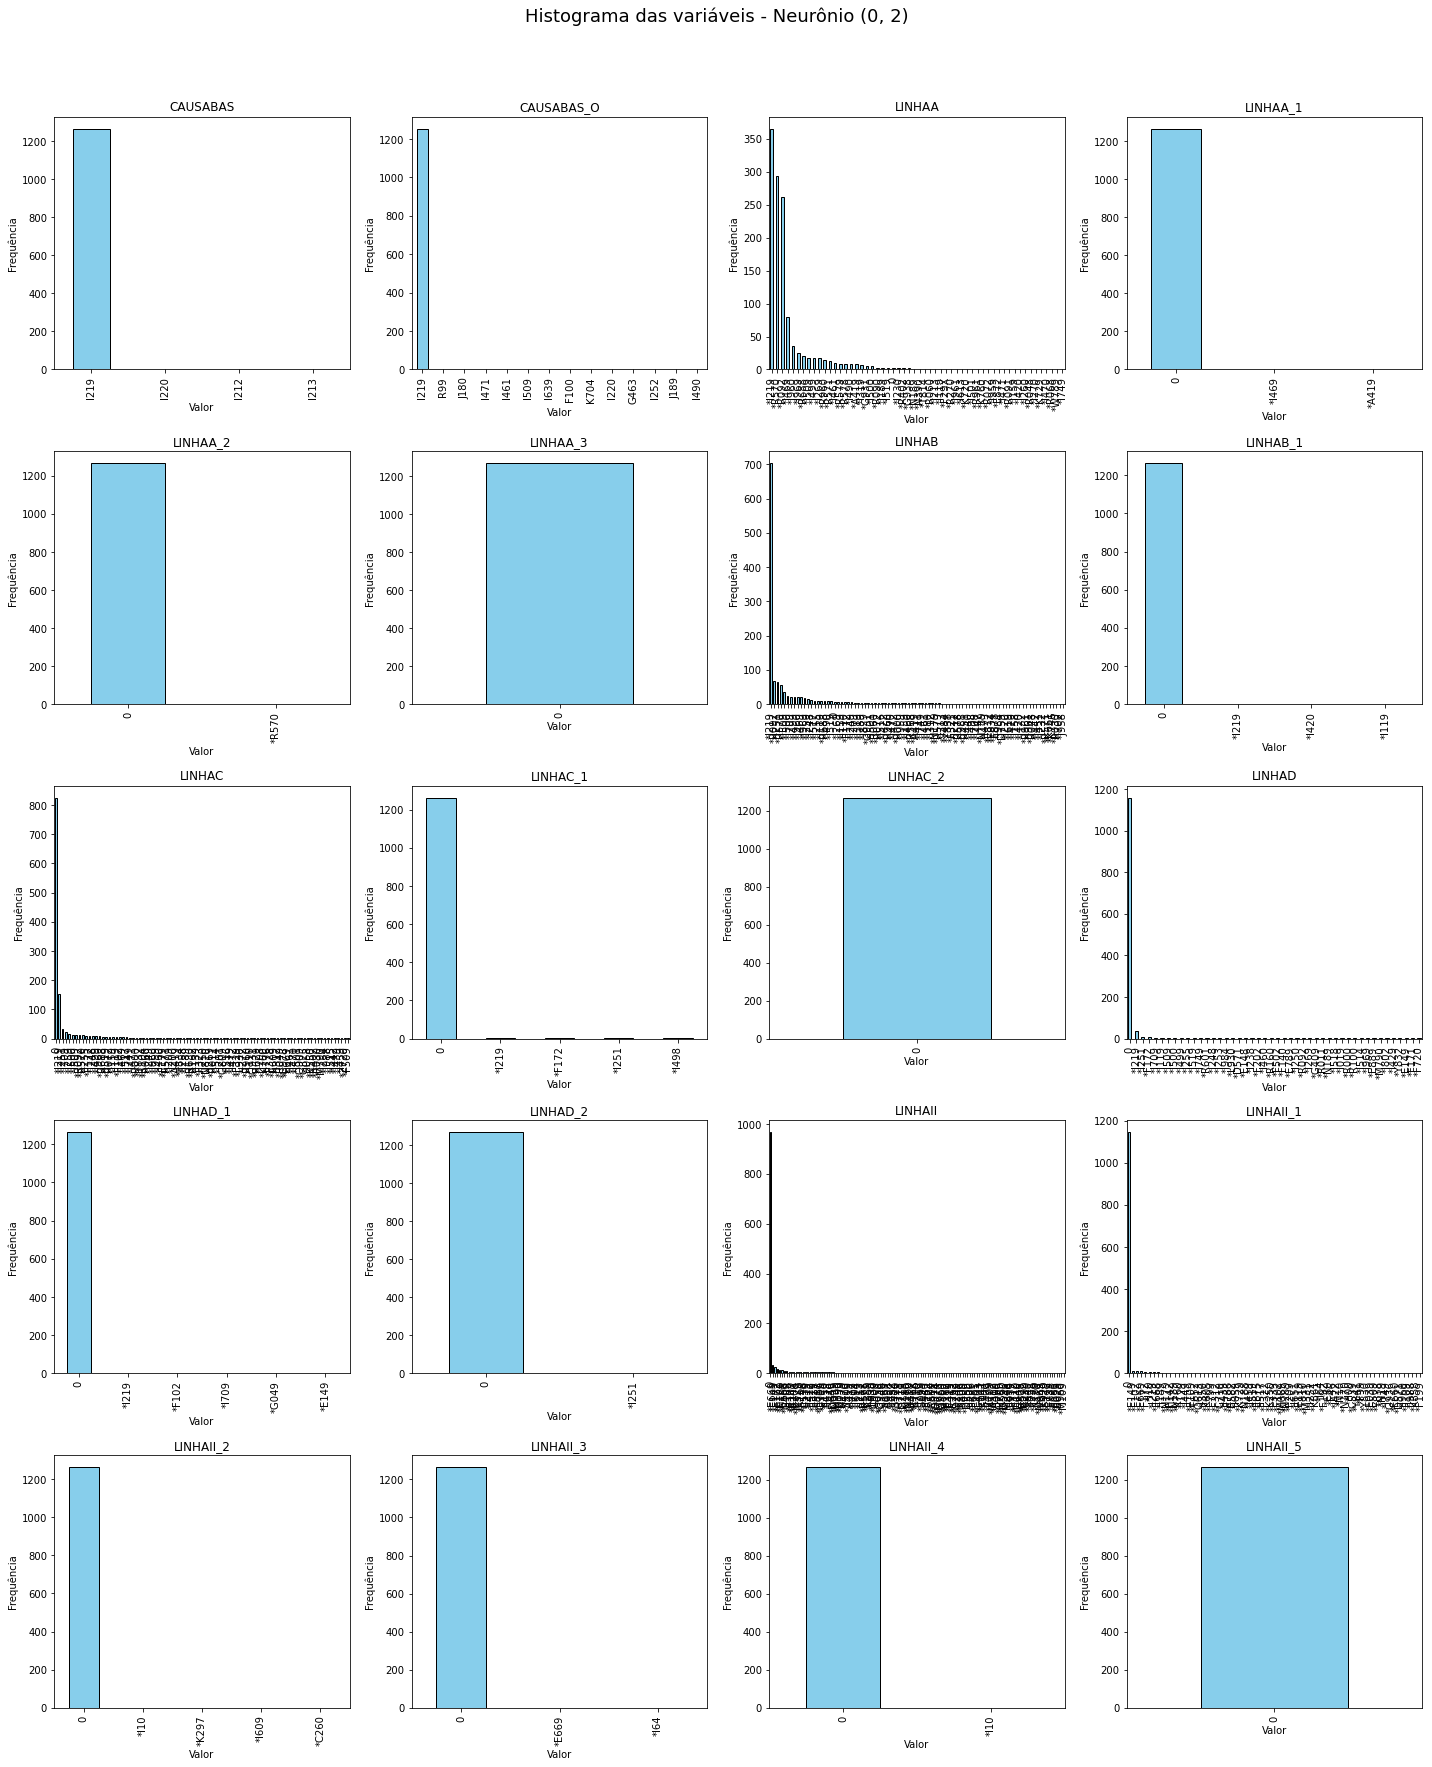

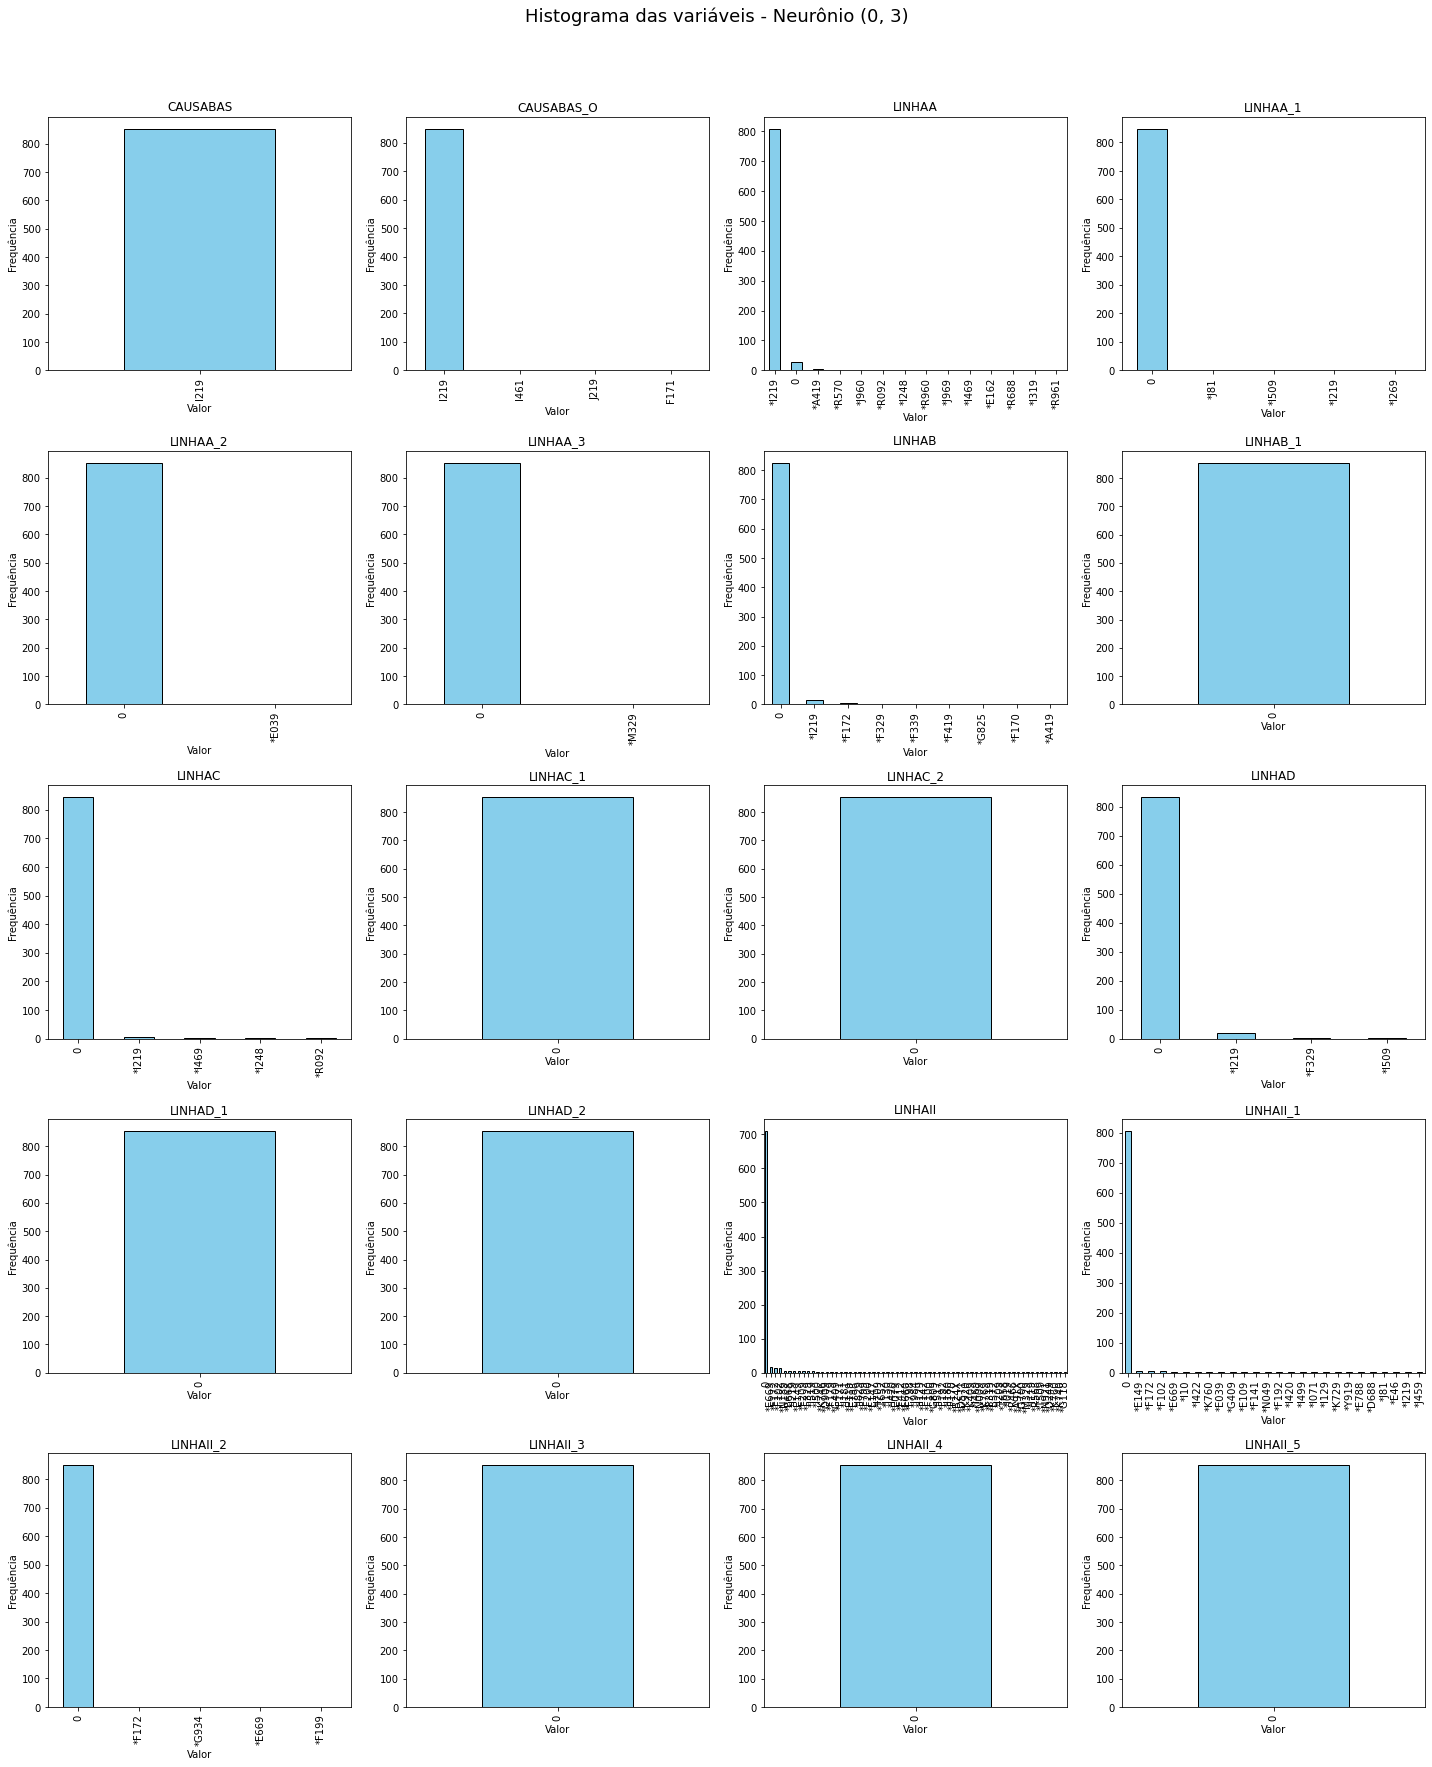

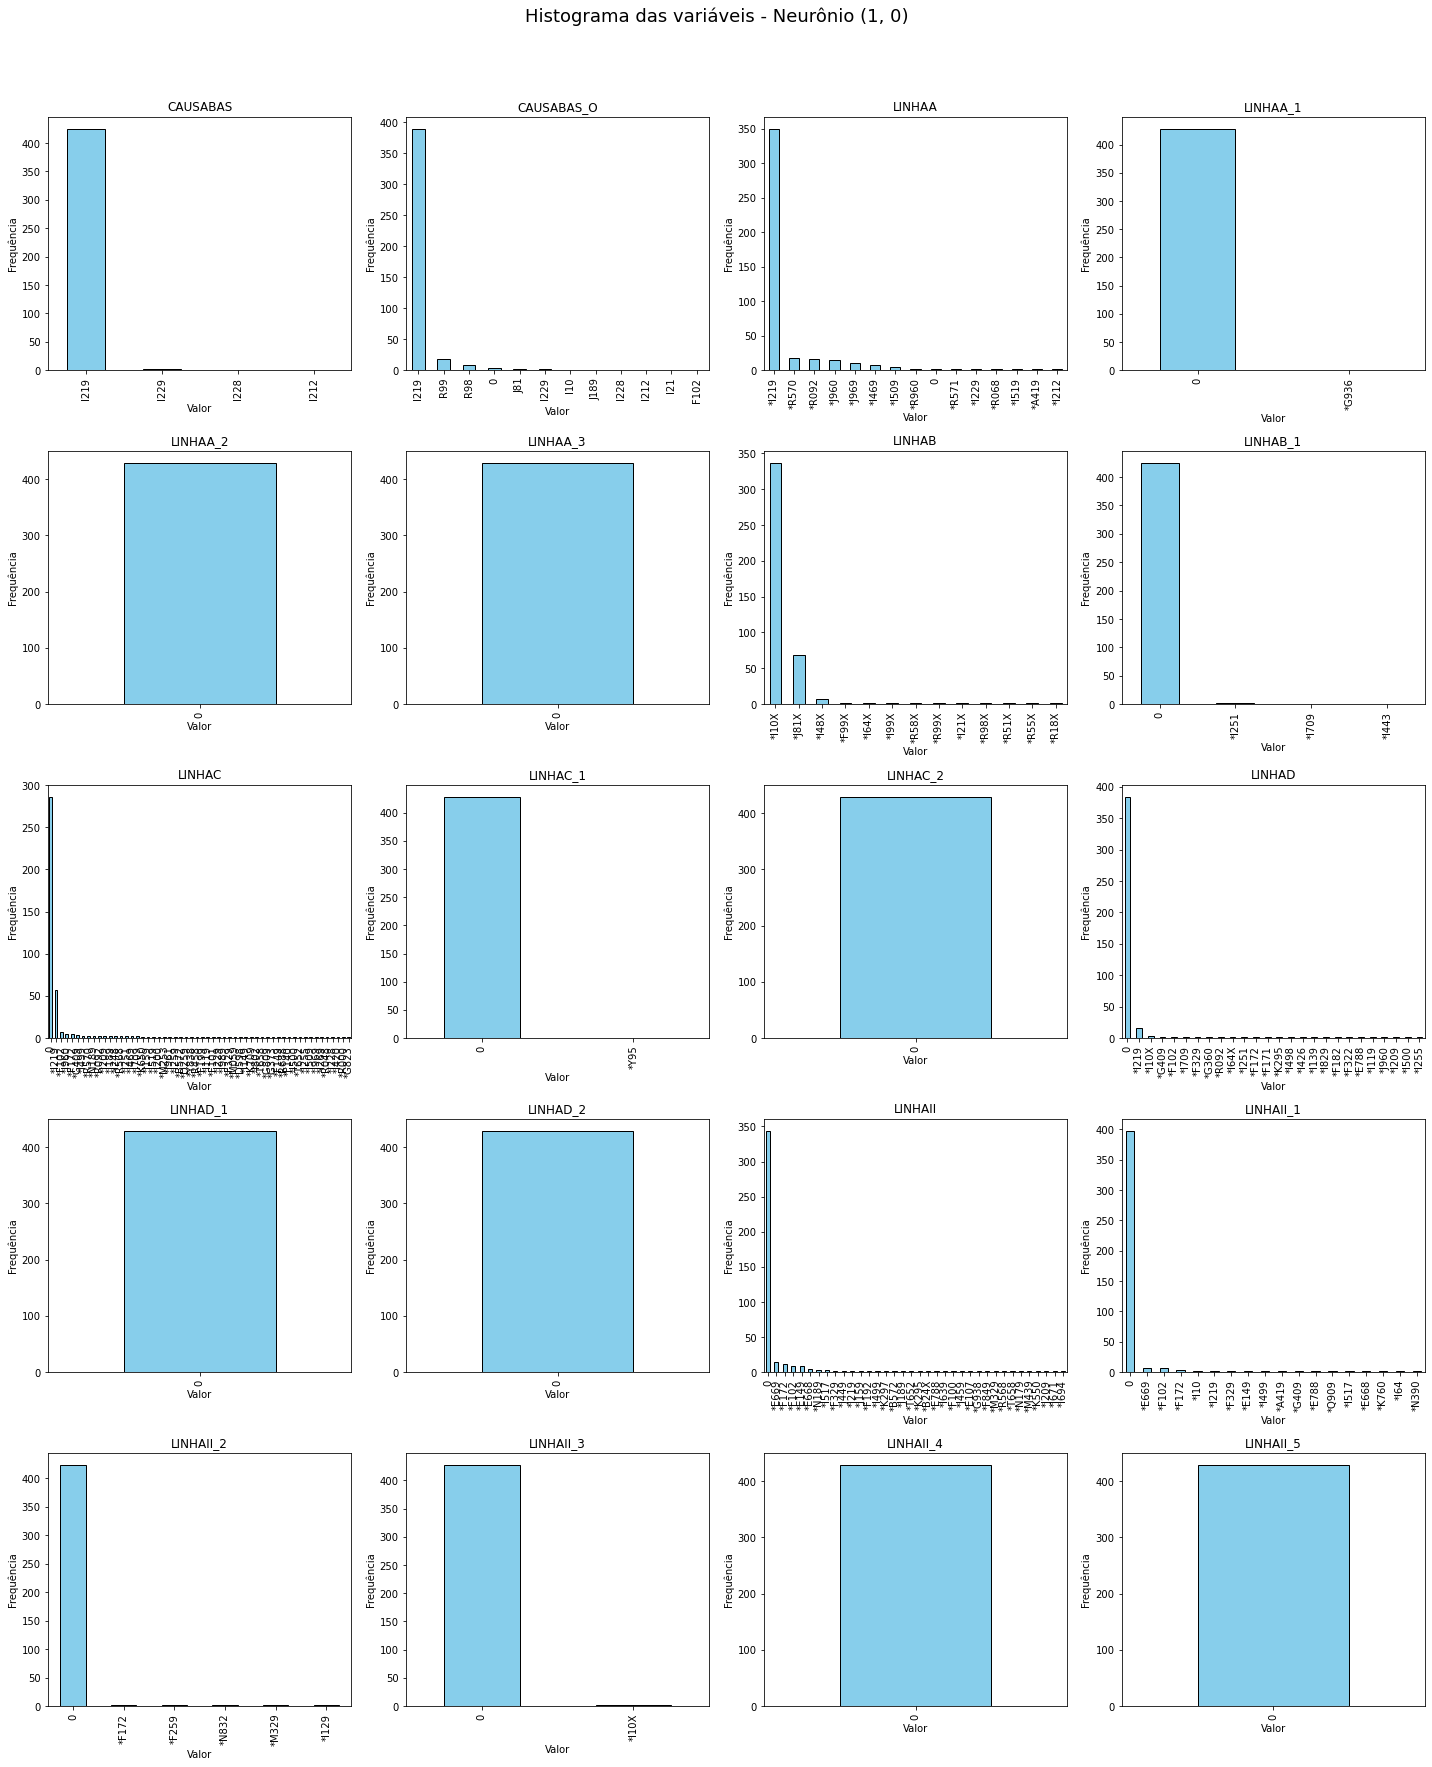

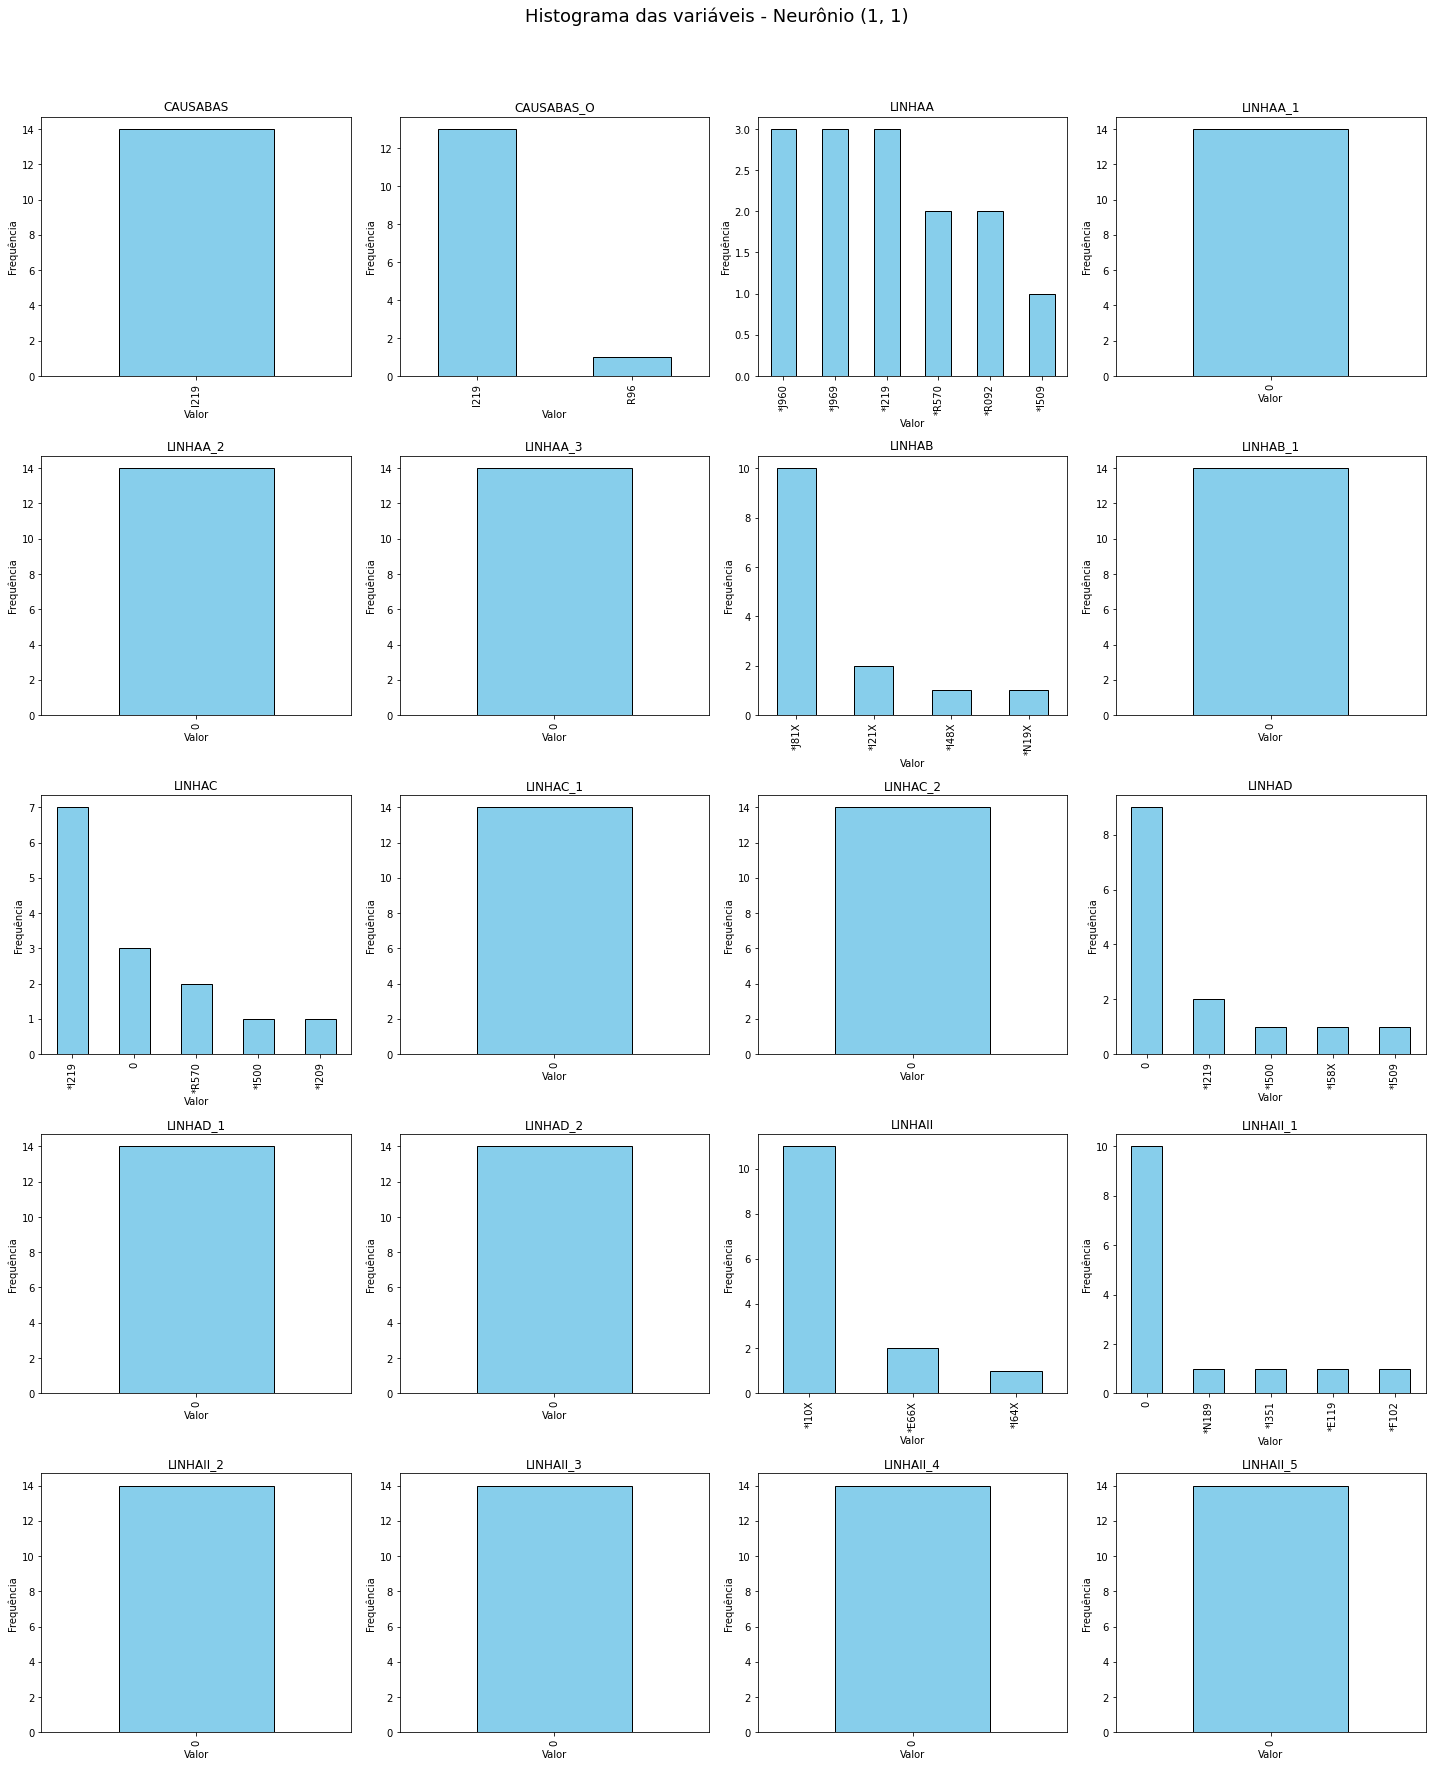

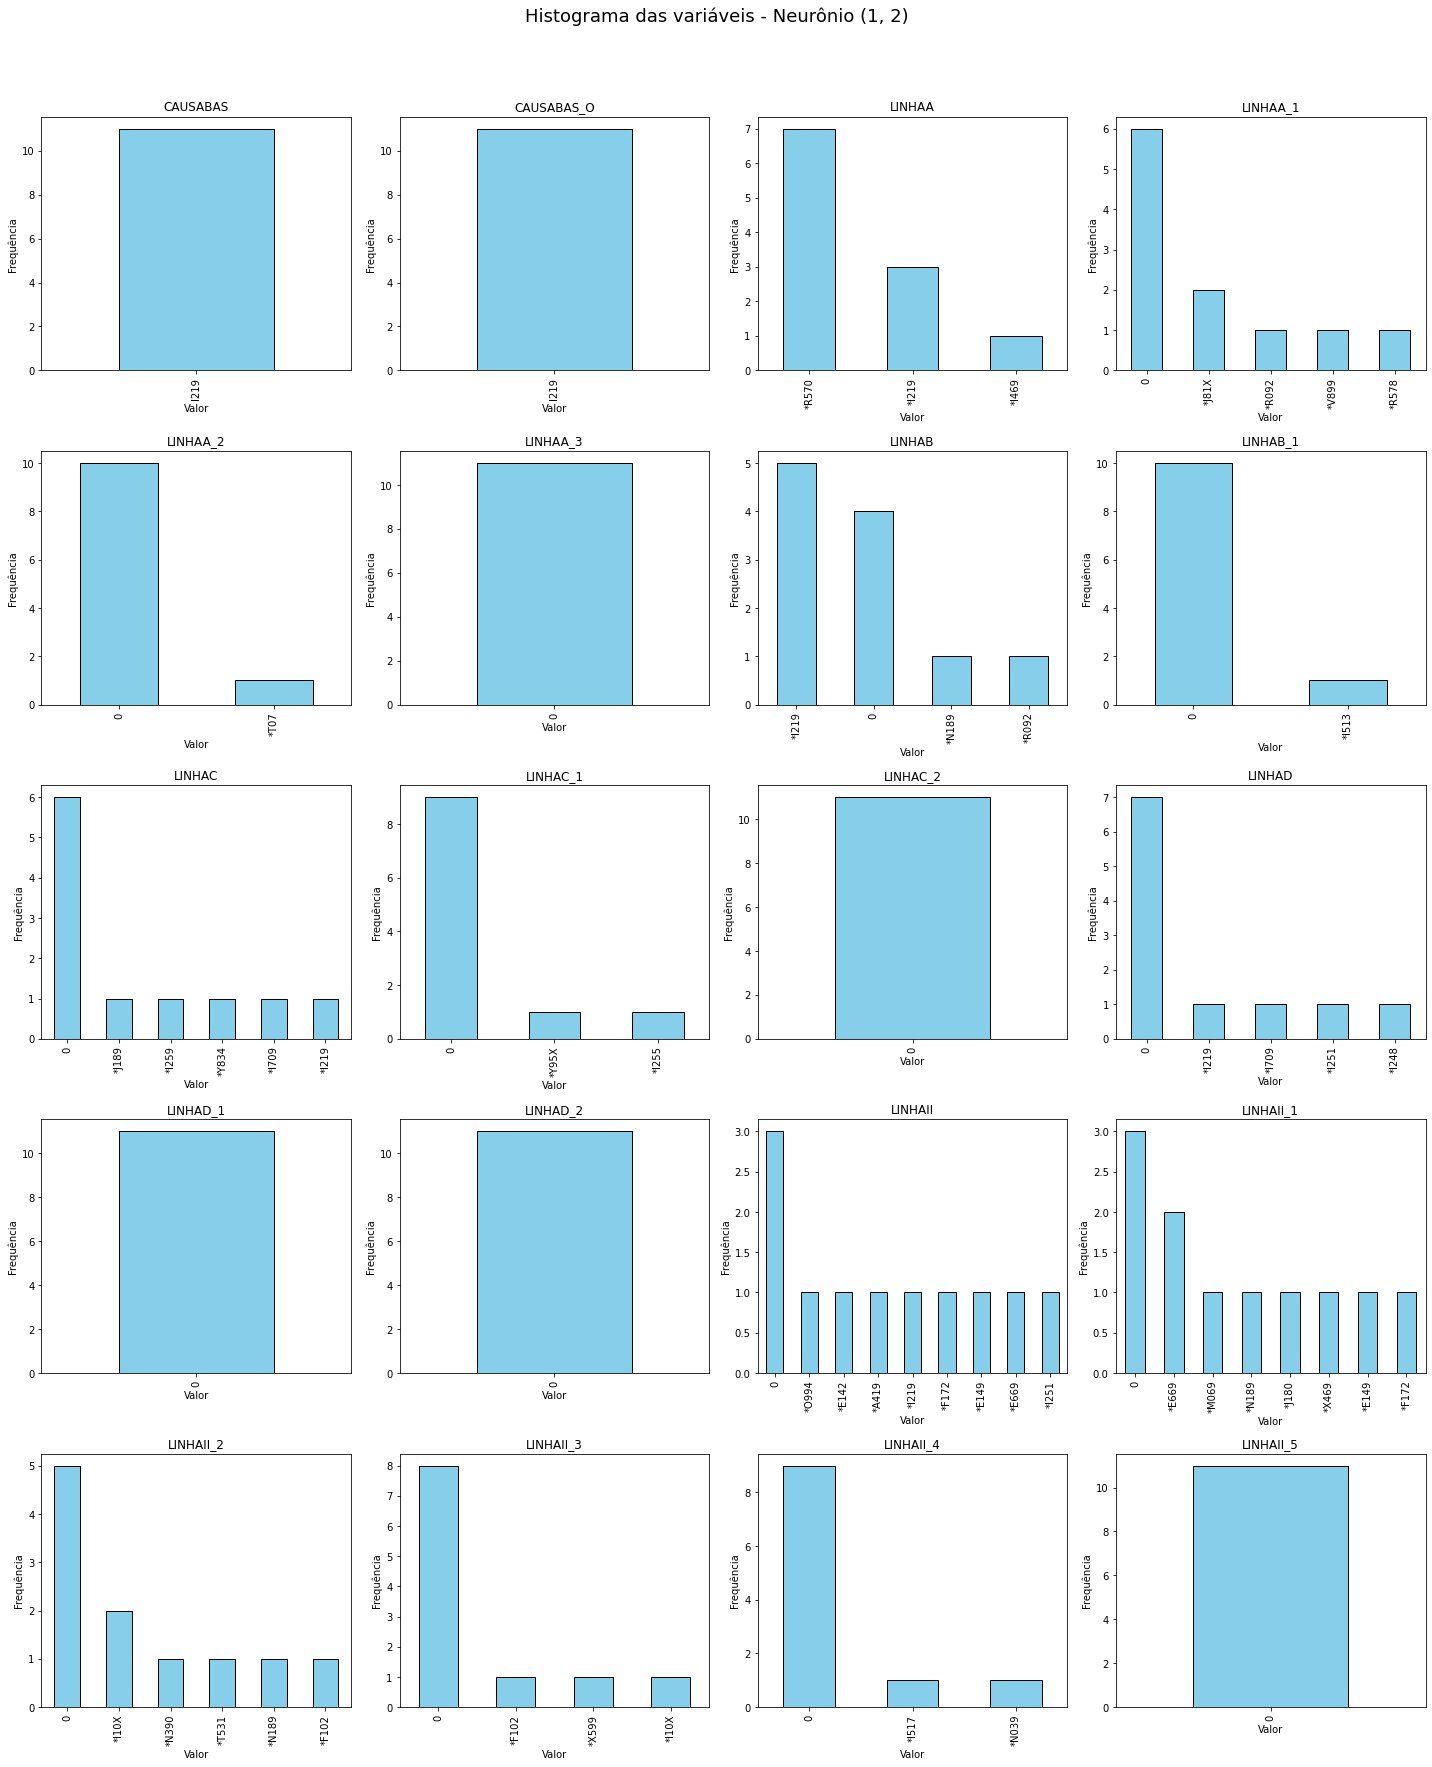

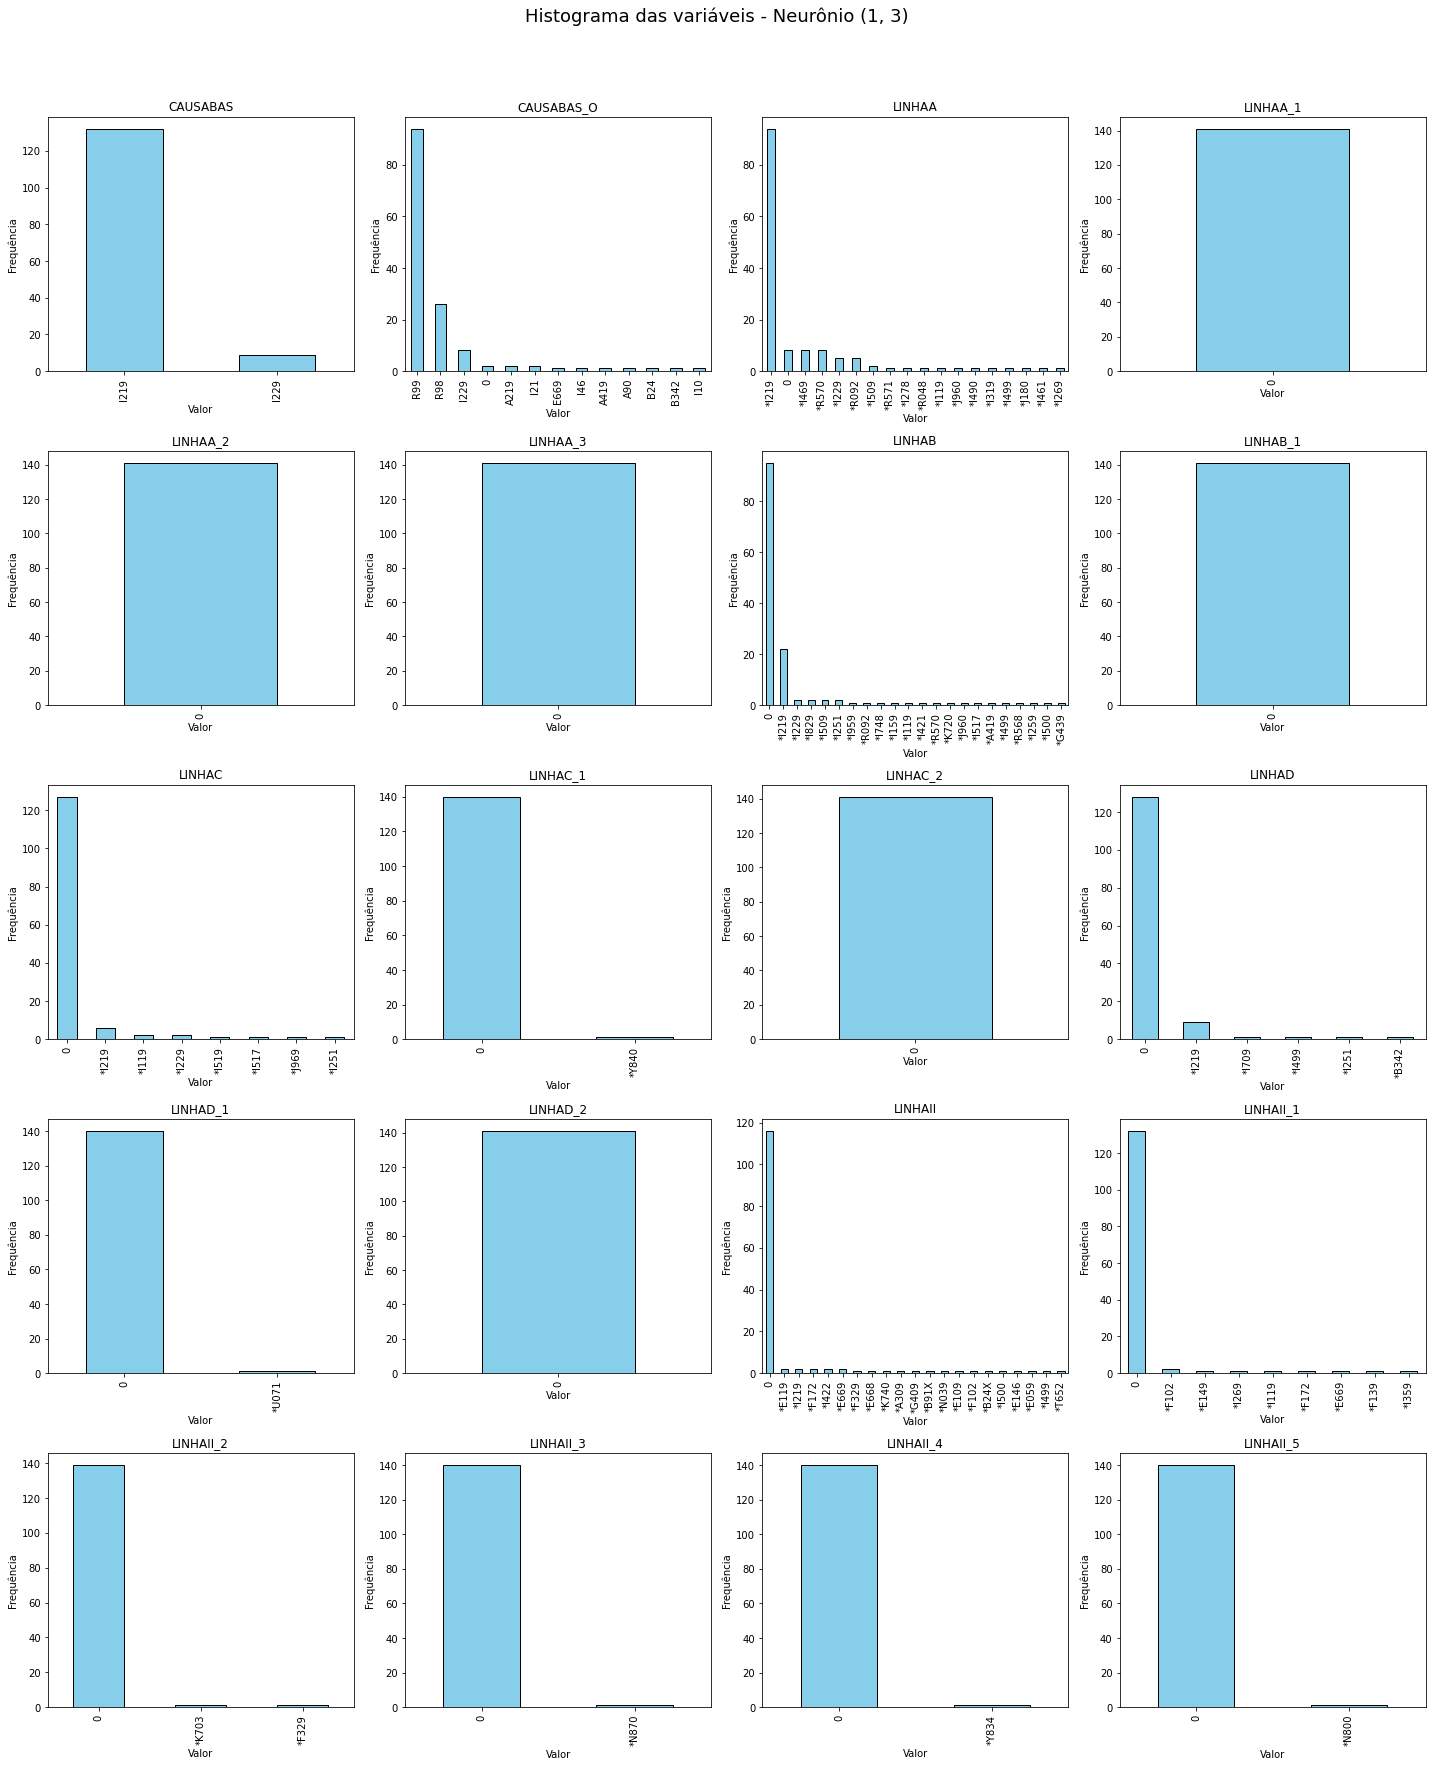

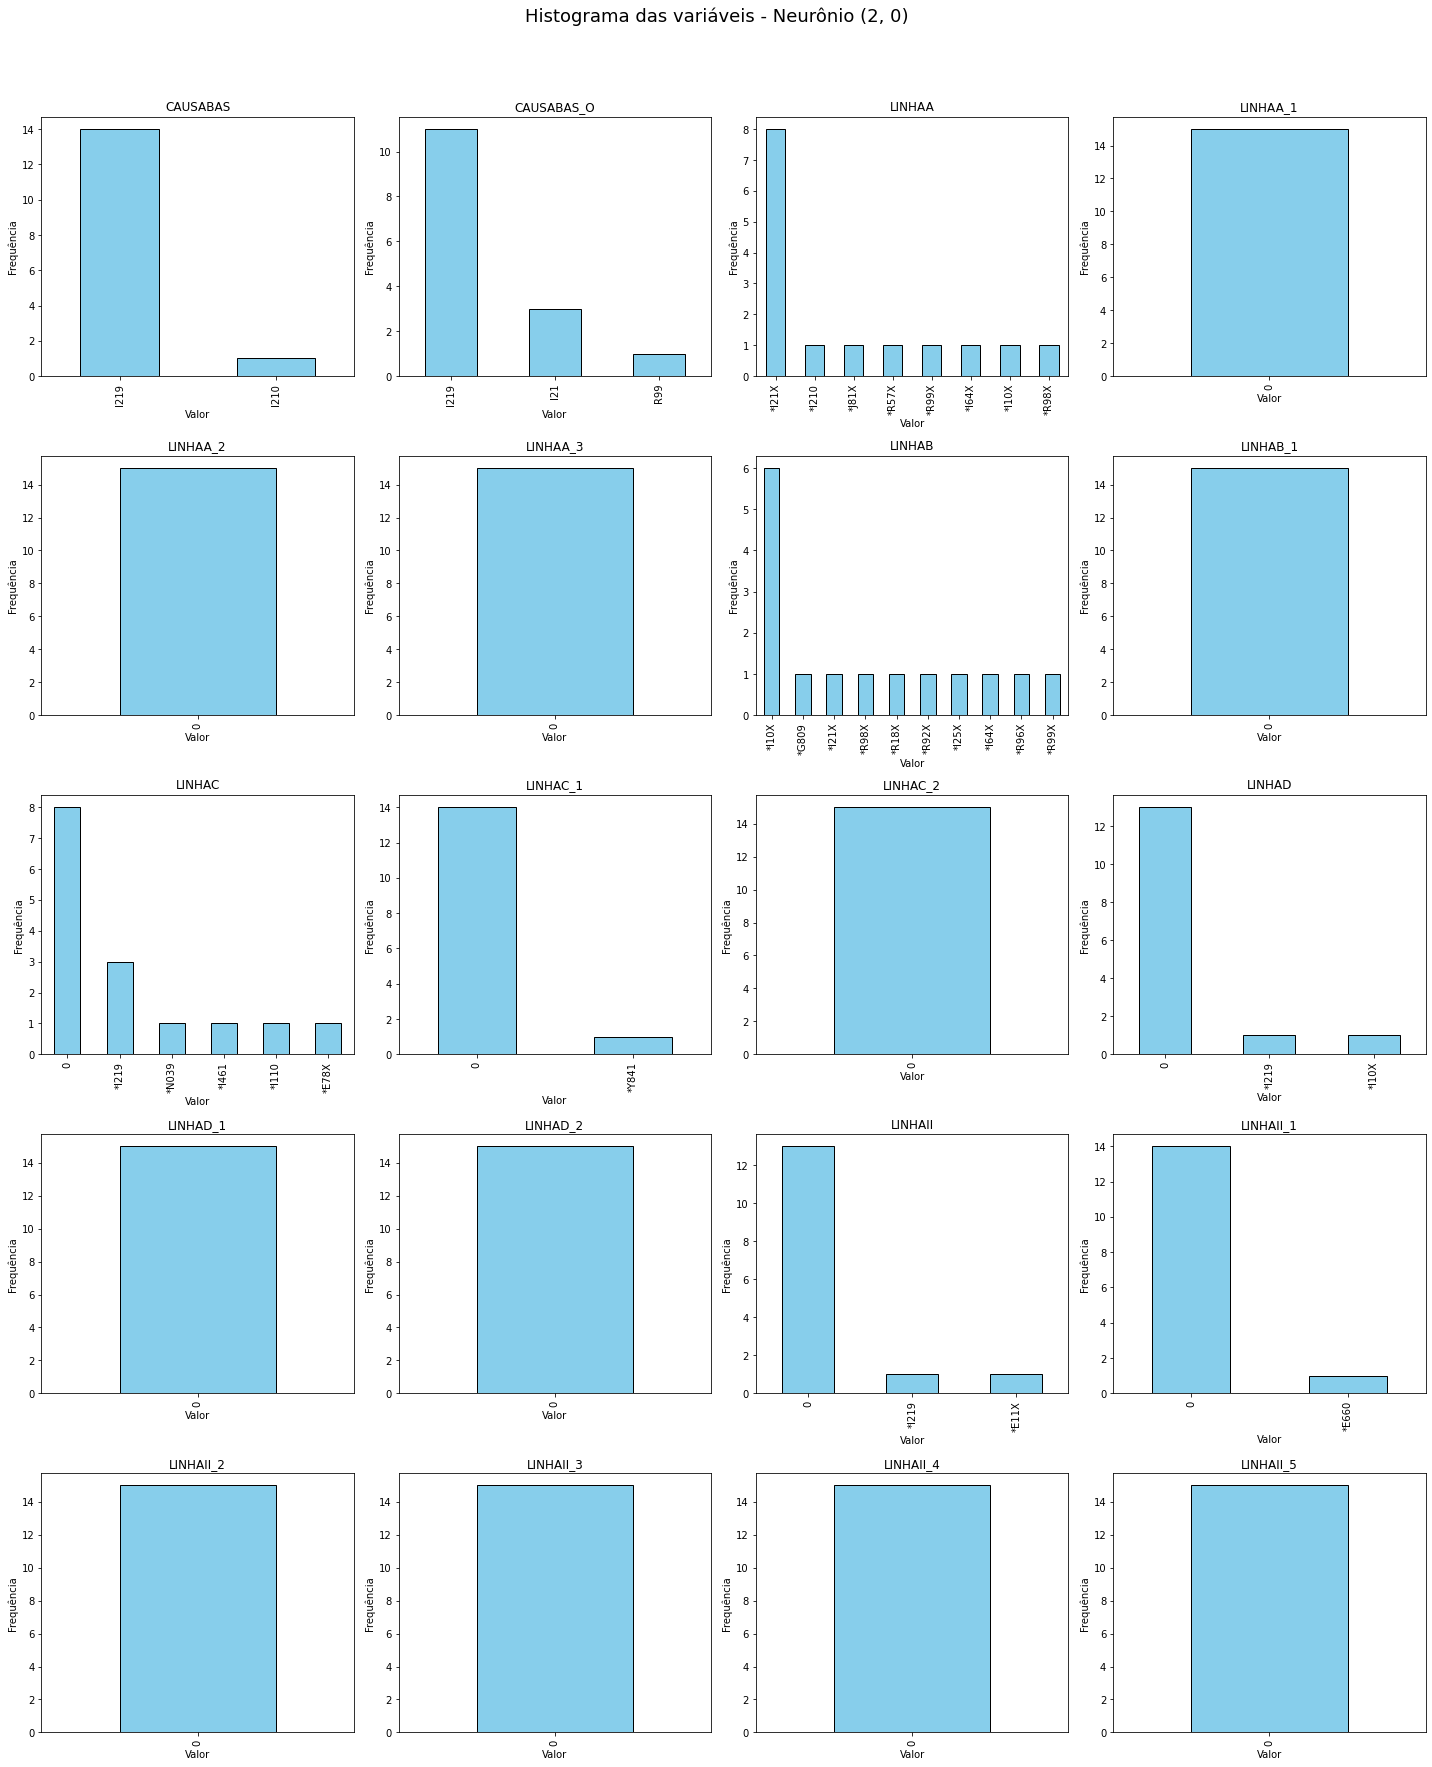

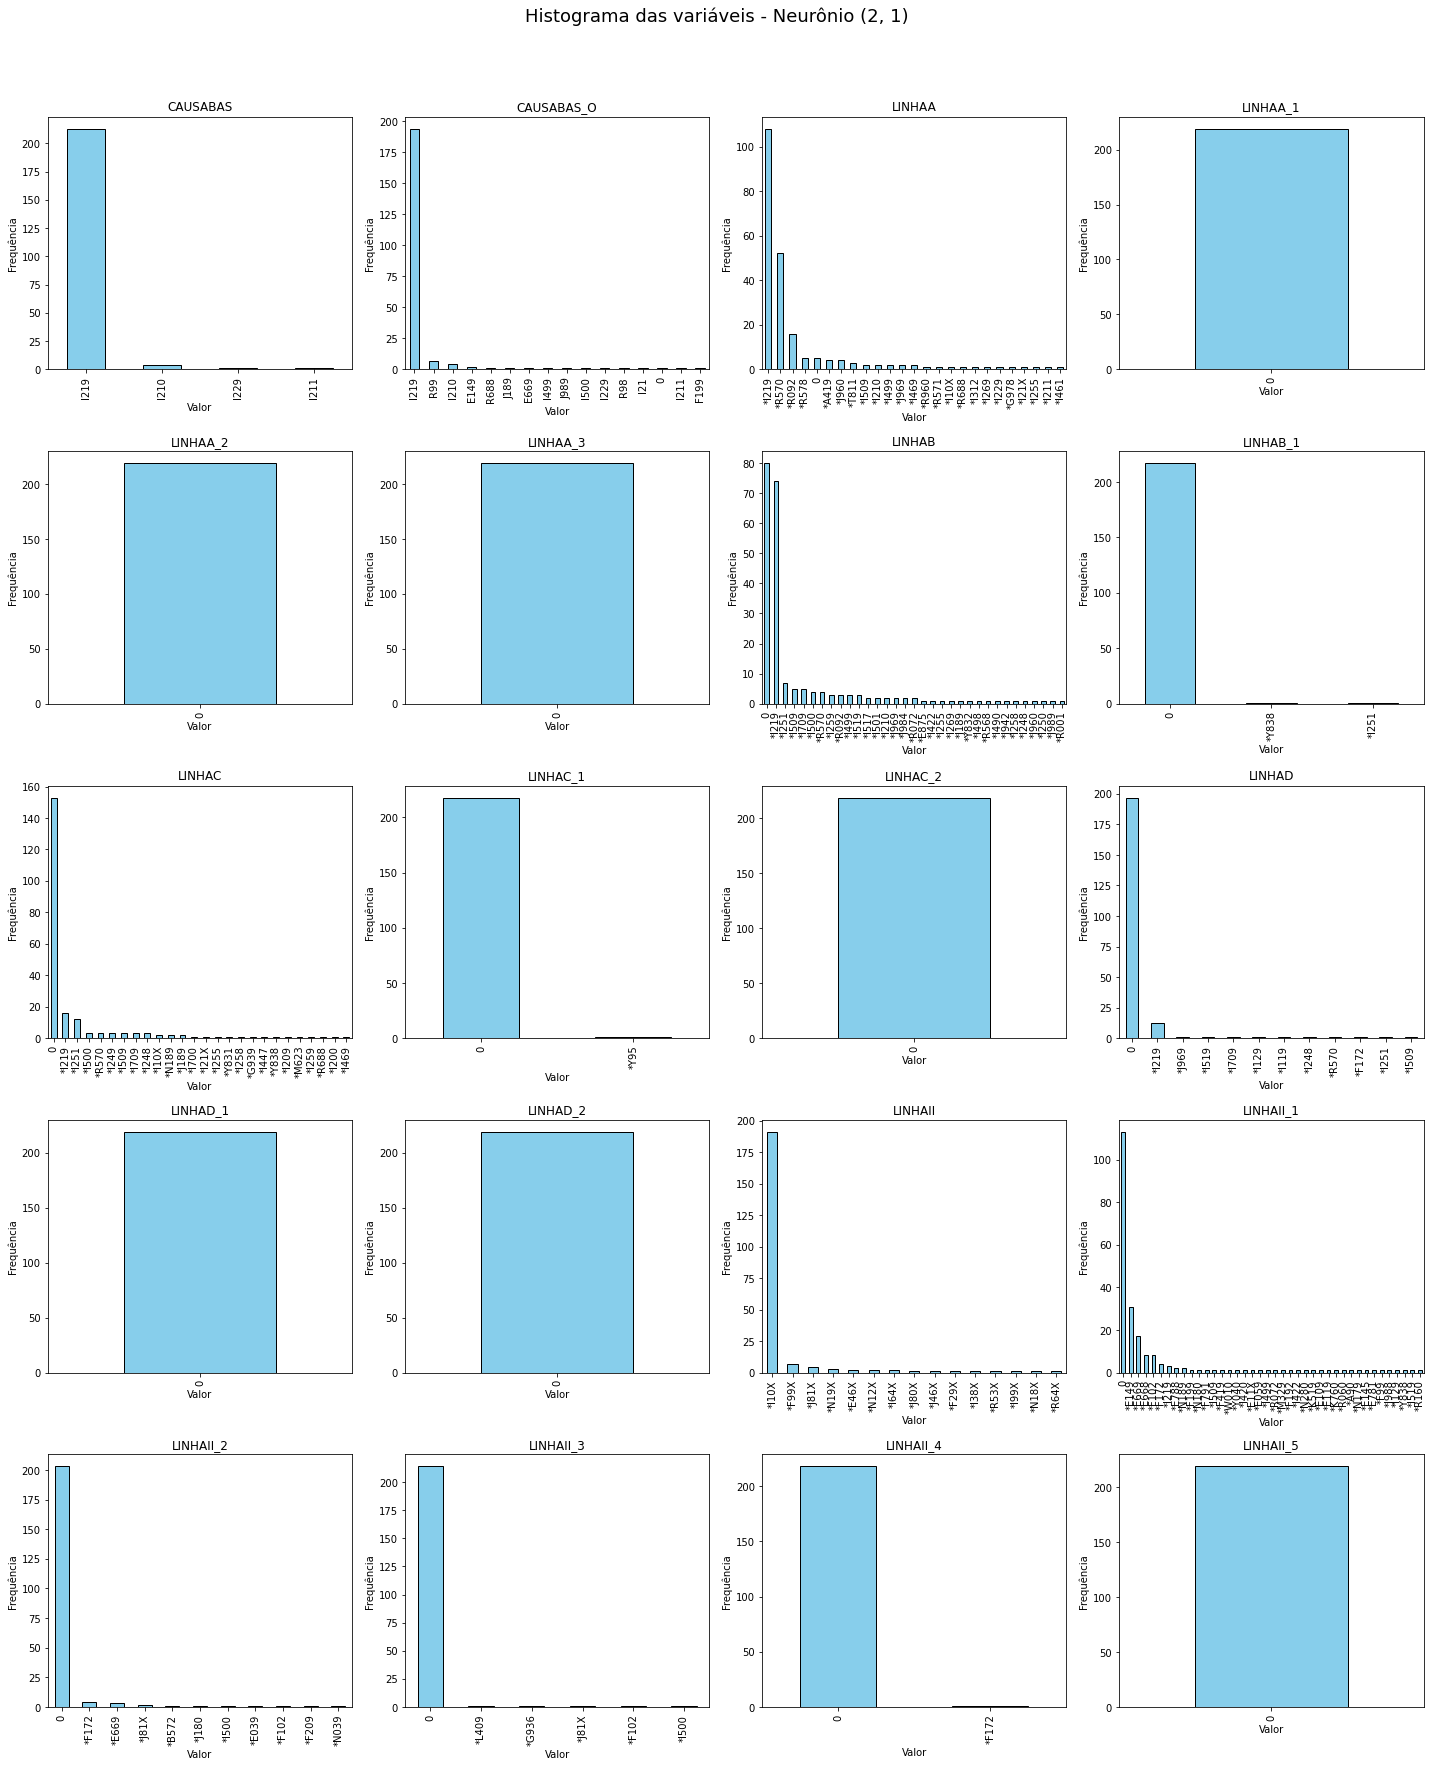

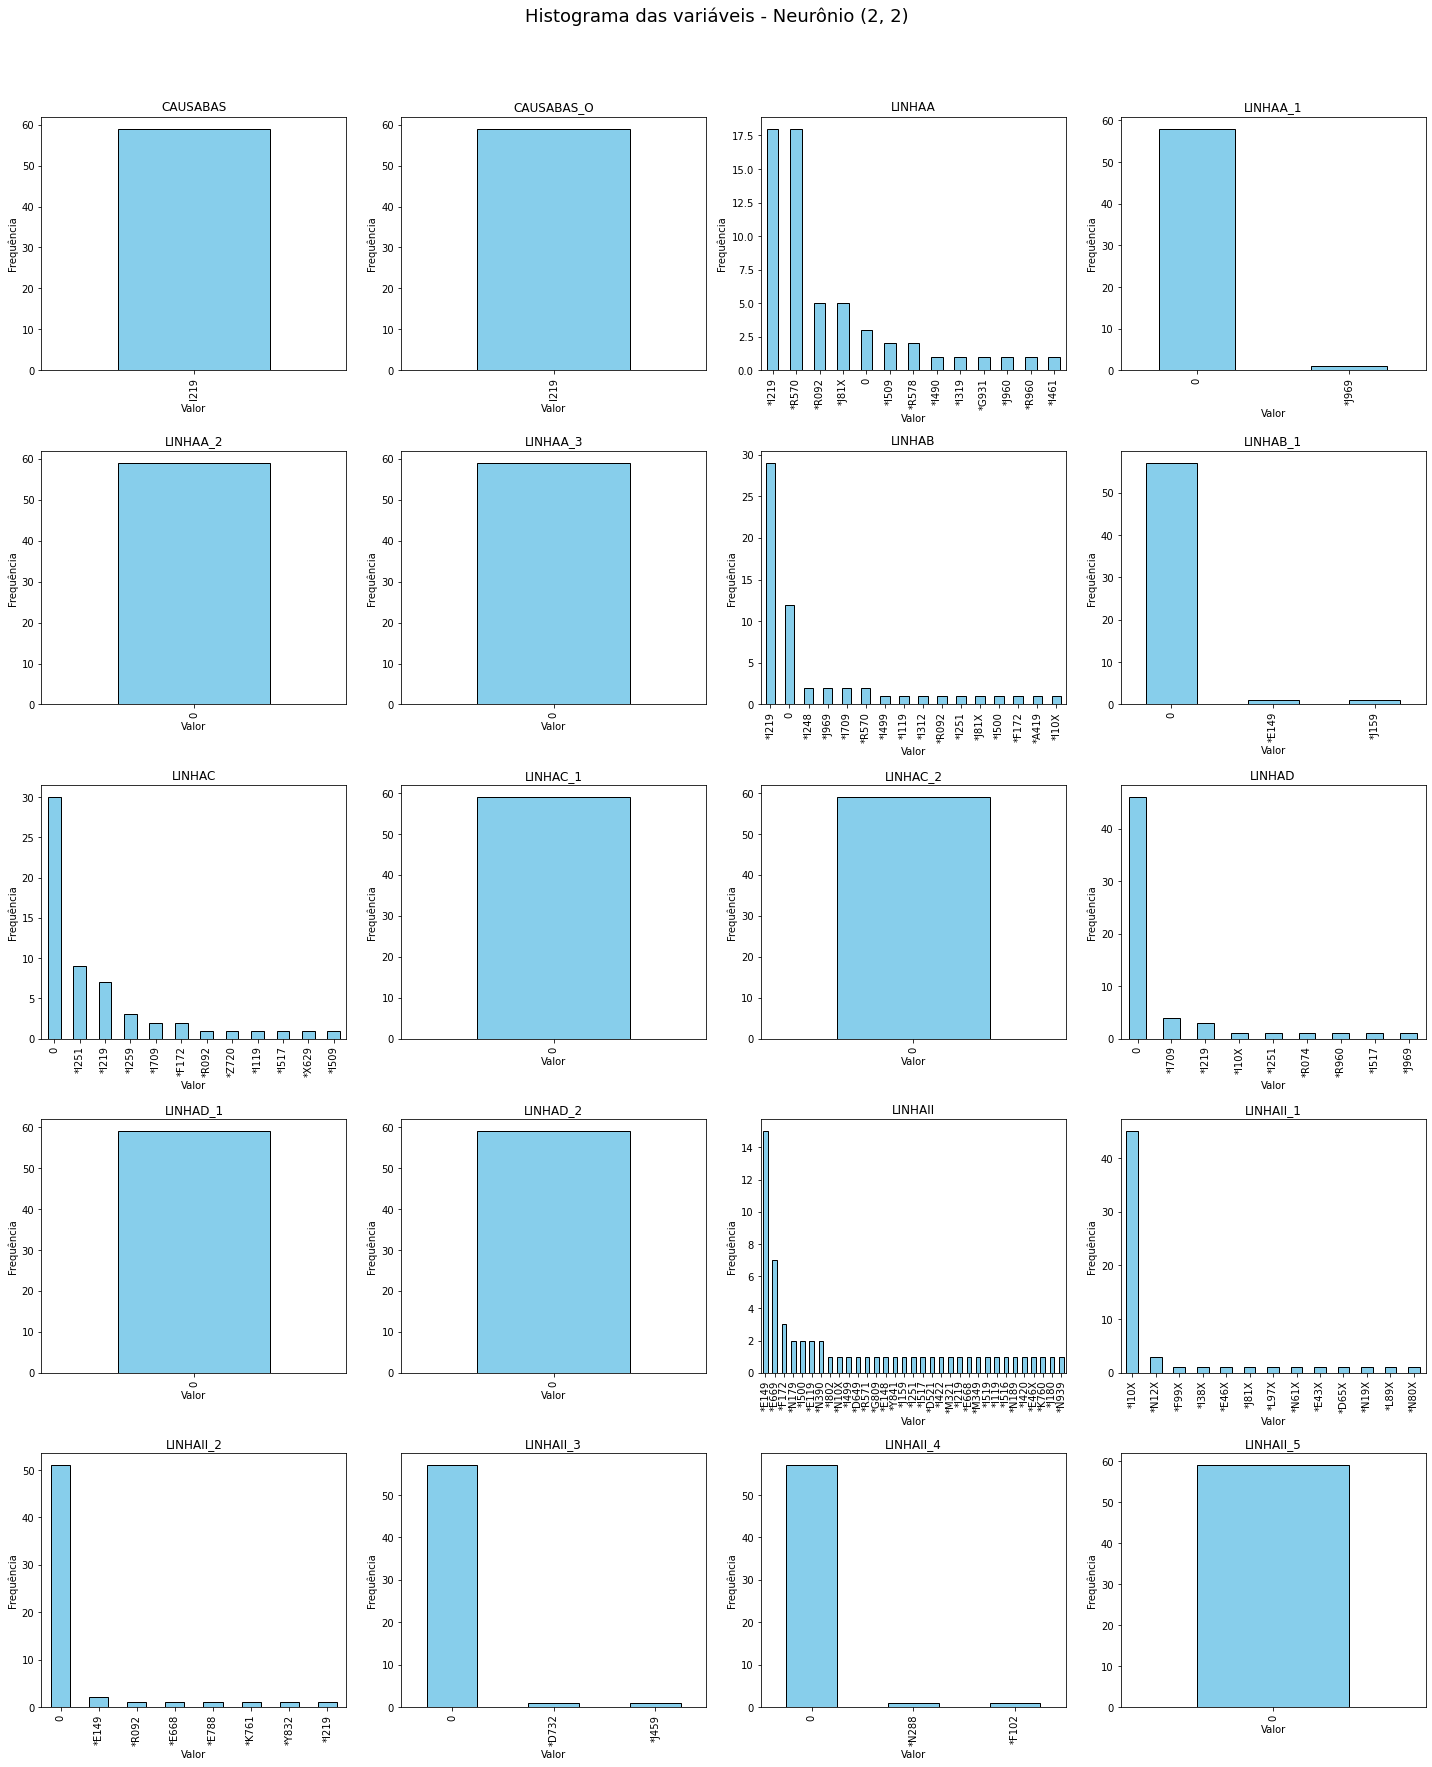

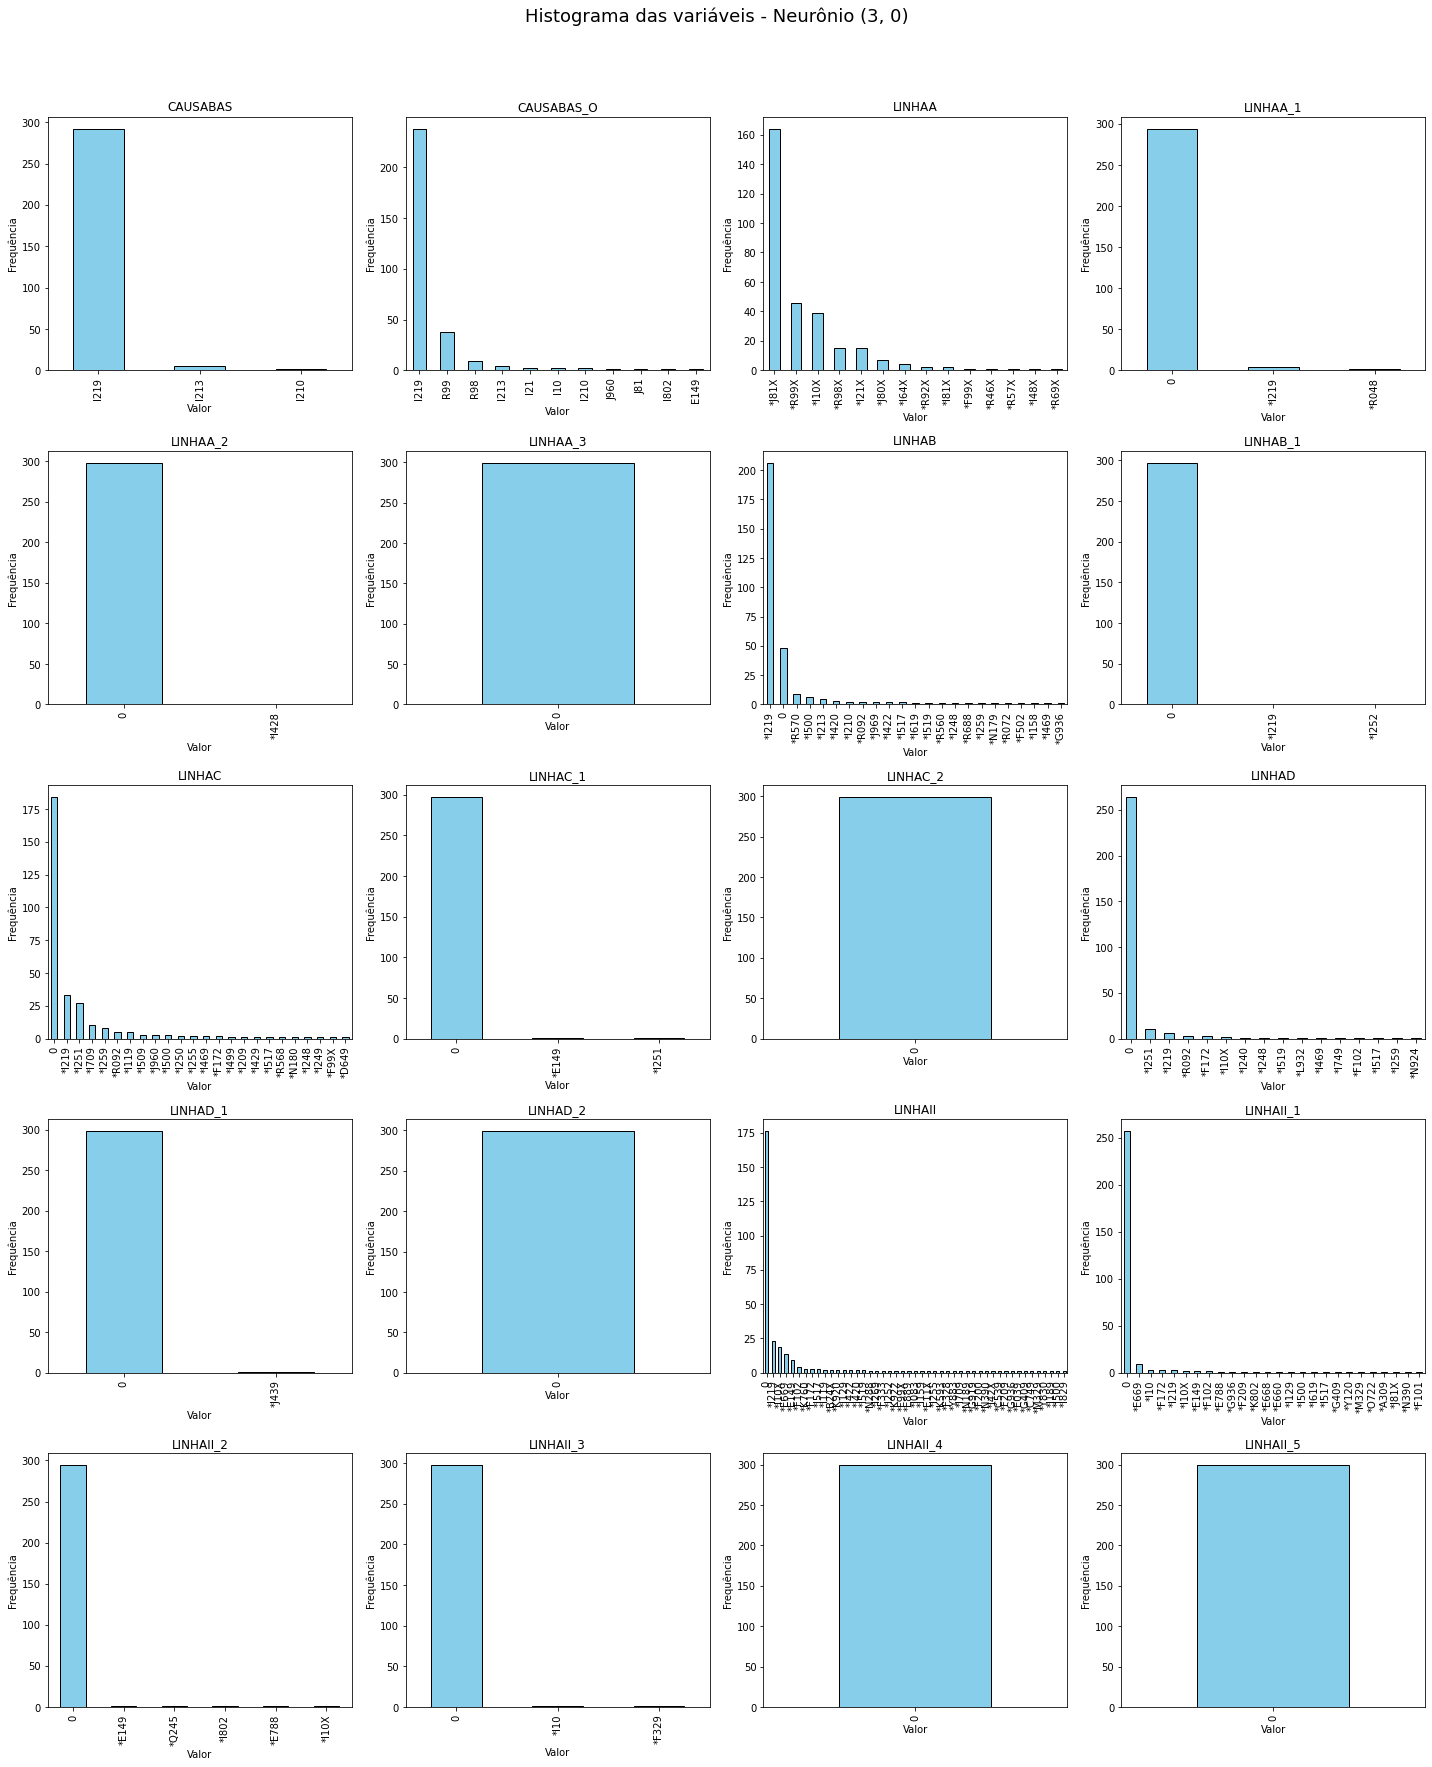

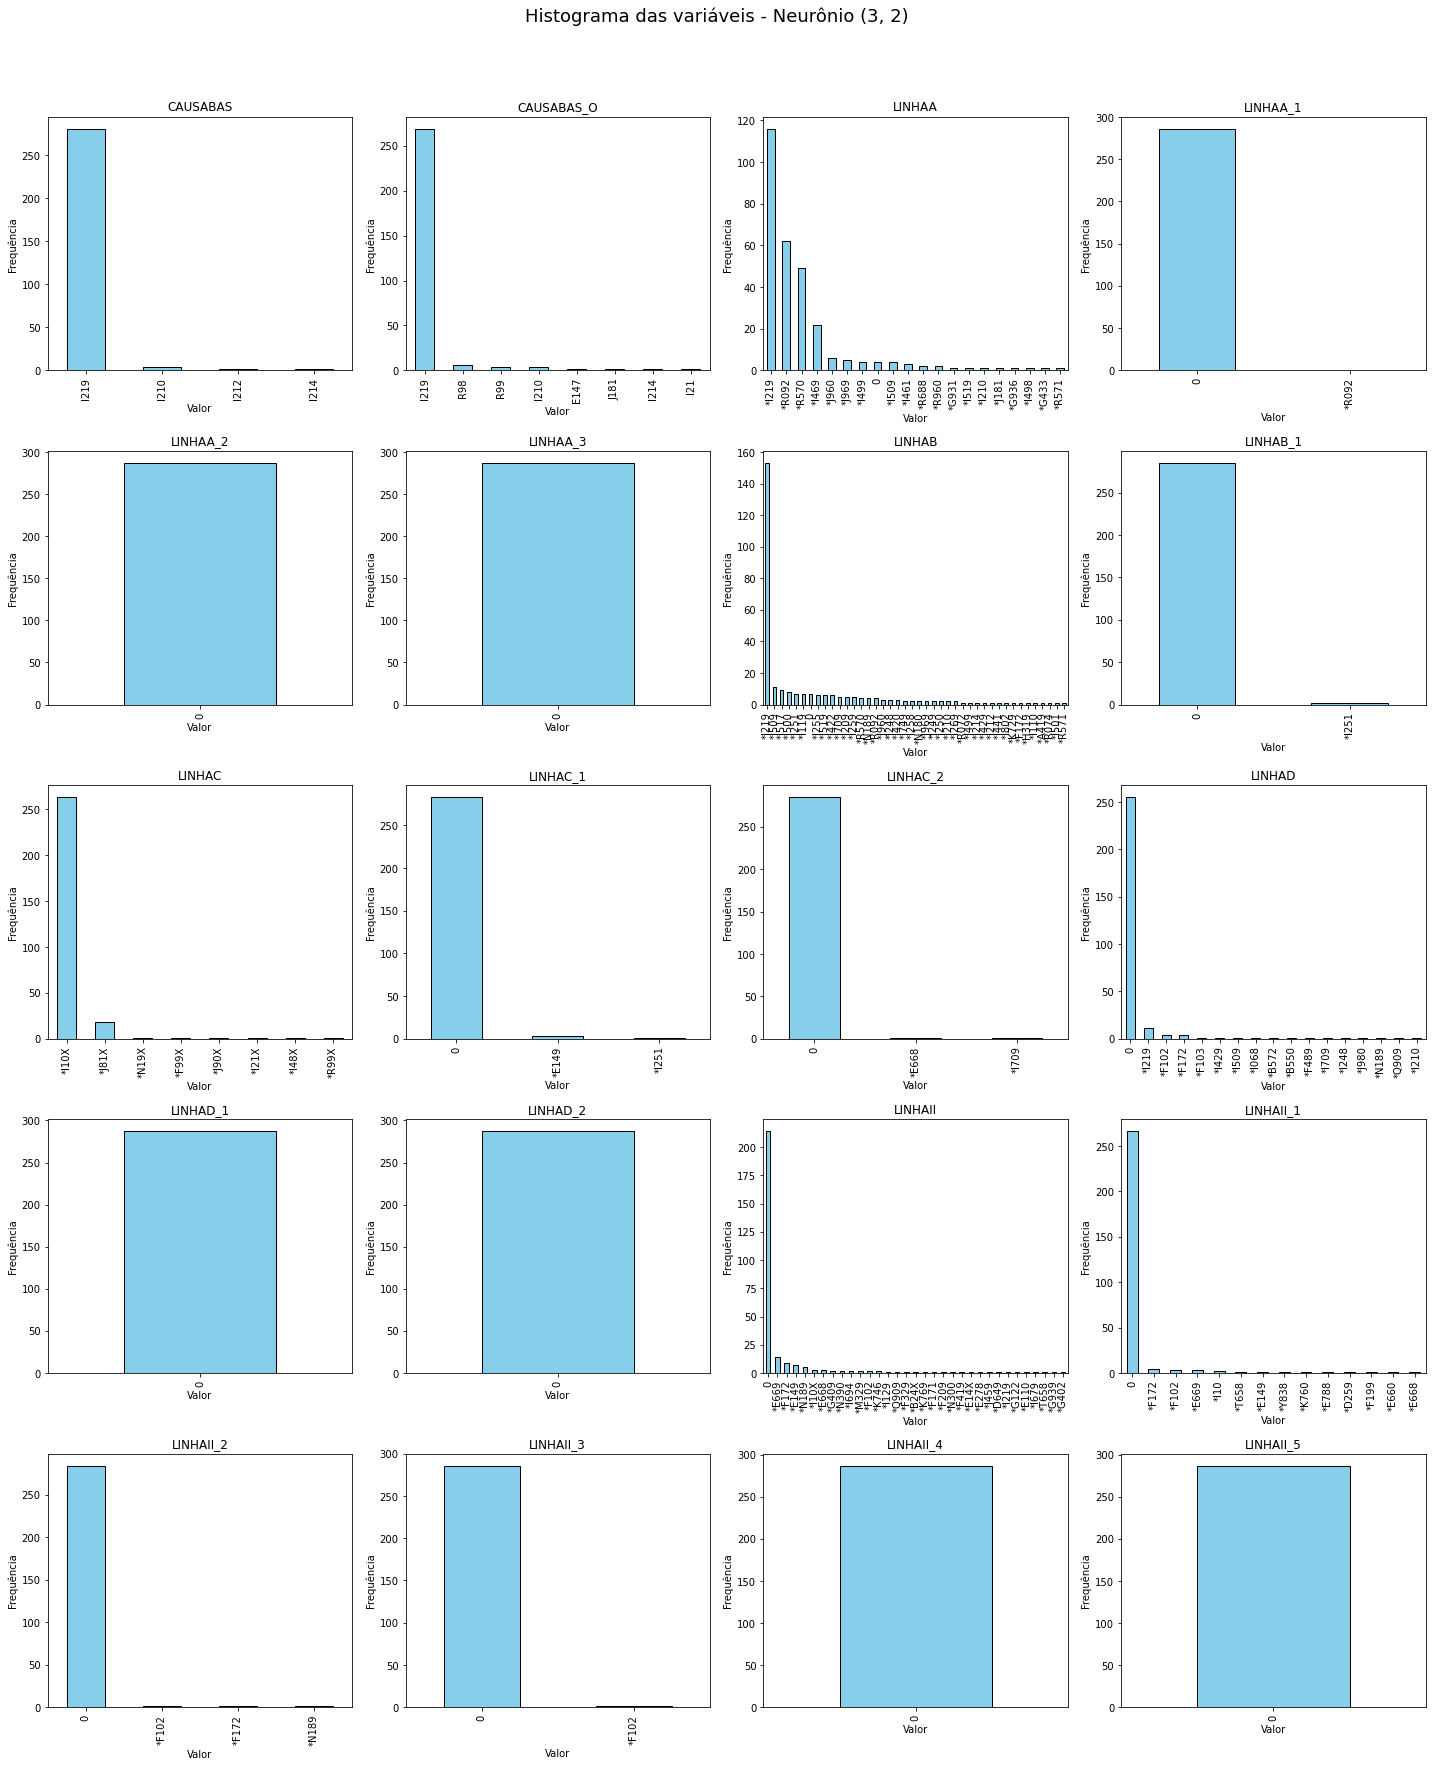

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensões do mapa SOM
x, y = 4, 4

# 1. Carregar os dados ORIGINAIS com CIDs no formato correto
df_original = pd.read_csv('/home/giselle/Documentos/dados_cids_separados.csv')  # ← AJUSTE para o nome do seu arquivo original

# 2. Criar dicionário para guardar instâncias por neurônio
instancias_por_neuronio = {(i, j): [] for i in range(x) for j in range(y)}

# 3. Associar cada instância normalizada ao seu neurônio vencedor no SOM
for idx, x_norm in enumerate(dados_normalizados):
    neuronio = som.winner(x_norm)
    linha_original = df_original.iloc[idx]  # ← Aqui usamos os dados originais!
    instancias_por_neuronio[neuronio].append(linha_original)

# 4. Gerar histogramas para cada neurônio com base nos dados originais
for neuronio, instancias in instancias_por_neuronio.items():
    if not instancias:
        print(f"Neurônio {neuronio} não possui instâncias atribuídas.")
        continue

    df_neuronio = pd.DataFrame(instancias)

    num_variaveis = len(df_neuronio.columns)
    ncols = 4
    nrows = int(np.ceil(num_variaveis / ncols))

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
    fig.suptitle(f'Histograma das variáveis - Neurônio {neuronio}', fontsize=18)

    for i, coluna in enumerate(df_neuronio.columns):
        ax = axs.flat[i]
        try:
            # Converter para string para garantir categorização correta
            df_neuronio[coluna].dropna().astype(str).value_counts().plot.bar(
                ax=ax, color='skyblue', edgecolor='black'
            )
            ax.set_title(coluna)
            ax.set_xlabel('Valor')
            ax.set_ylabel('Frequência')
        except Exception as e:
            ax.set_visible(False)
            print(f"Erro ao plotar coluna '{coluna}' no neurônio {neuronio}: {e}")

    # Esconder subplots não utilizados
    for j in range(i + 1, len(axs.flat)):
        axs.flat[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


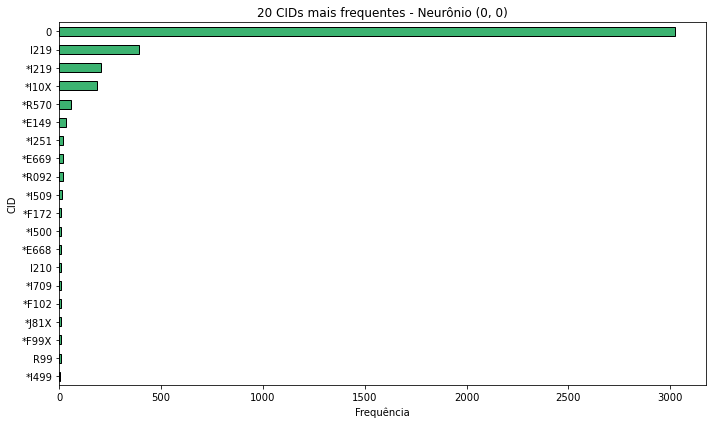

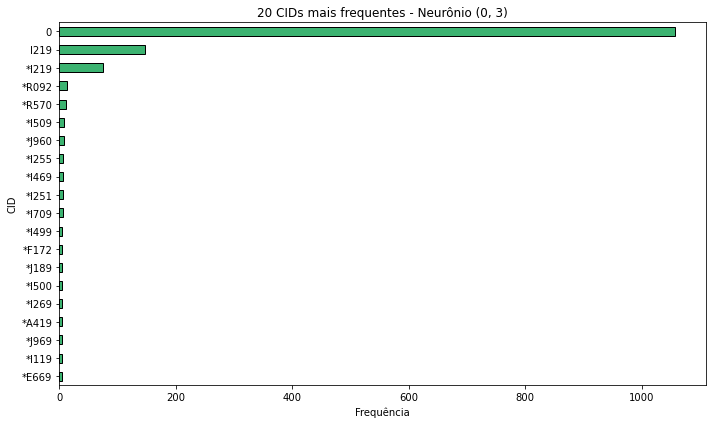

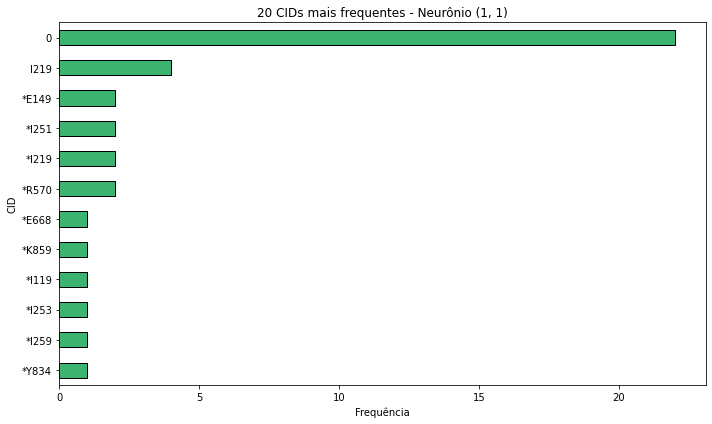

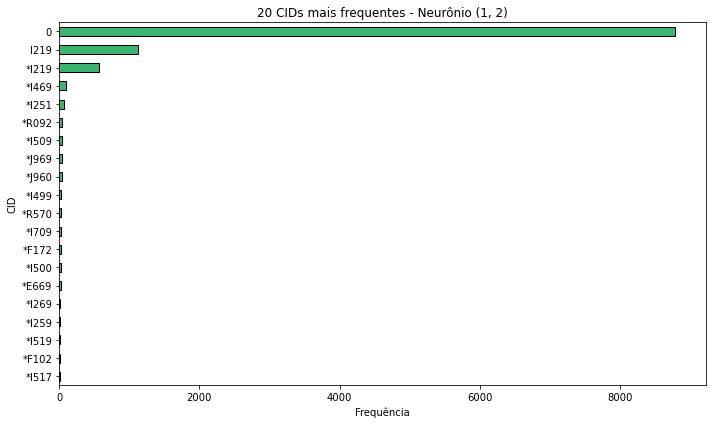

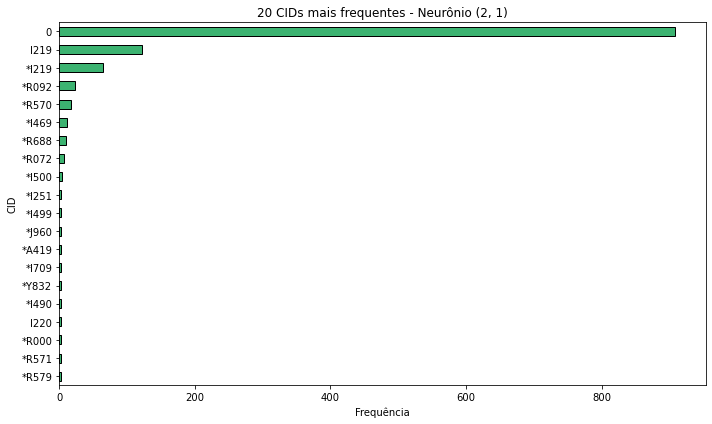

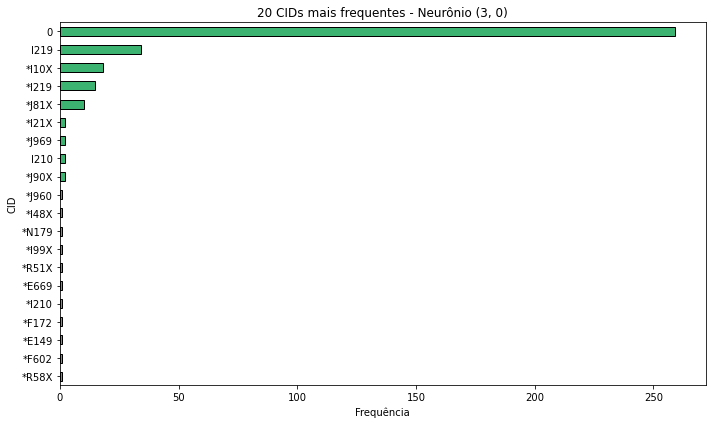

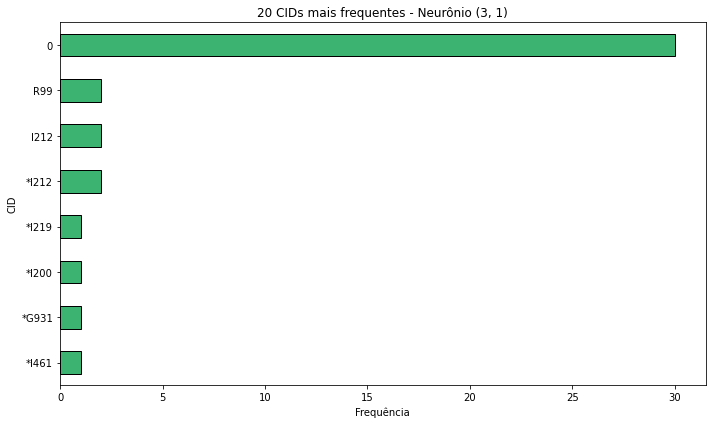

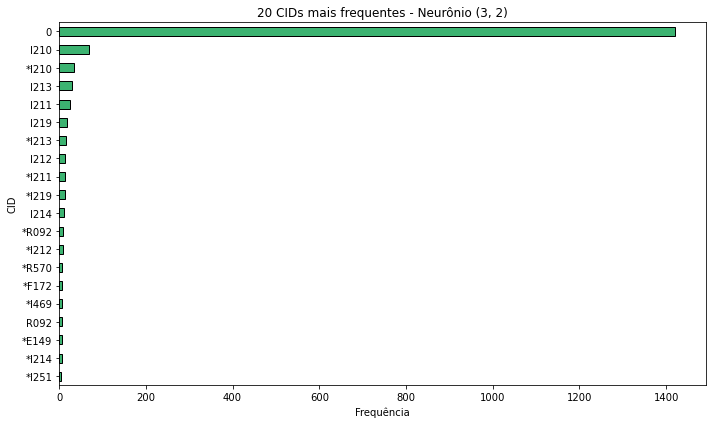

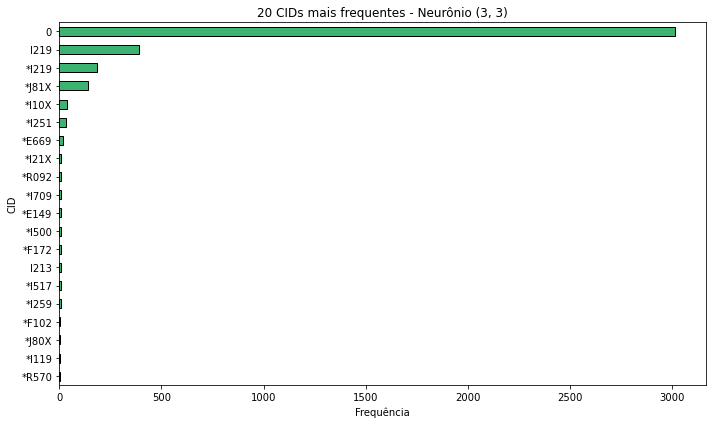

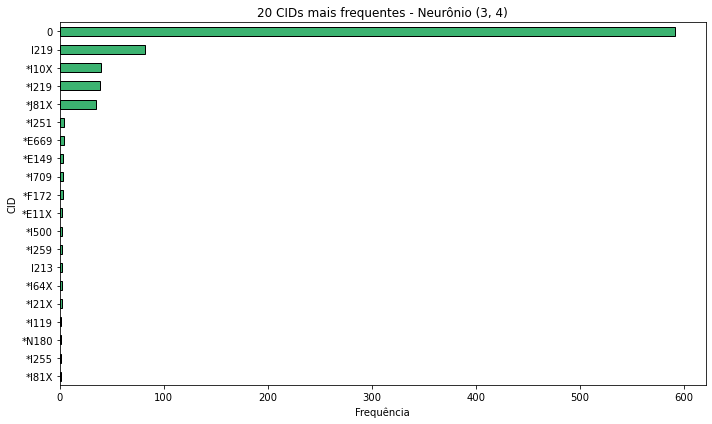

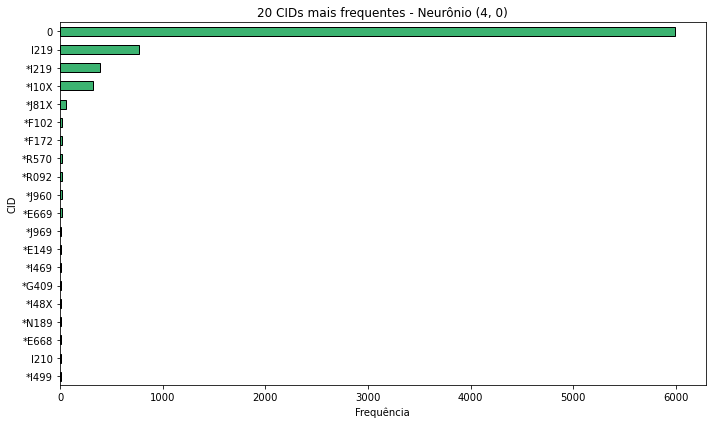

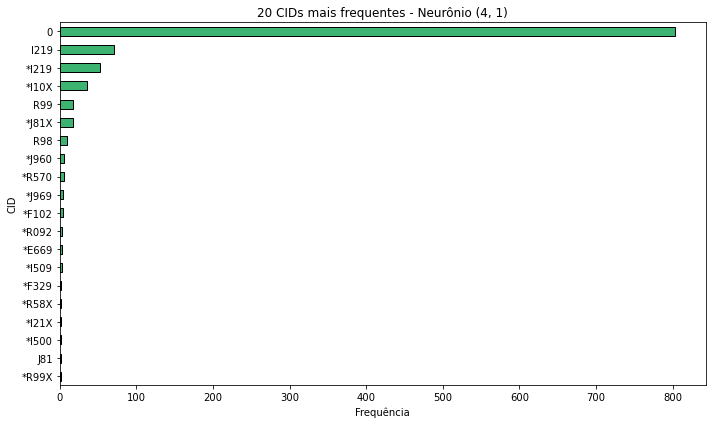

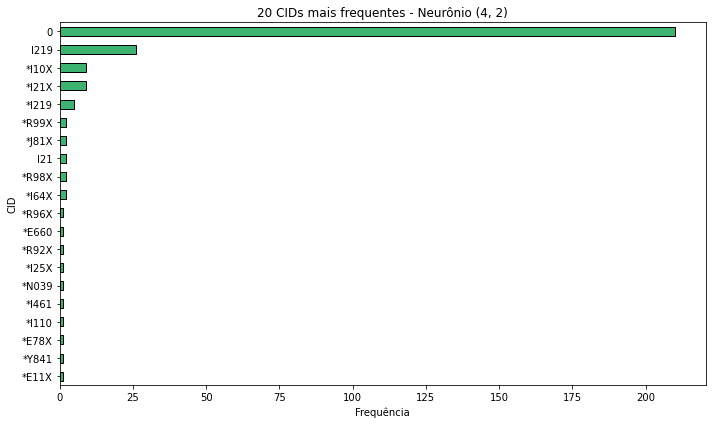

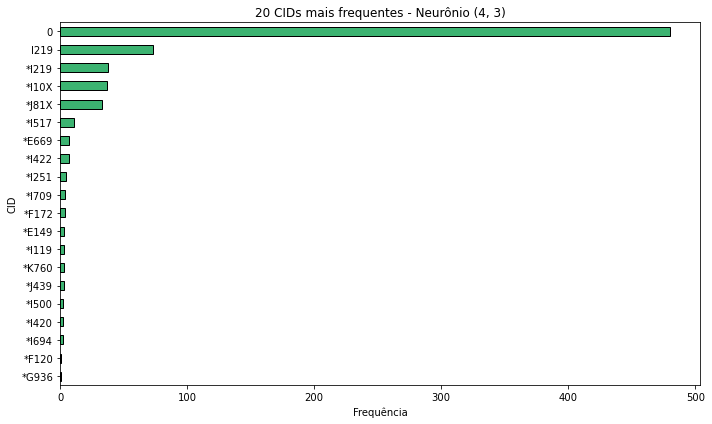

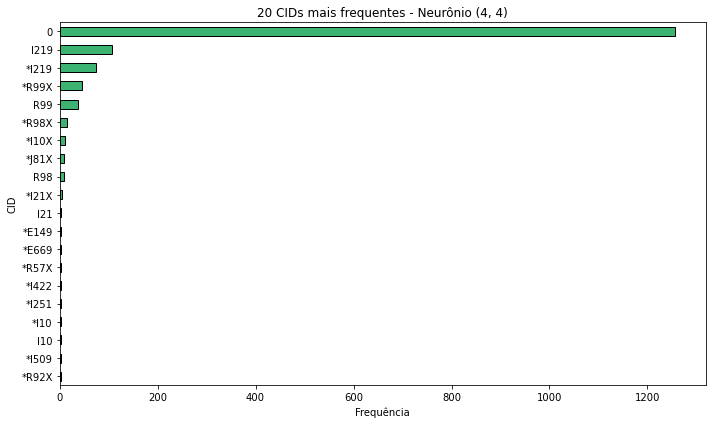

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dimensões do SOM — usamos agora o shape real dos pesos
x_real, y_real = som.get_weights().shape[:2]

# 1. Carregar os dados originais com CIDs não modificados
df_original = pd.read_csv('/home/giselle/Documentos/dados_cids_separados.csv')

# 2. Definir colunas que contêm os CIDs
colunas_cid = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# 3. Criar dicionário de instâncias por neurônio com shape real
instancias_por_neuronio = {(i, j): [] for i in range(x_real) for j in range(y_real)}

# 4. Associar cada instância normalizada ao seu neurônio vencedor
for idx, x_norm in enumerate(dados_normalizados):
    neuronio = som.winner(x_norm)
    linha_original = df_original.iloc[idx]
    instancias_por_neuronio[neuronio].append(linha_original)

# 5. Para cada neurônio, contar os 20 CIDs mais frequentes
for neuronio, instancias in instancias_por_neuronio.items():
    if not instancias:
        print(f"⚠️ Neurônio {neuronio} não possui instâncias.")
        continue

    df_neuronio = pd.DataFrame(instancias)

    # Combinar todas as colunas de CID em uma única série
    todos_cids = pd.Series(dtype=str)
    for coluna in colunas_cid:
        if coluna in df_neuronio.columns:
            cids_col = df_neuronio[coluna].dropna().astype(str)
            todos_cids = pd.concat([todos_cids, cids_col])

    # Contagem e seleção dos 20 CIDs mais frequentes
    contagem_cids = todos_cids.value_counts().sort_values(ascending=True).tail(20)

    # Plot
    plt.figure(figsize=(10, 6))
    contagem_cids.plot(kind='barh', color='mediumseagreen', edgecolor='black')
    plt.title(f'20 CIDs mais frequentes - Neurônio {neuronio}')
    plt.xlabel('Frequência')
    plt.ylabel('CID')
    plt.tight_layout()
    plt.show()


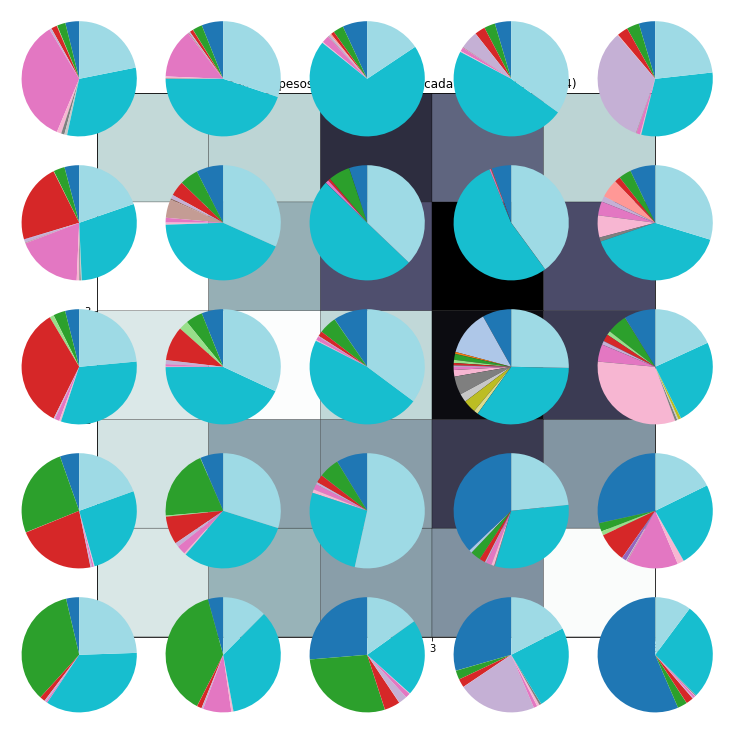

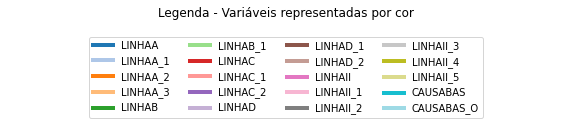

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Garantir reprodutibilidade
np.random.seed(42)

# Caminho único para os dados
caminho_dataset = '/home/giselle/Documentos/Mortalidade_dados_selecionados - dados.csv'

# Carregar os dados
dados = pd.read_csv(caminho_dataset)

# Lista das variáveis desejadas
variaveis_desejadas = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# Dados filtrados (não normalizados)
df_original = dados[variaveis_desejadas].select_dtypes(include=['int64', 'float64'])

# Normalização
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_original)

# Treinar SOM com parâmetros fixos
x, y = 5, 5
som = MiniSom(x=x, y=y,
              input_len=dados_normalizados.shape[1],
              sigma=1.0,
              learning_rate=0.2,
              activation_distance='cosine',
              random_seed=42)
som.random_weights_init(dados_normalizados)
som.train_random(dados_normalizados, num_iteration=50000)

# Plot do SOM com gráficos de pizza
pesos = som.get_weights()
cores = plt.cm.tab20(np.linspace(0, 1, dados_normalizados.shape[1]))
labels = df_original.columns.tolist()

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r', edgecolors='k')
plt.title('Composição dos pesos das variáveis em cada neurônio (SOM 4x4)')

for i in range(x):
    for j in range(y):
        neuron_weights = pesos[i, j]
        neuron_weights = neuron_weights / np.sum(neuron_weights)
        cx, cy = j, i
        pie_ax = plt.axes([cx/y, 1 - (cy+1)/x, 1/y, 1/x])
        pie_ax.pie(neuron_weights, colors=cores, startangle=90)
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])

fig_legenda = plt.figure(figsize=(10, 2))
plt.legend(handles=[plt.Line2D([0], [0], color=c, lw=4) for c in cores],
           labels=labels, loc='center', ncol=4)
plt.axis('off')
plt.title("Legenda - Variáveis representadas por cor")
plt.show()


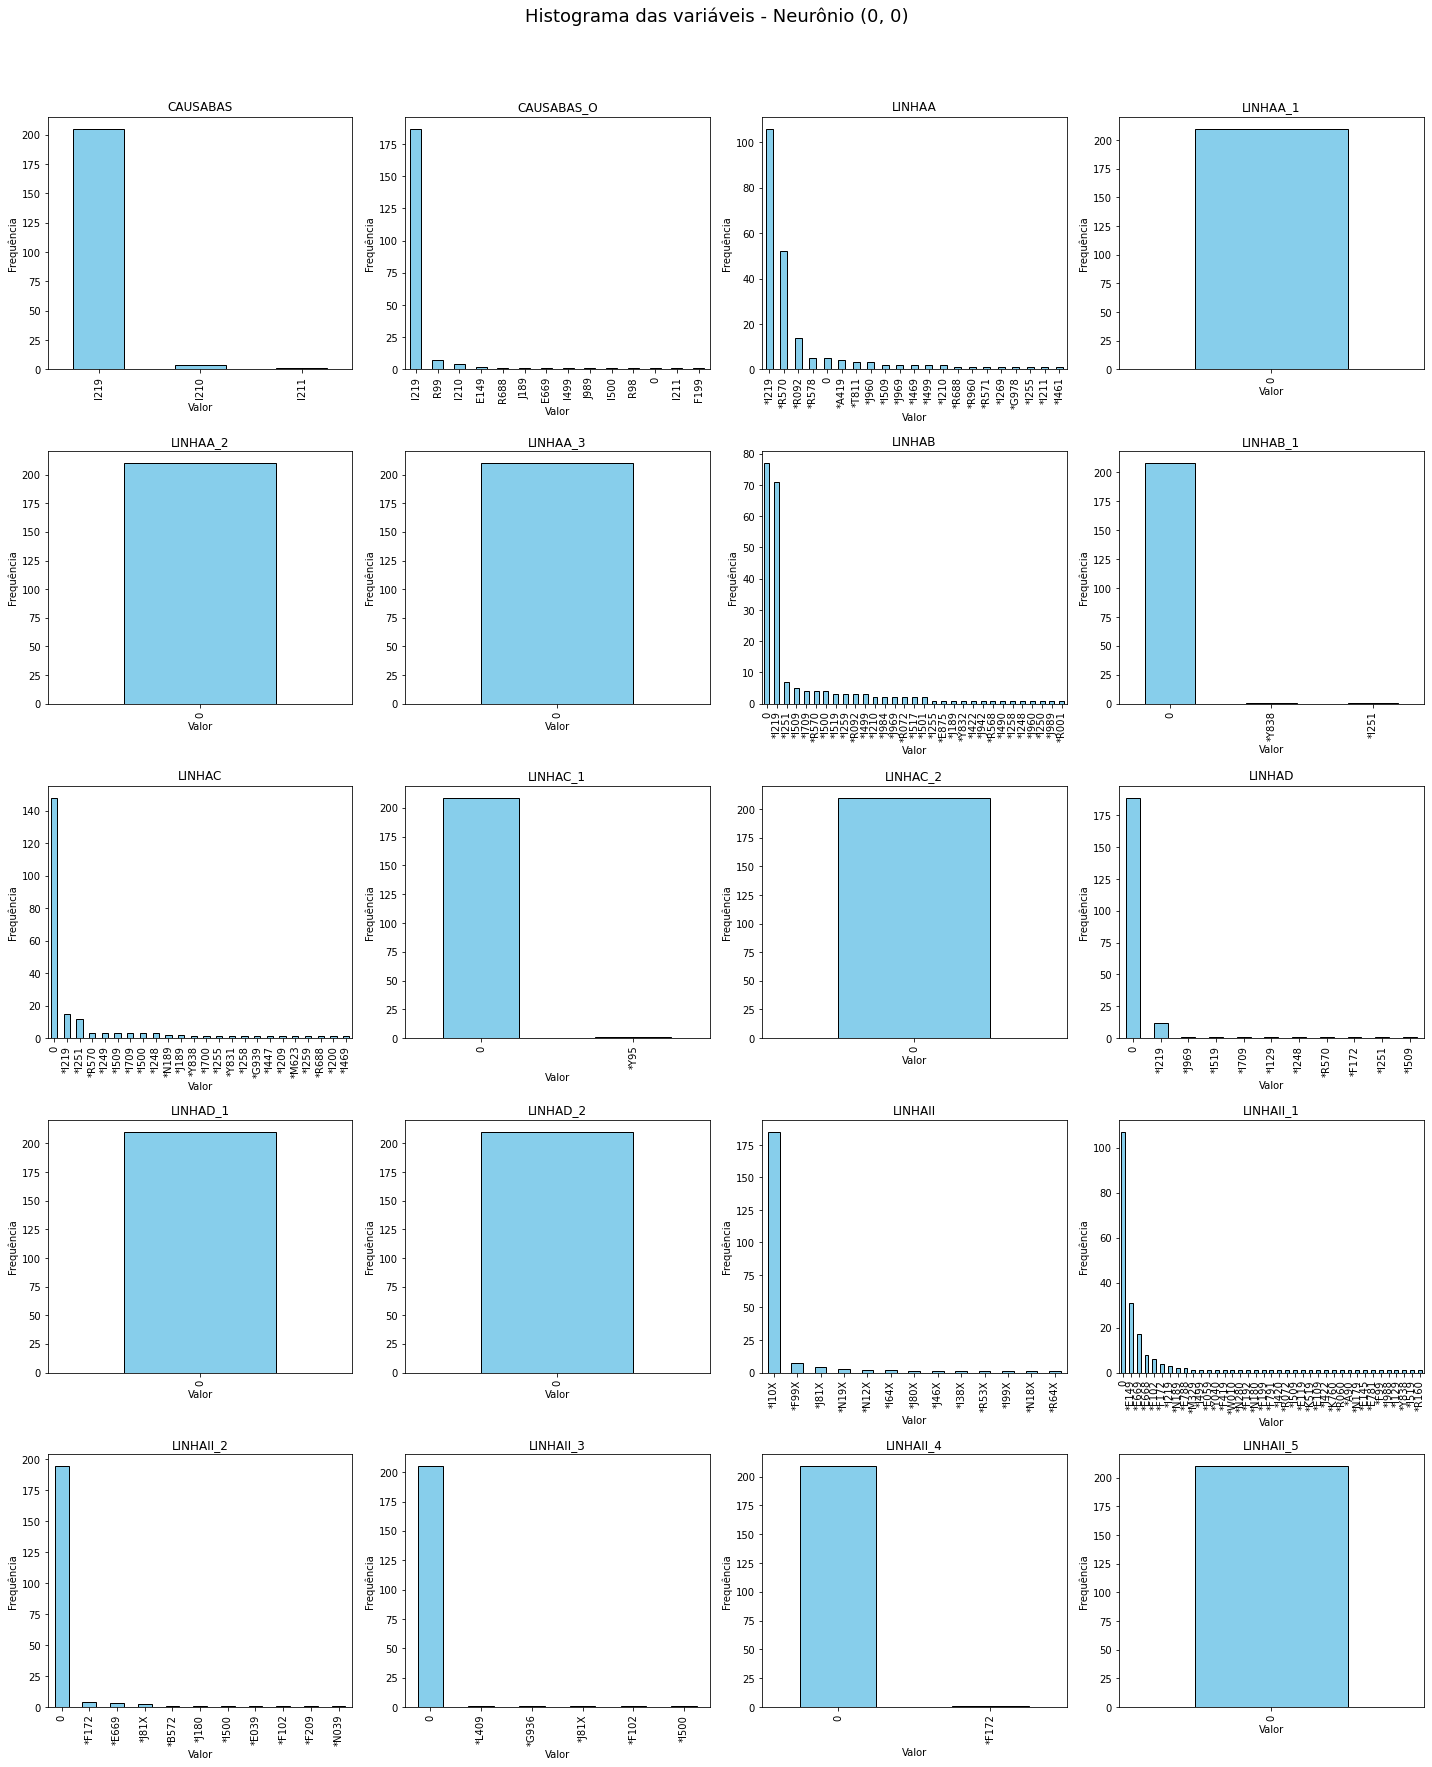

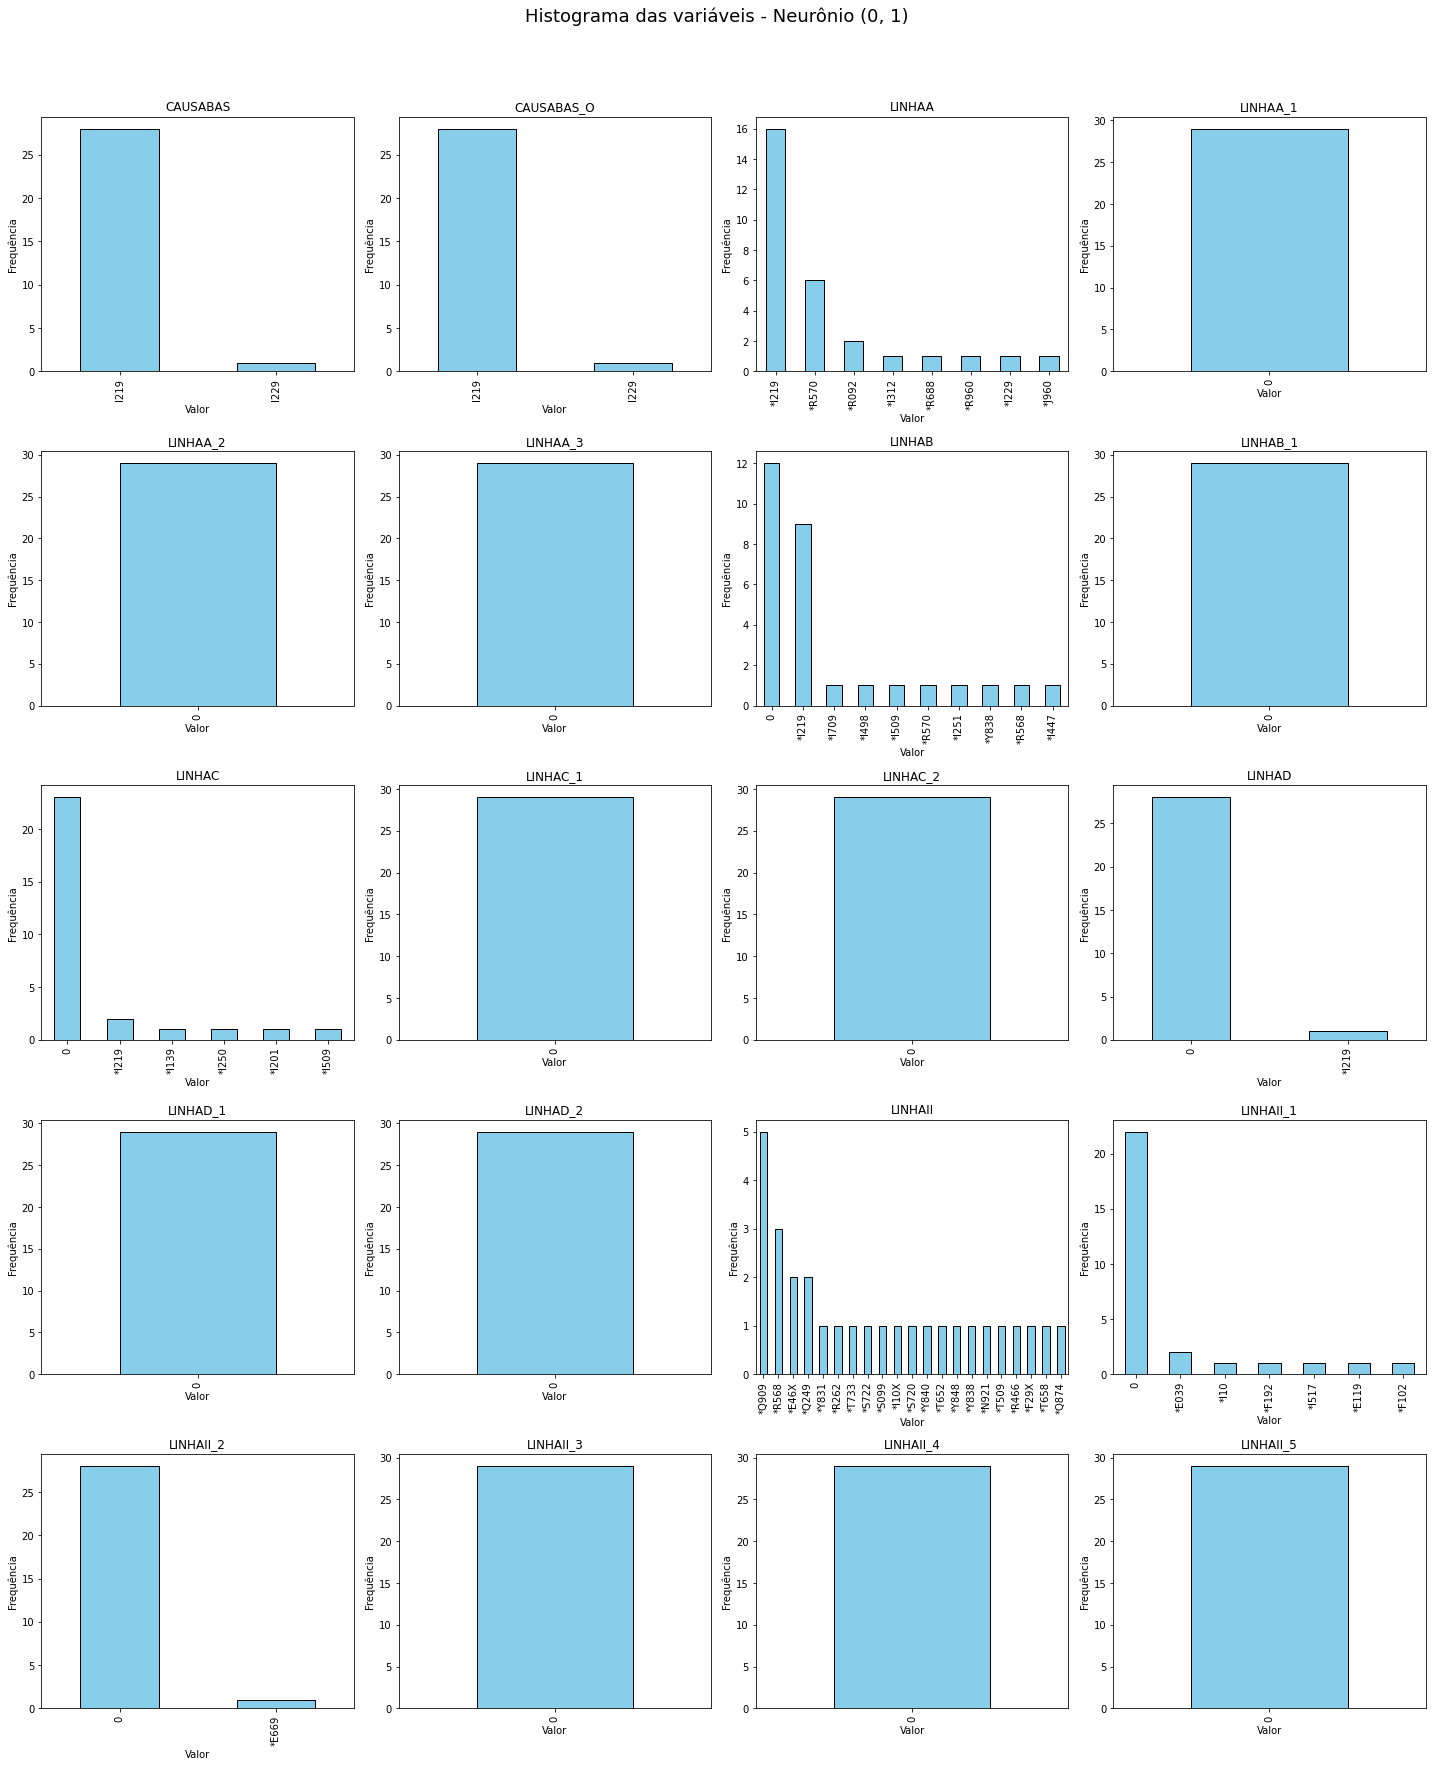

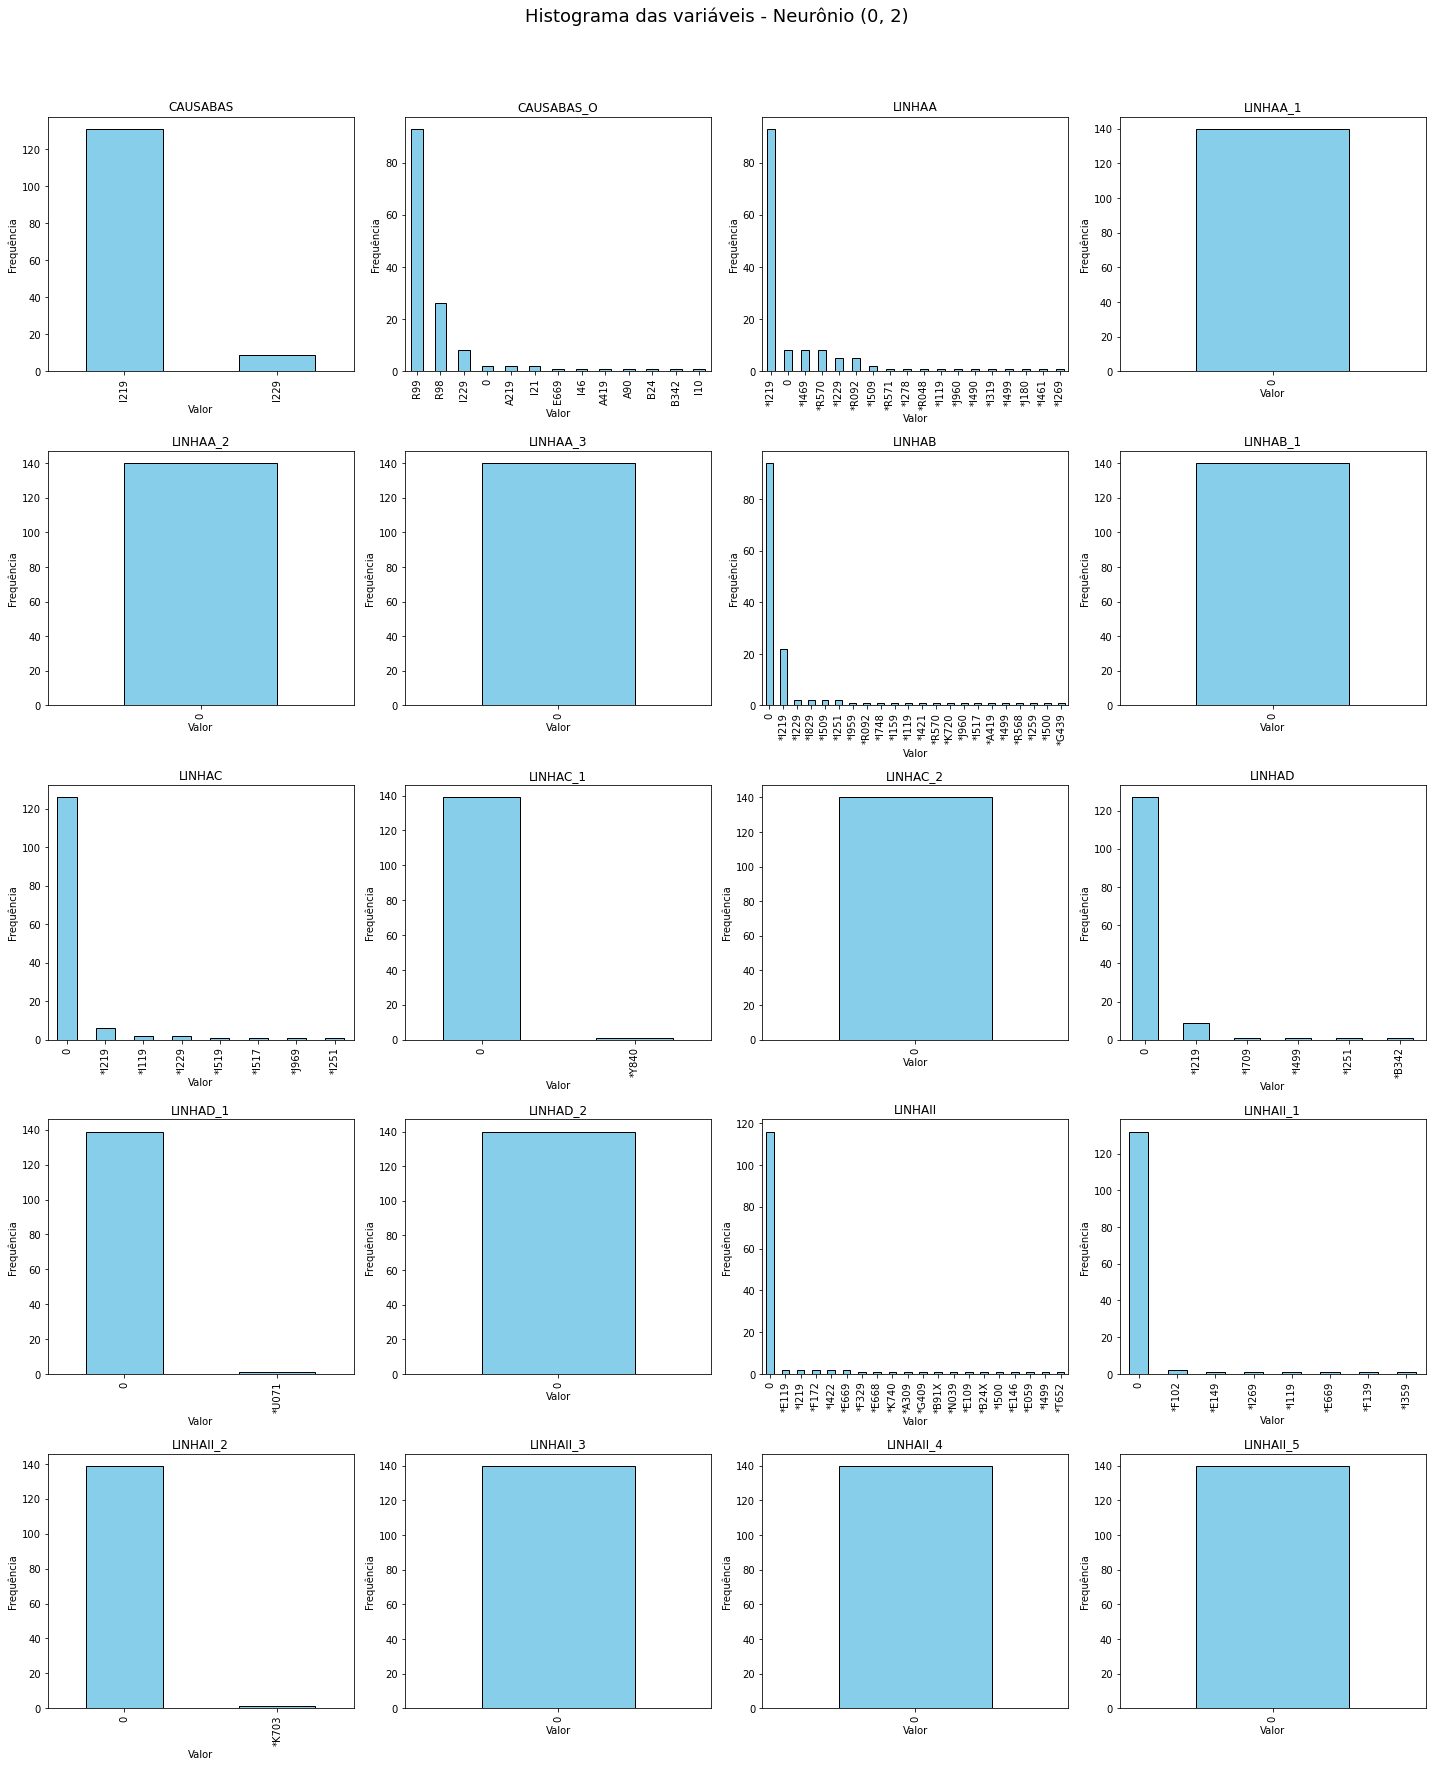

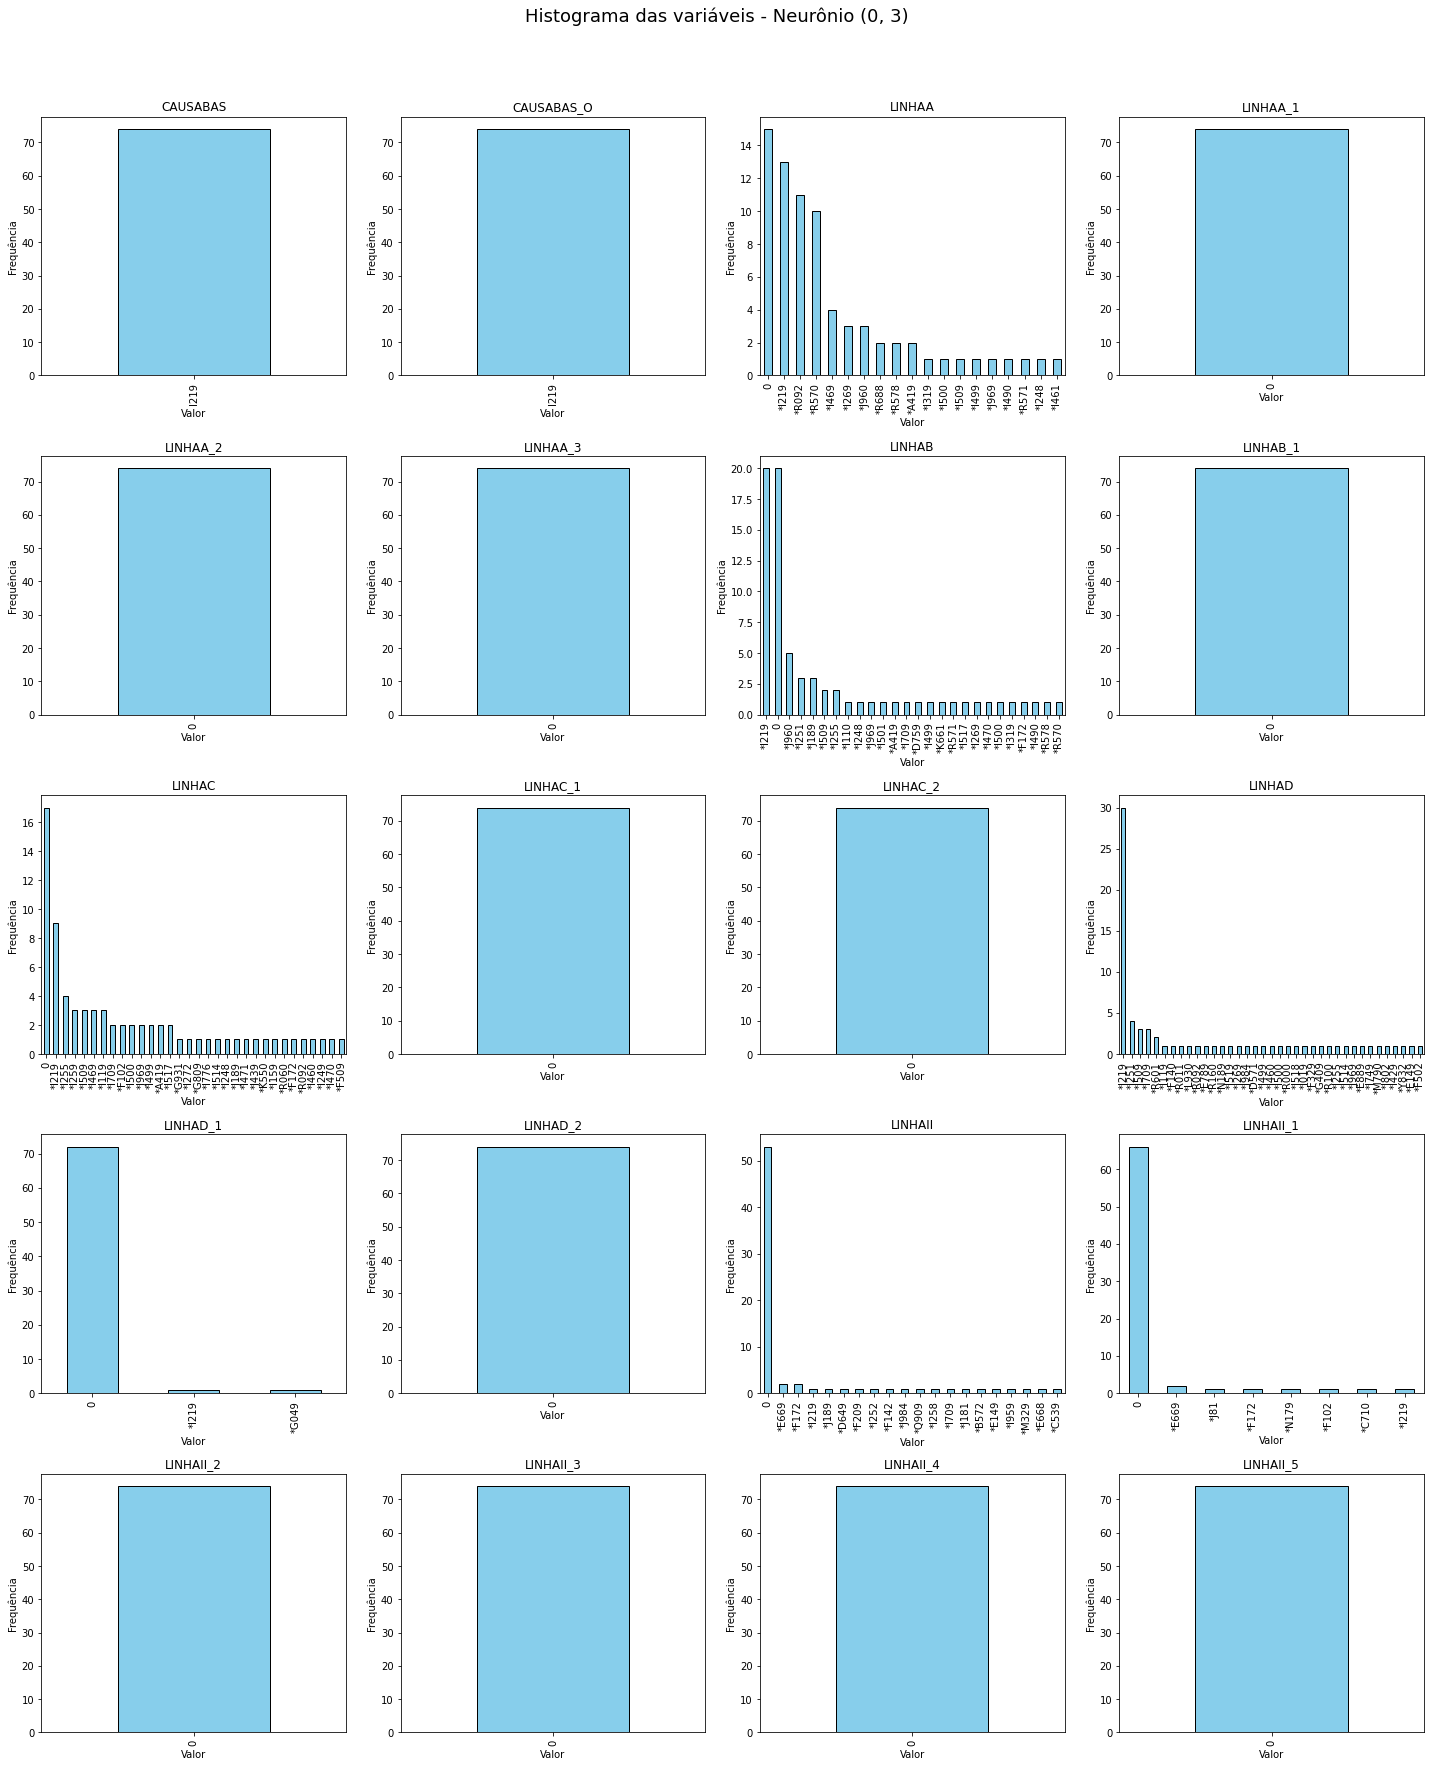

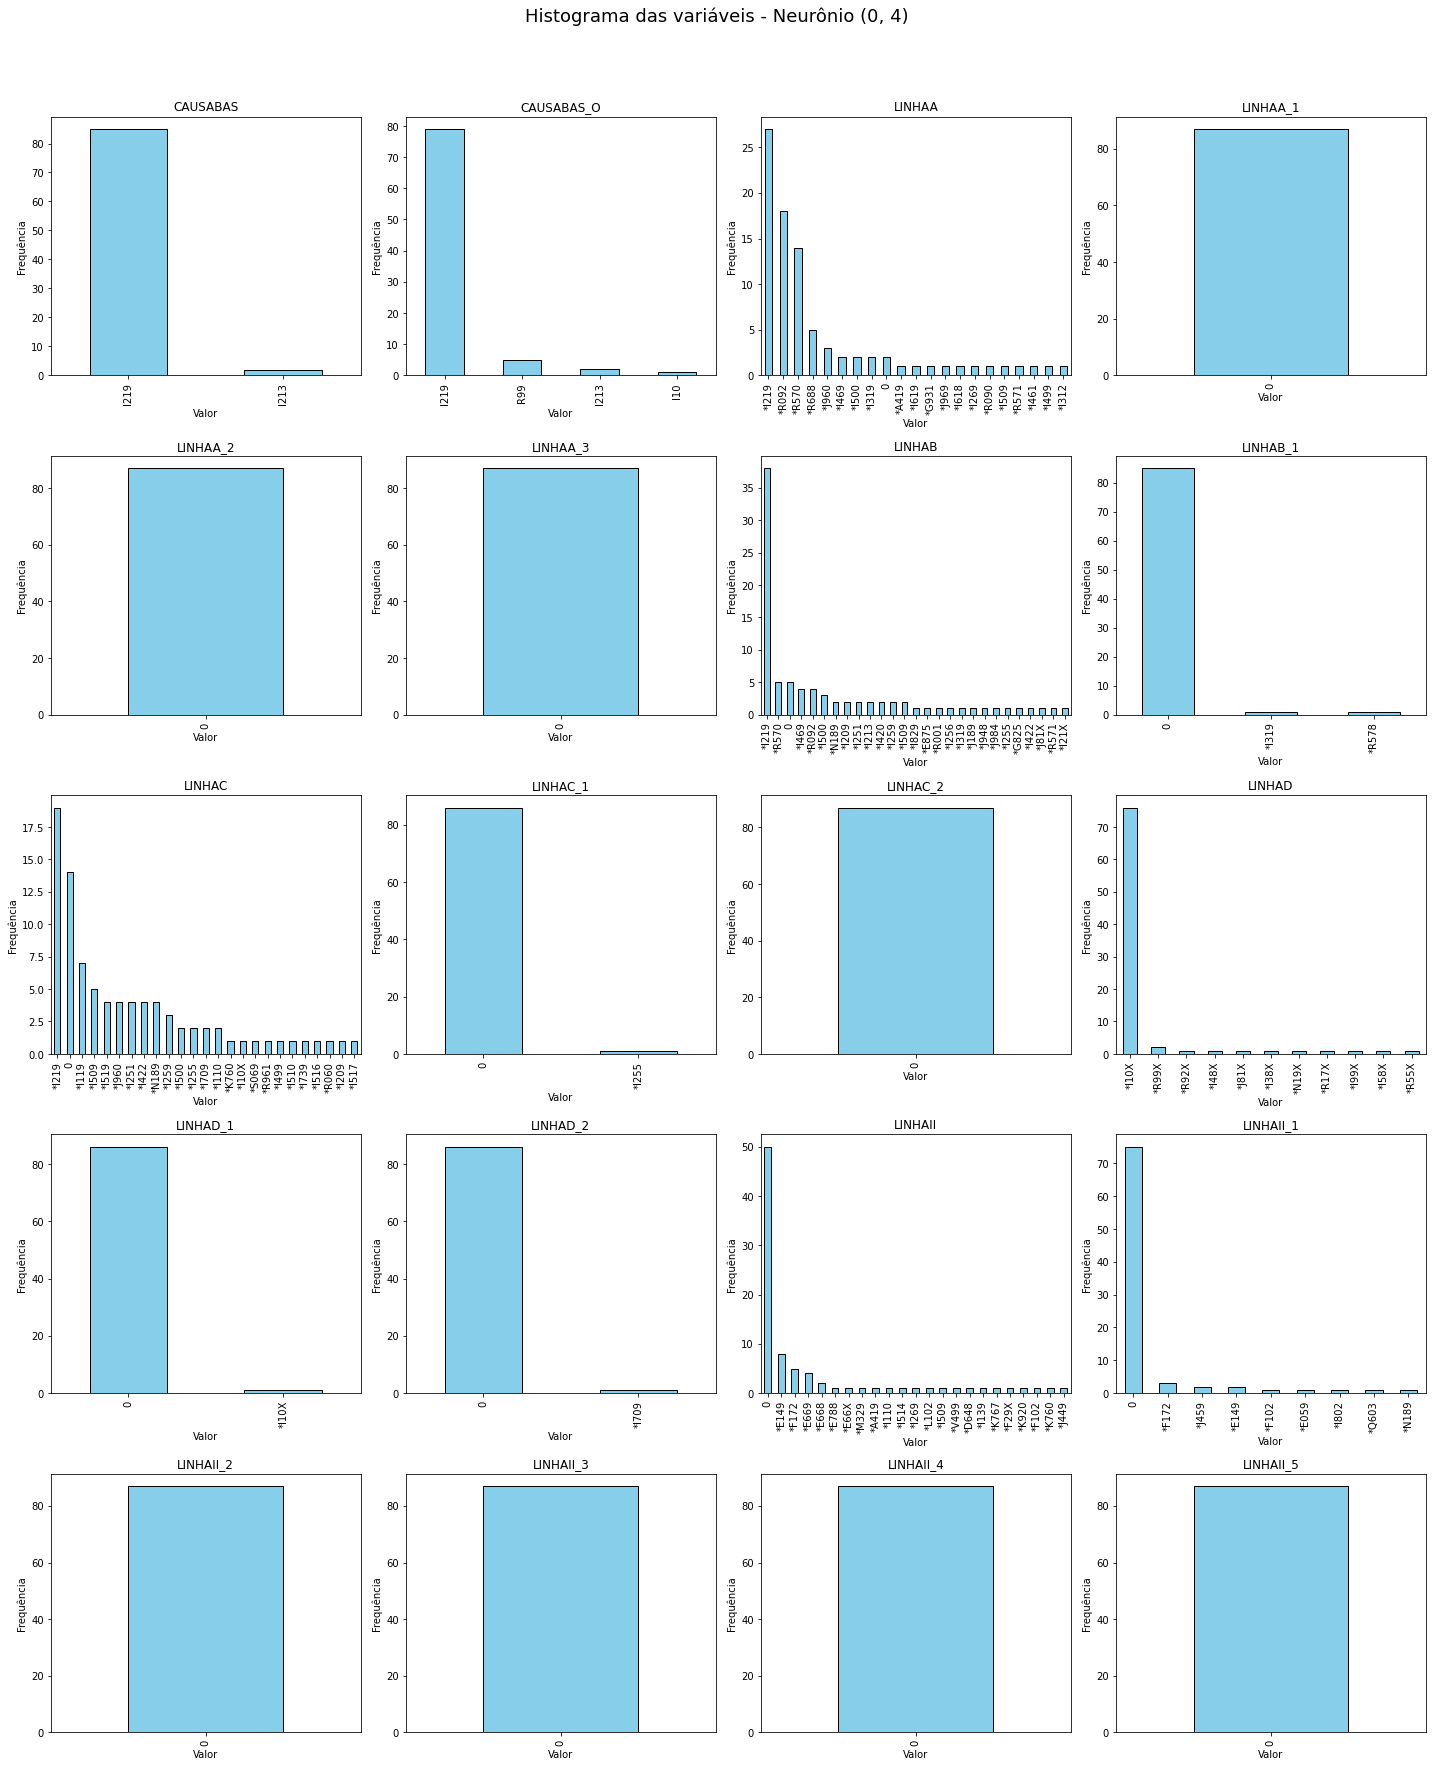

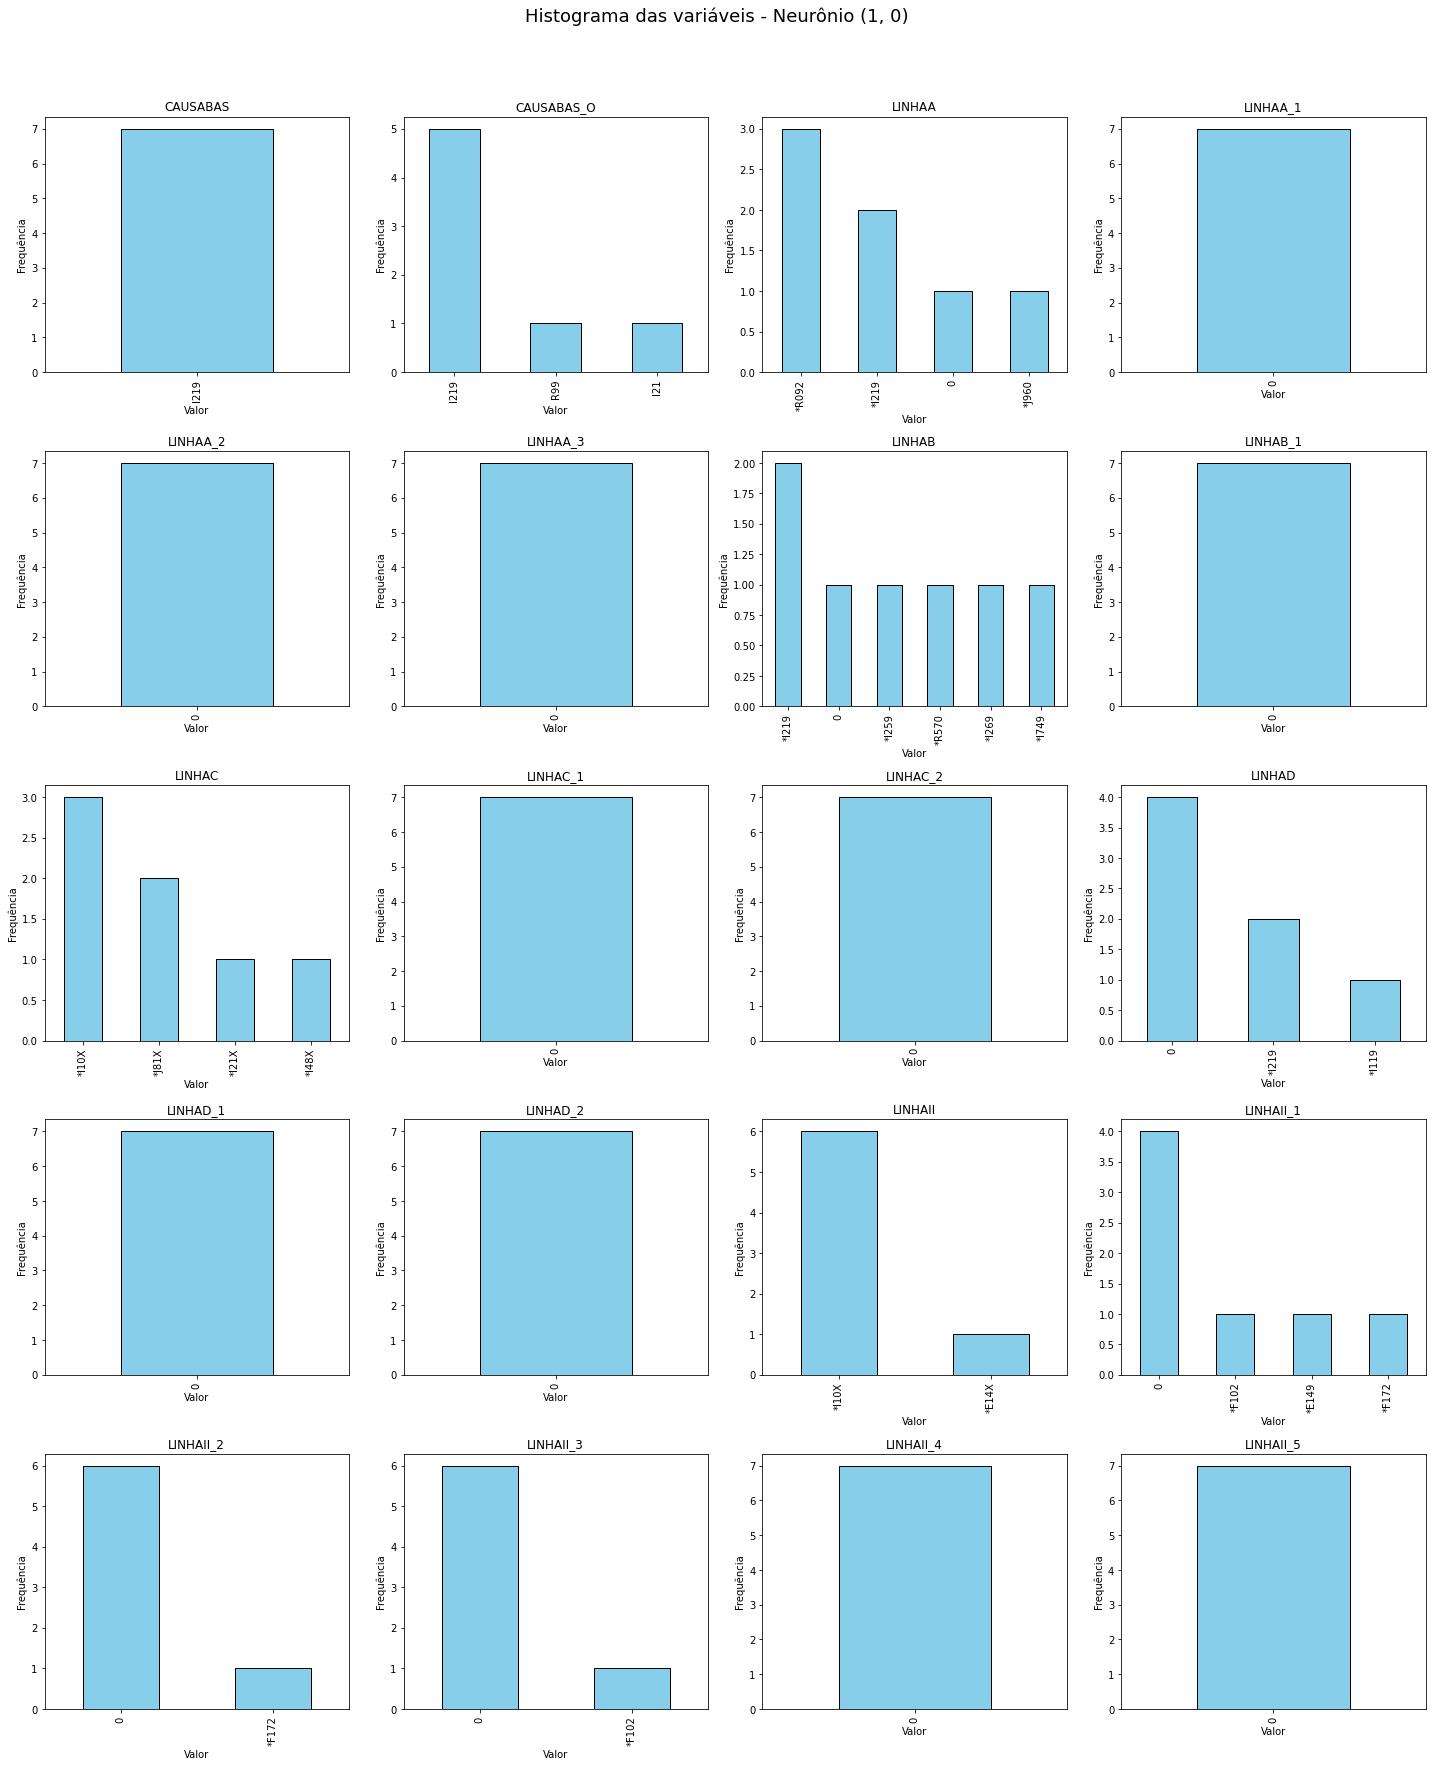

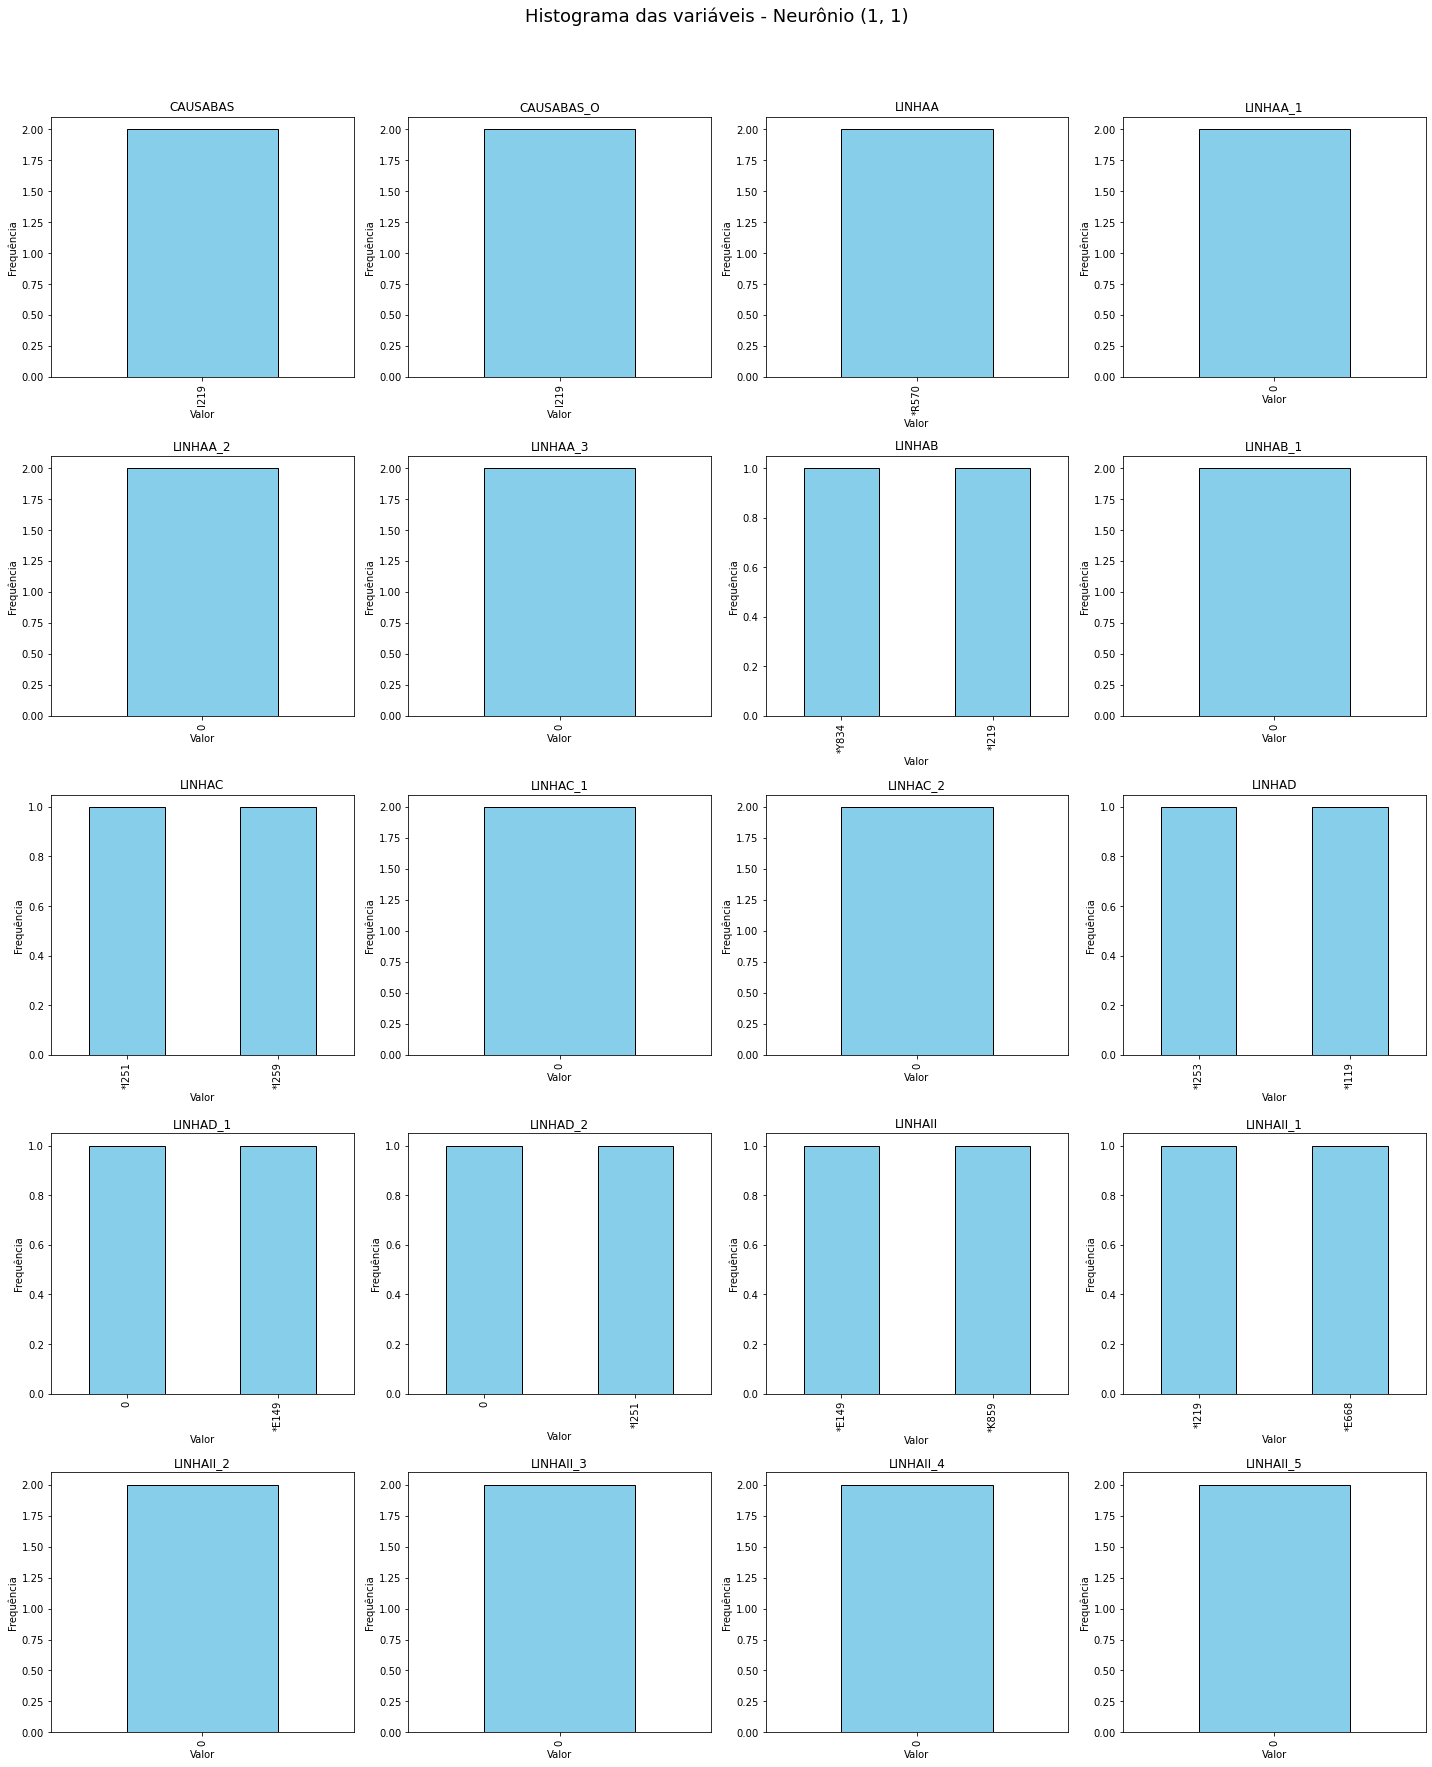

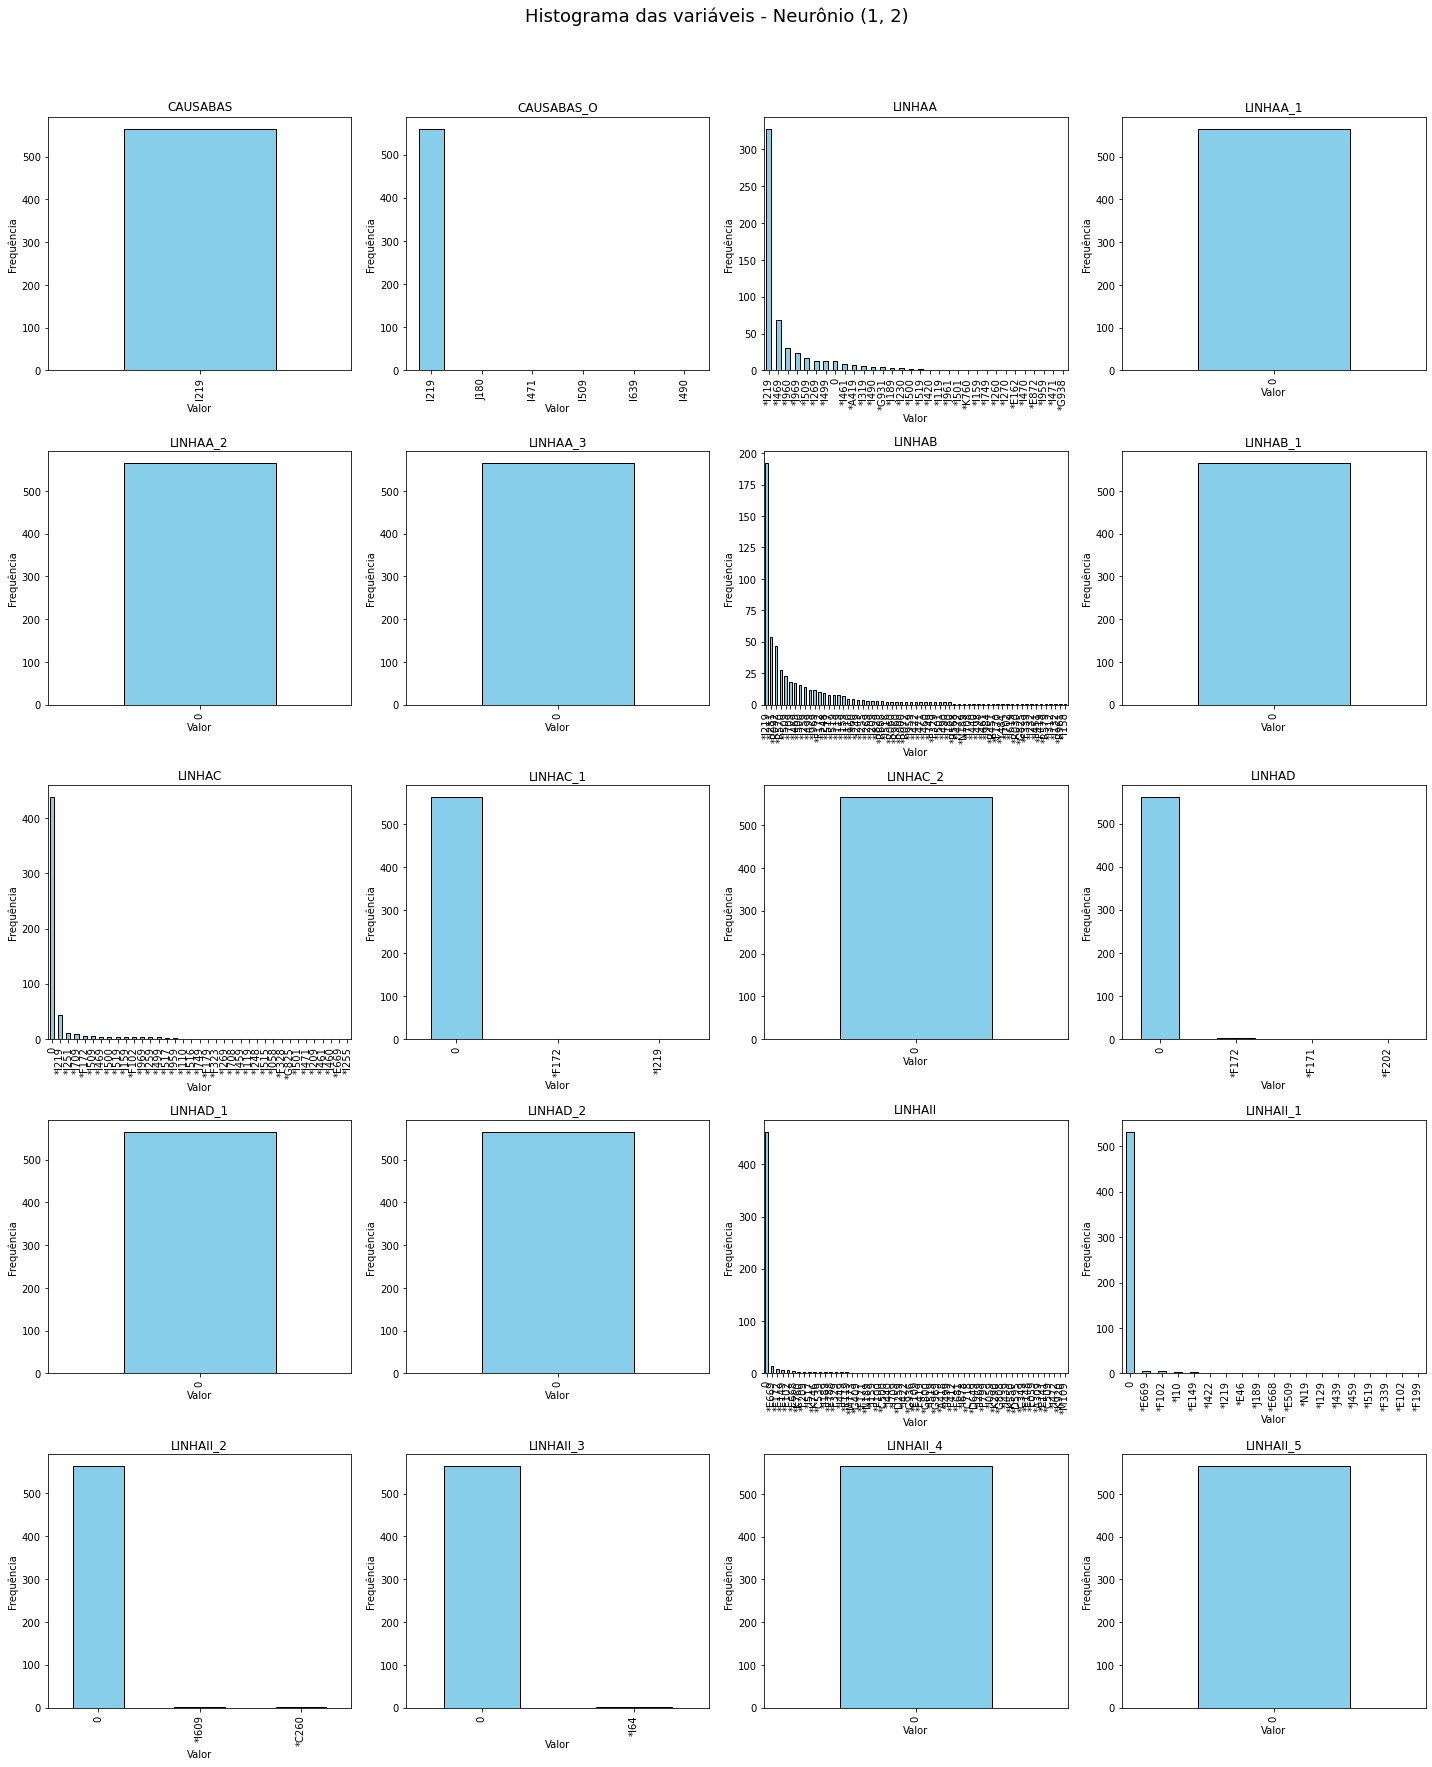

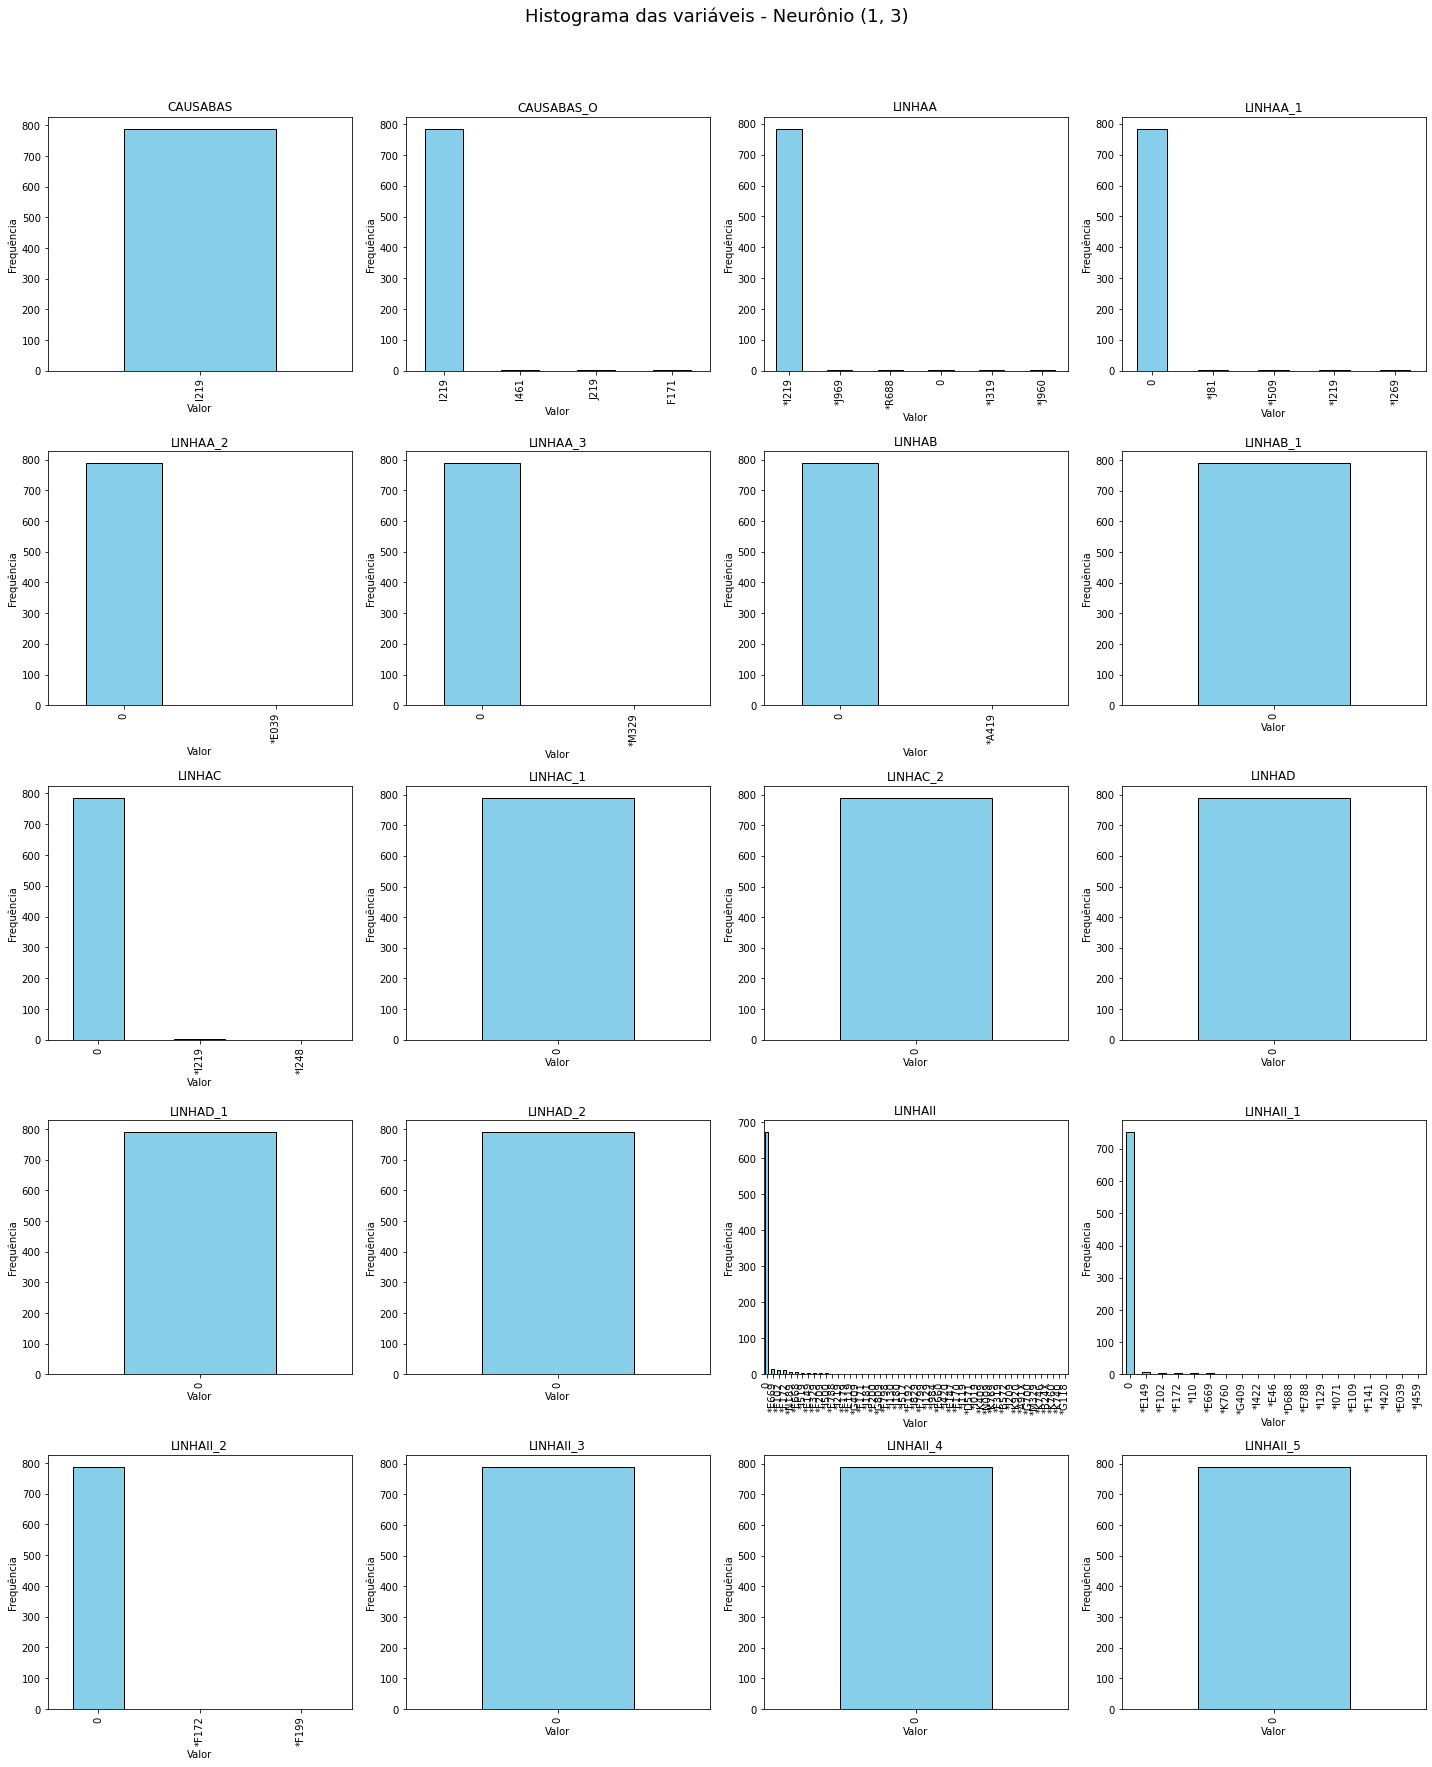

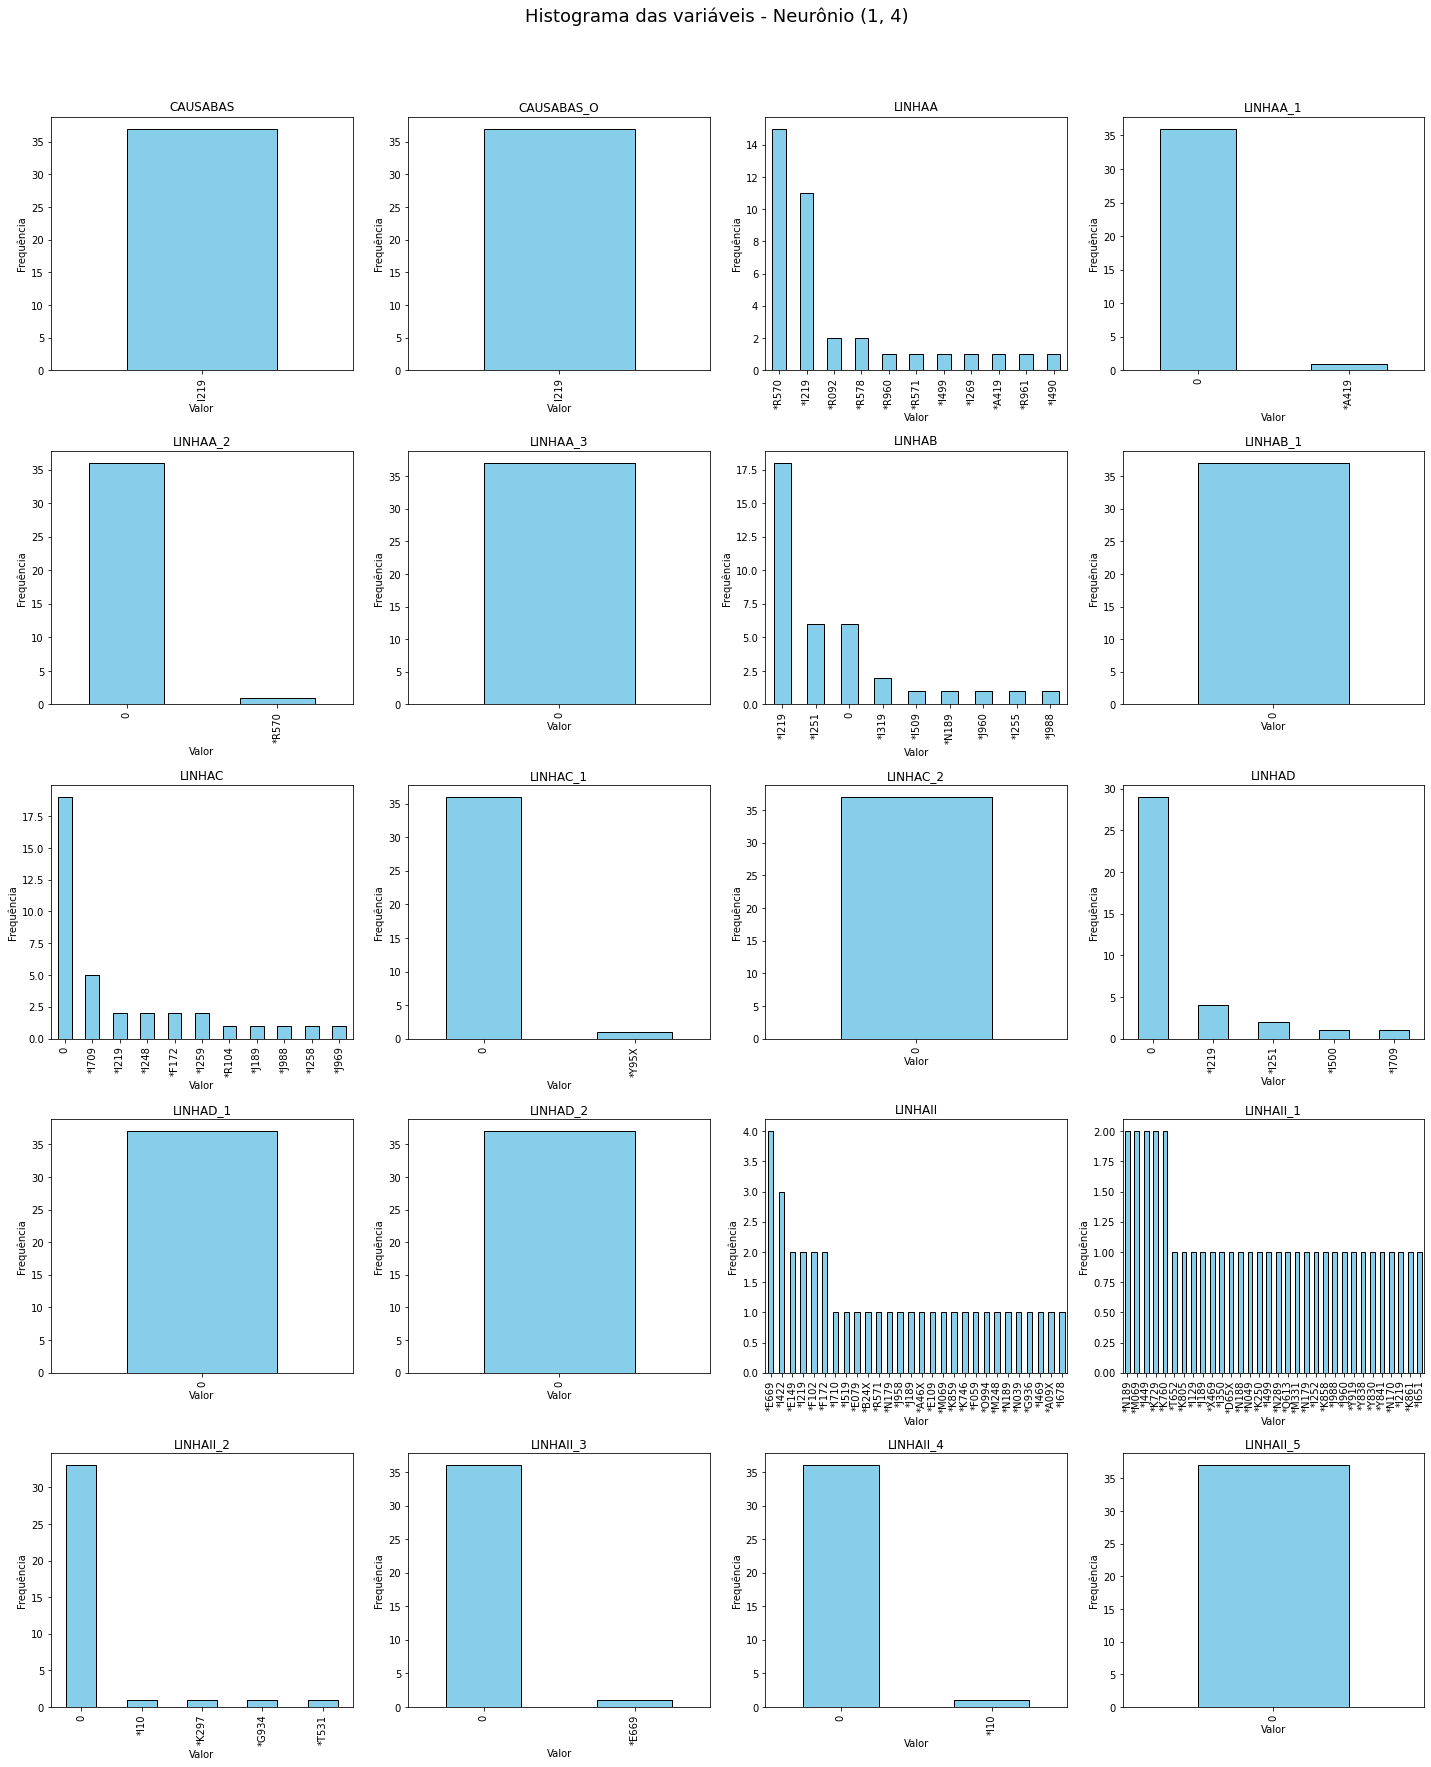

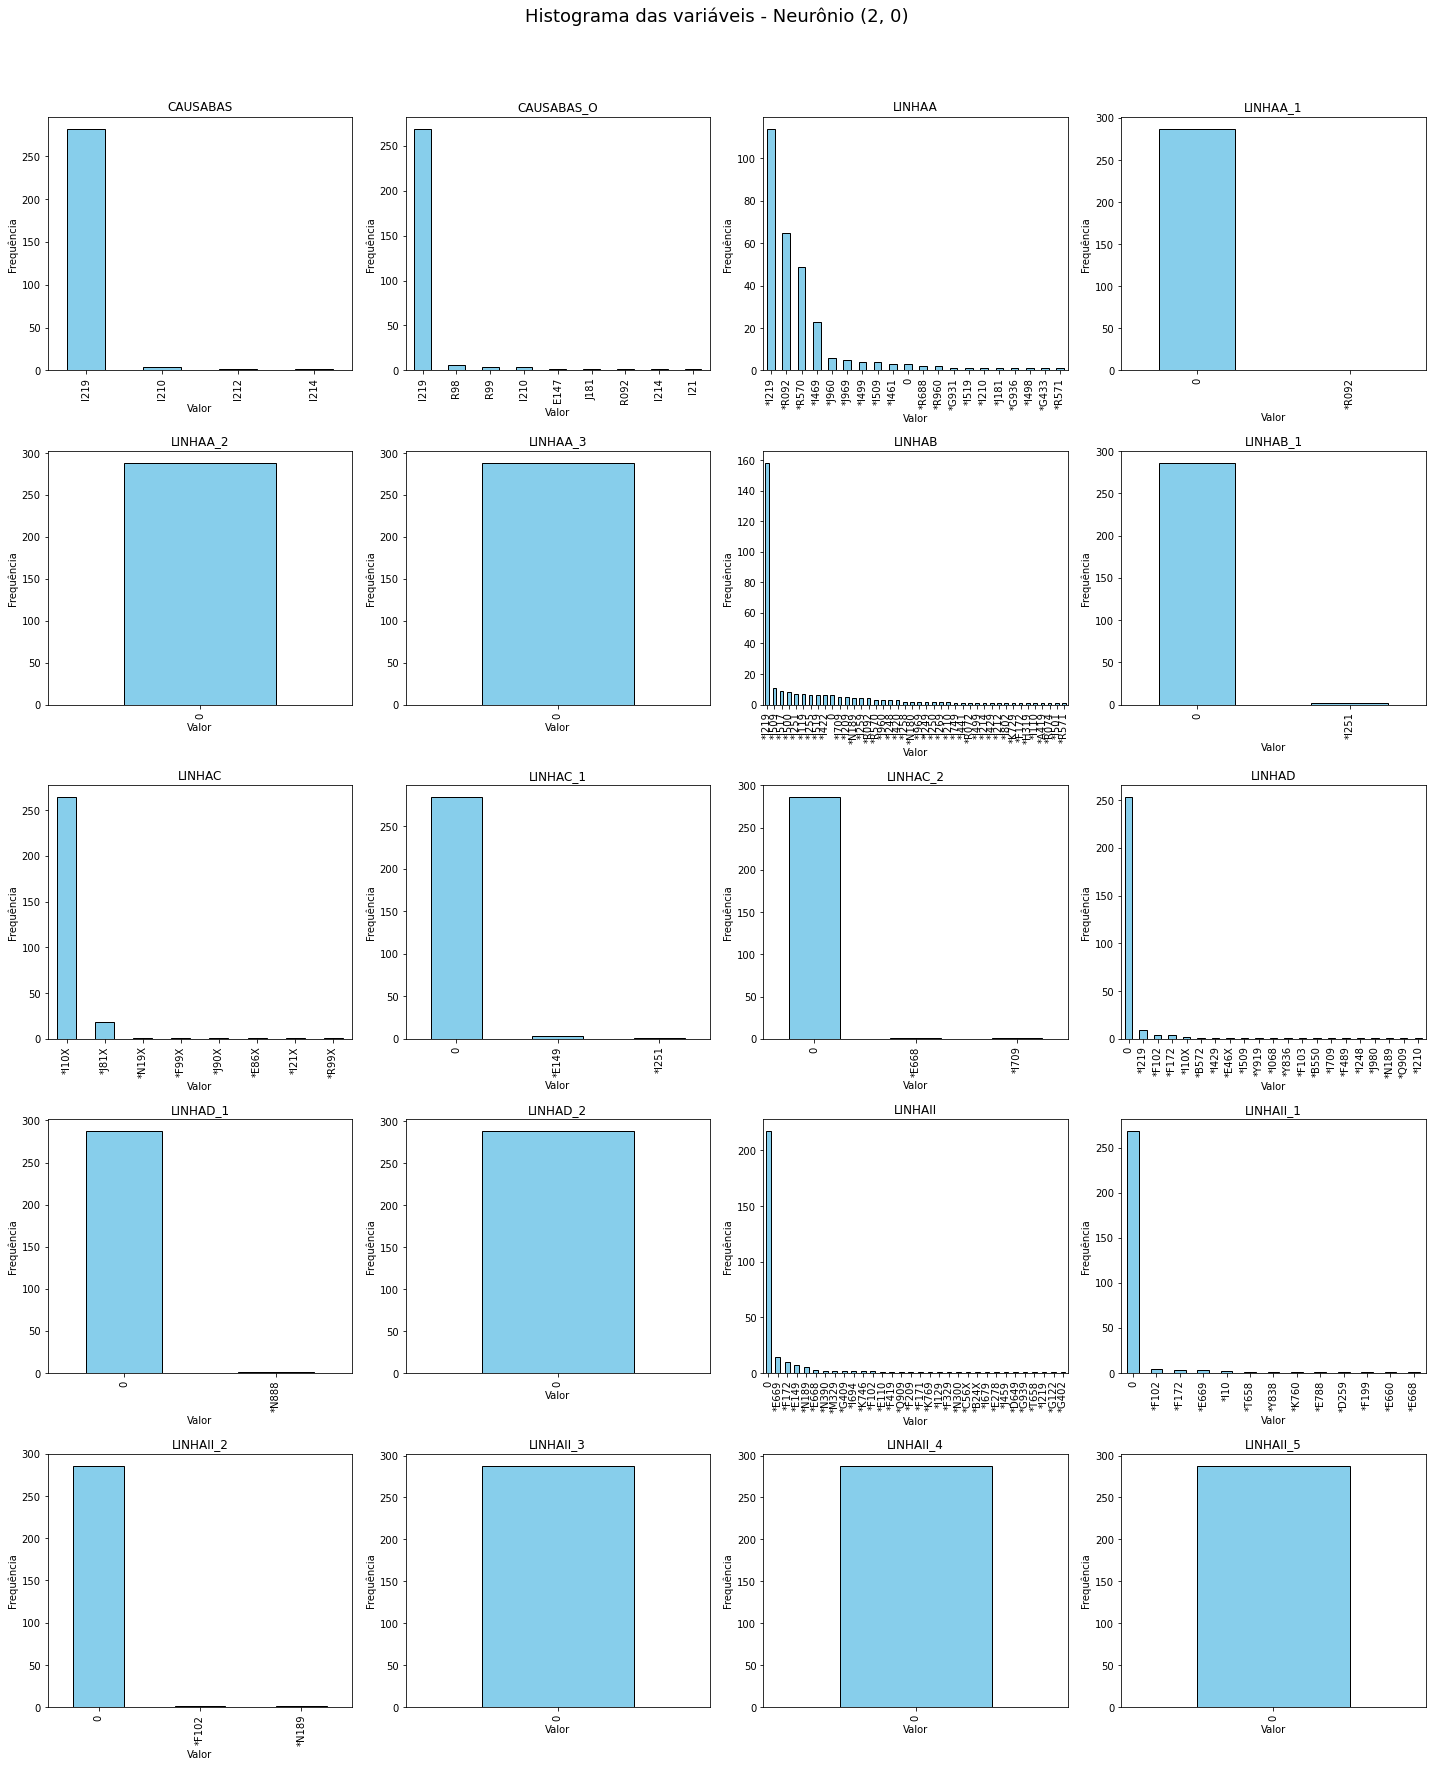

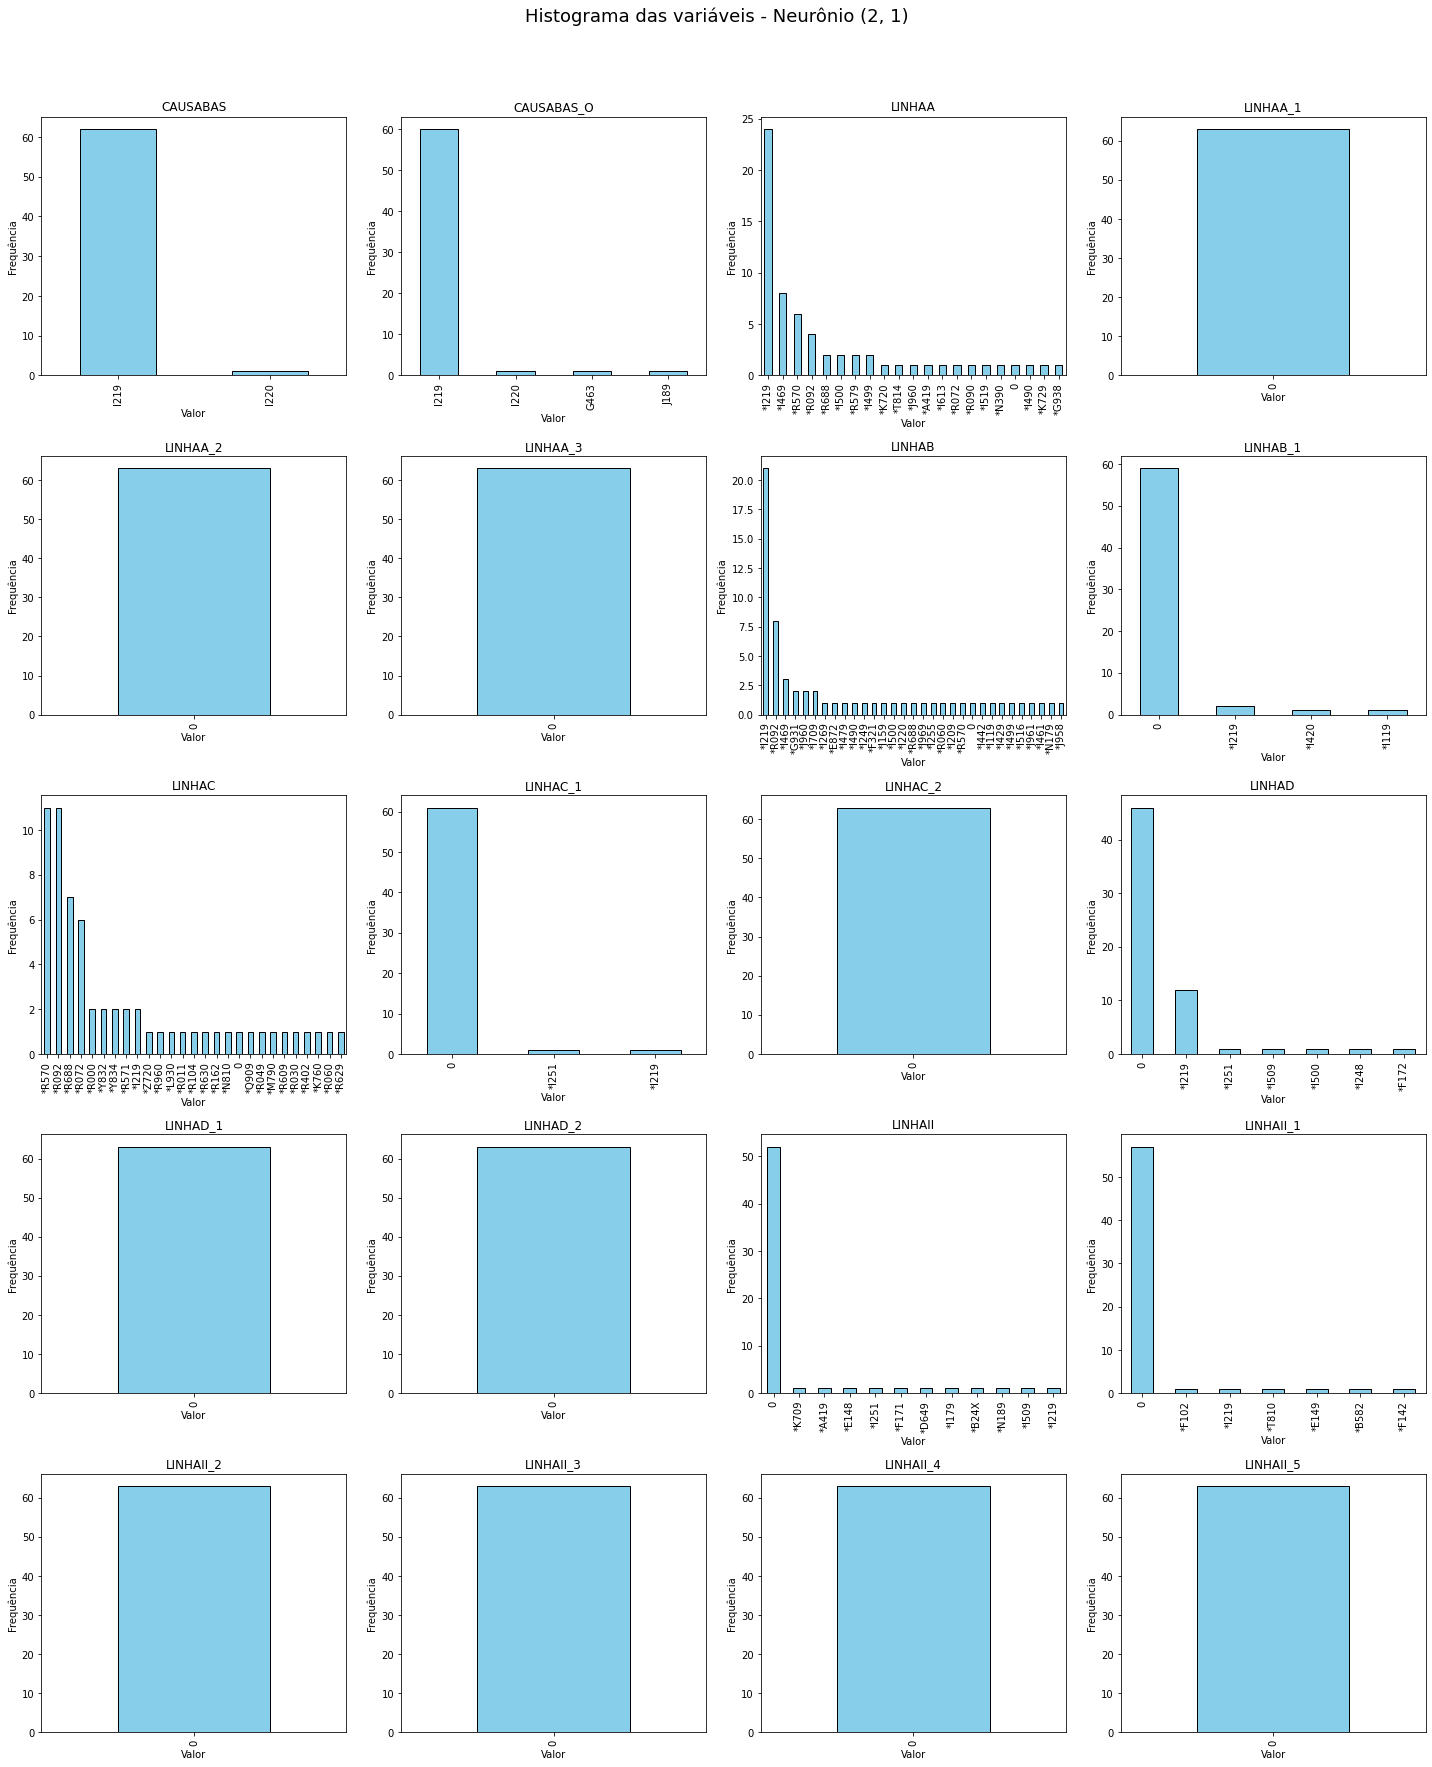

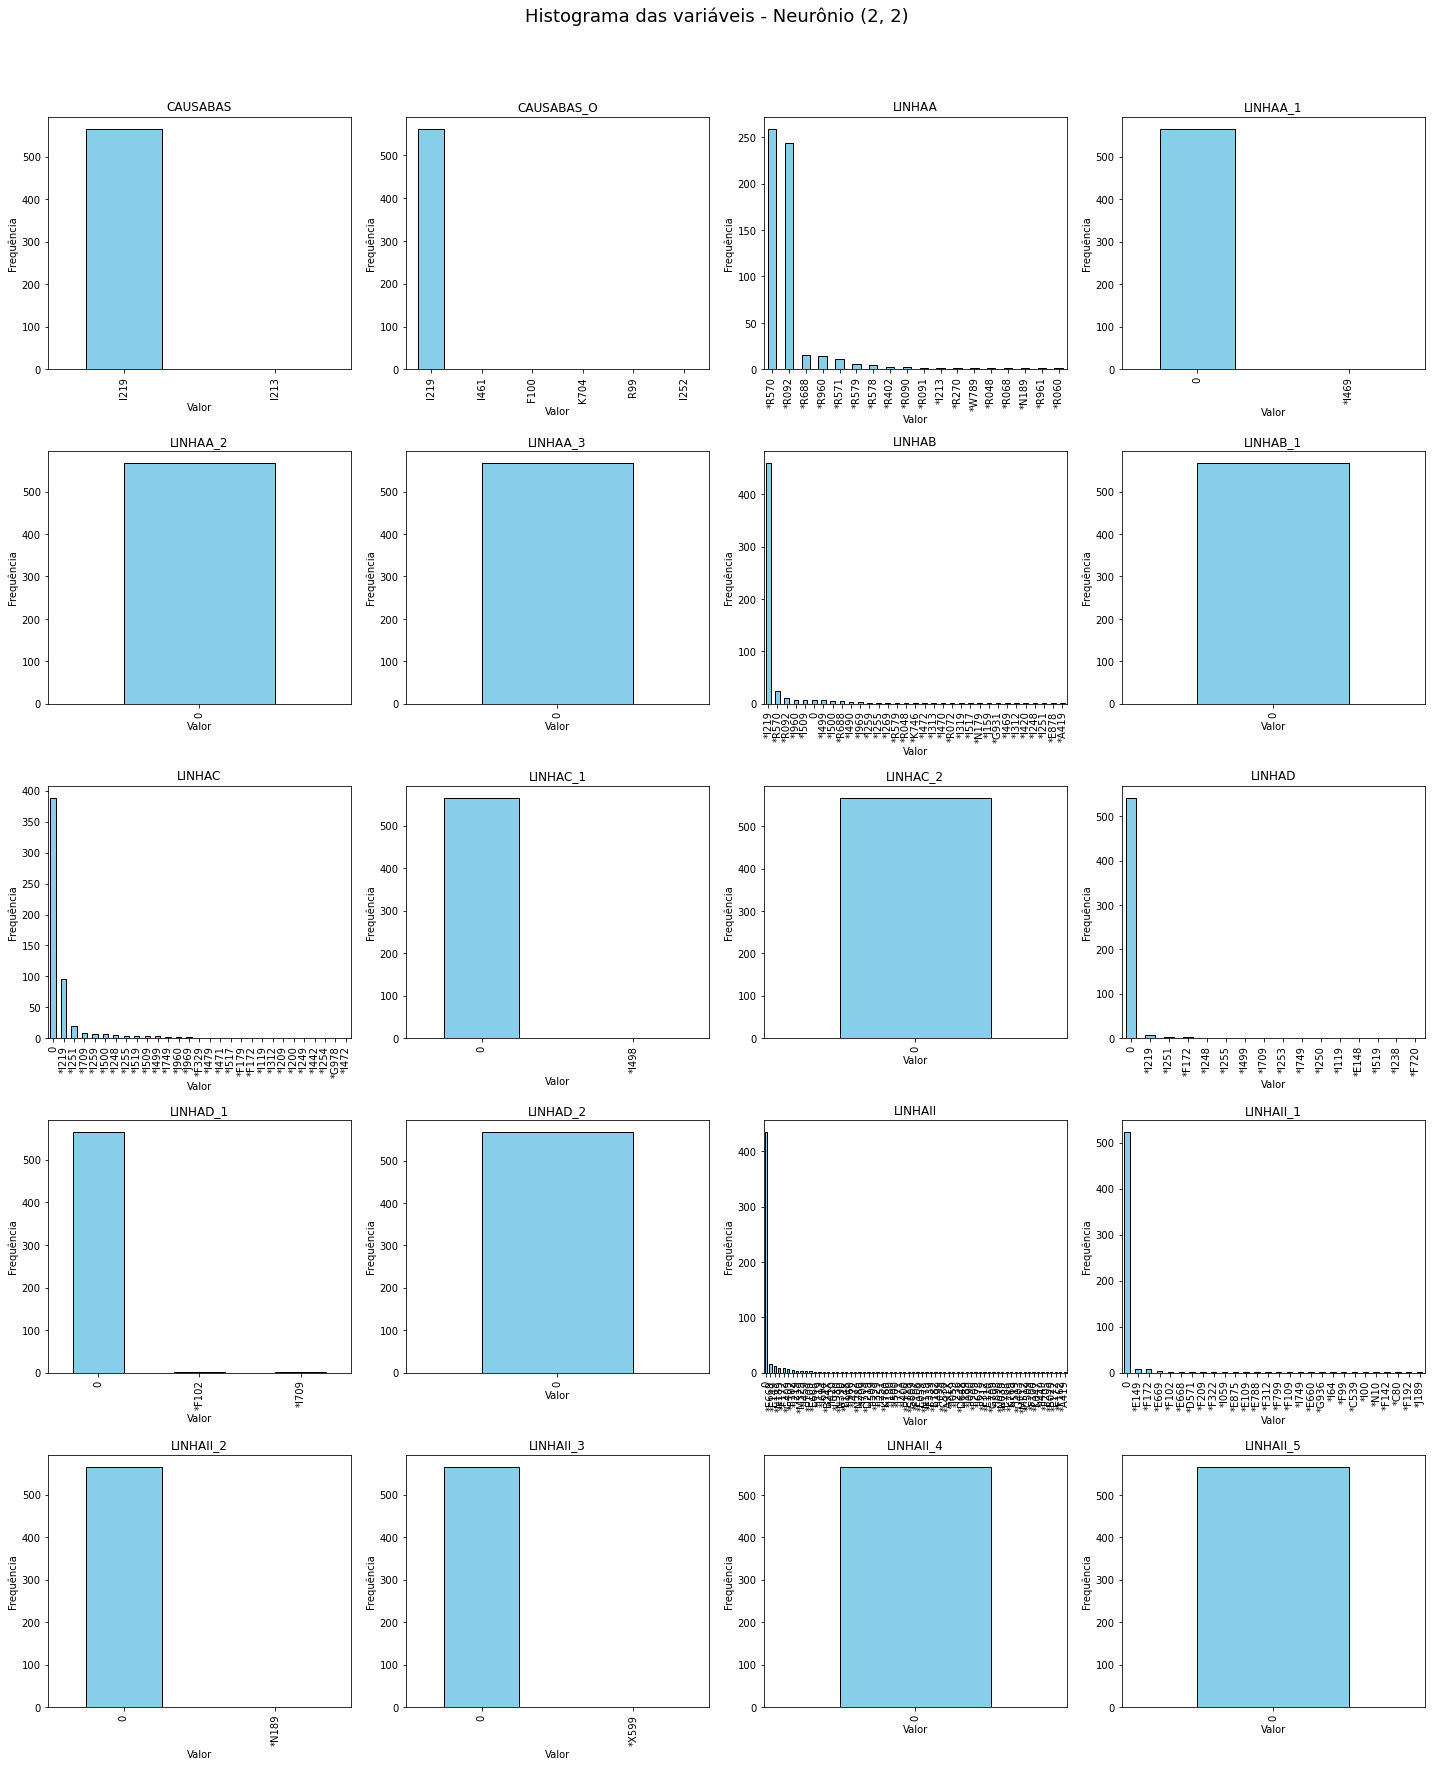

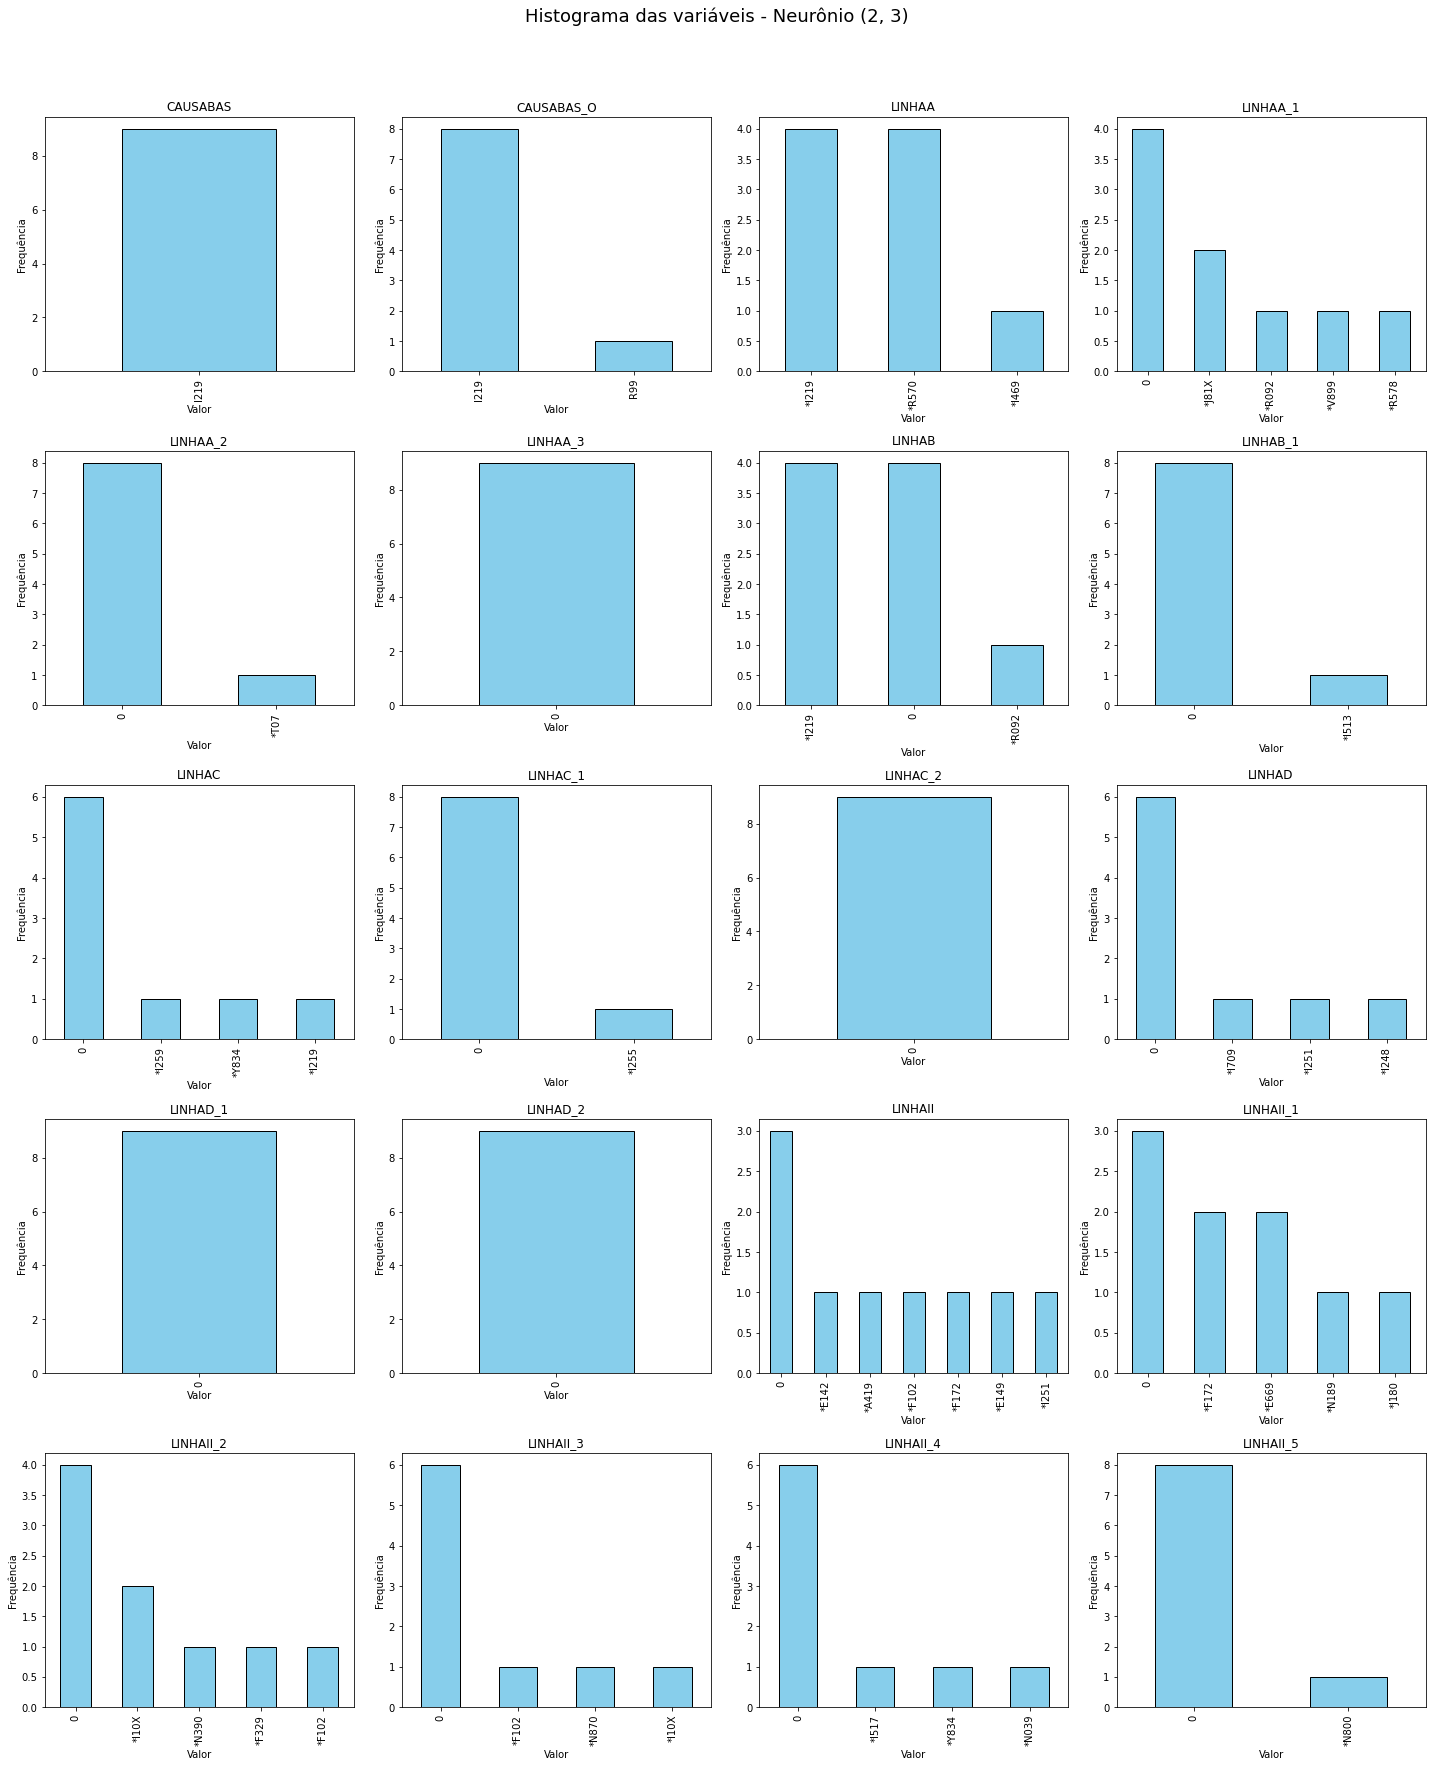

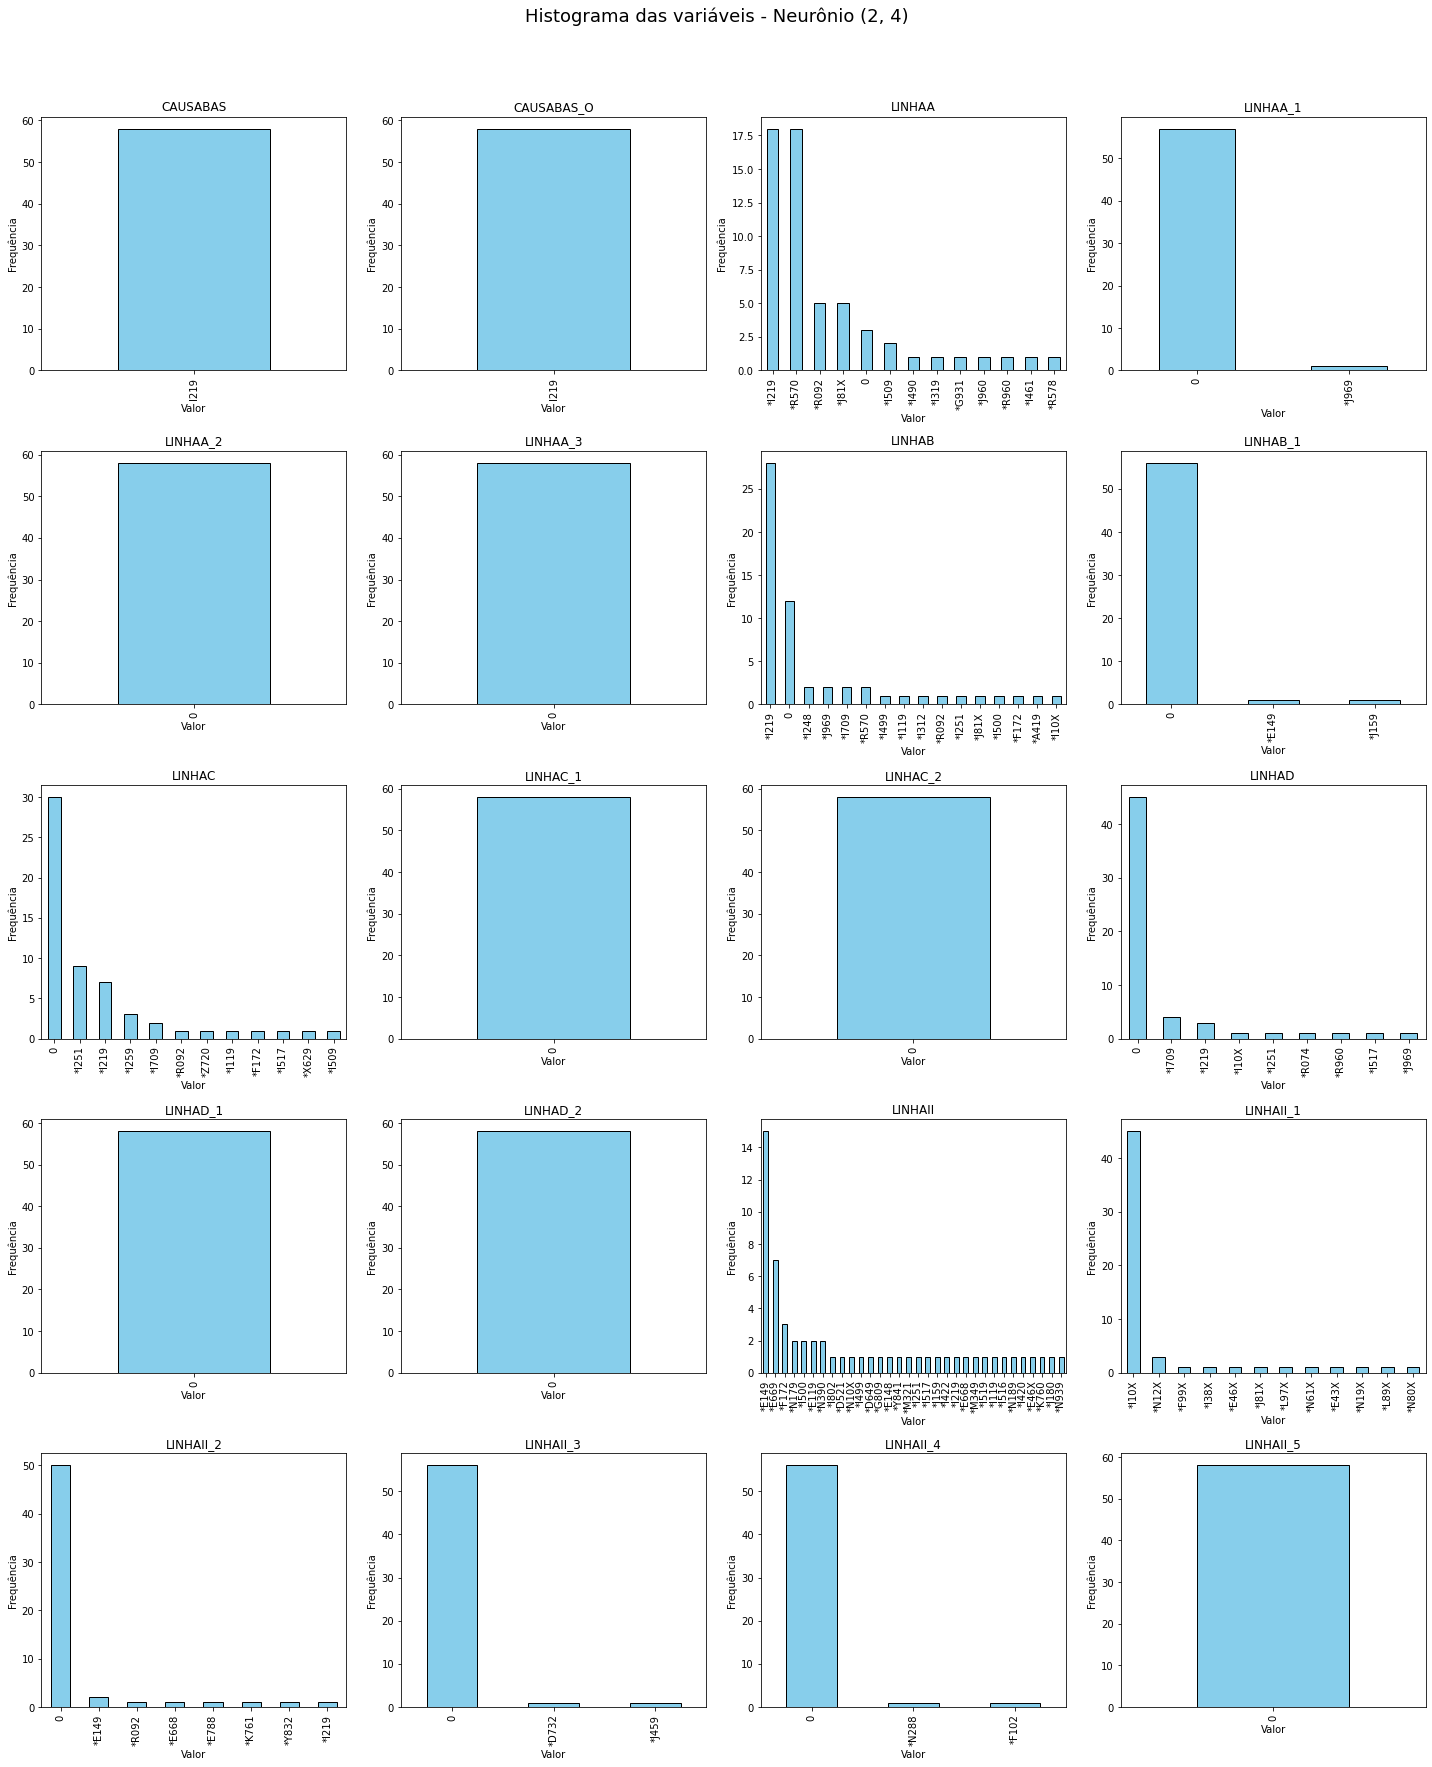

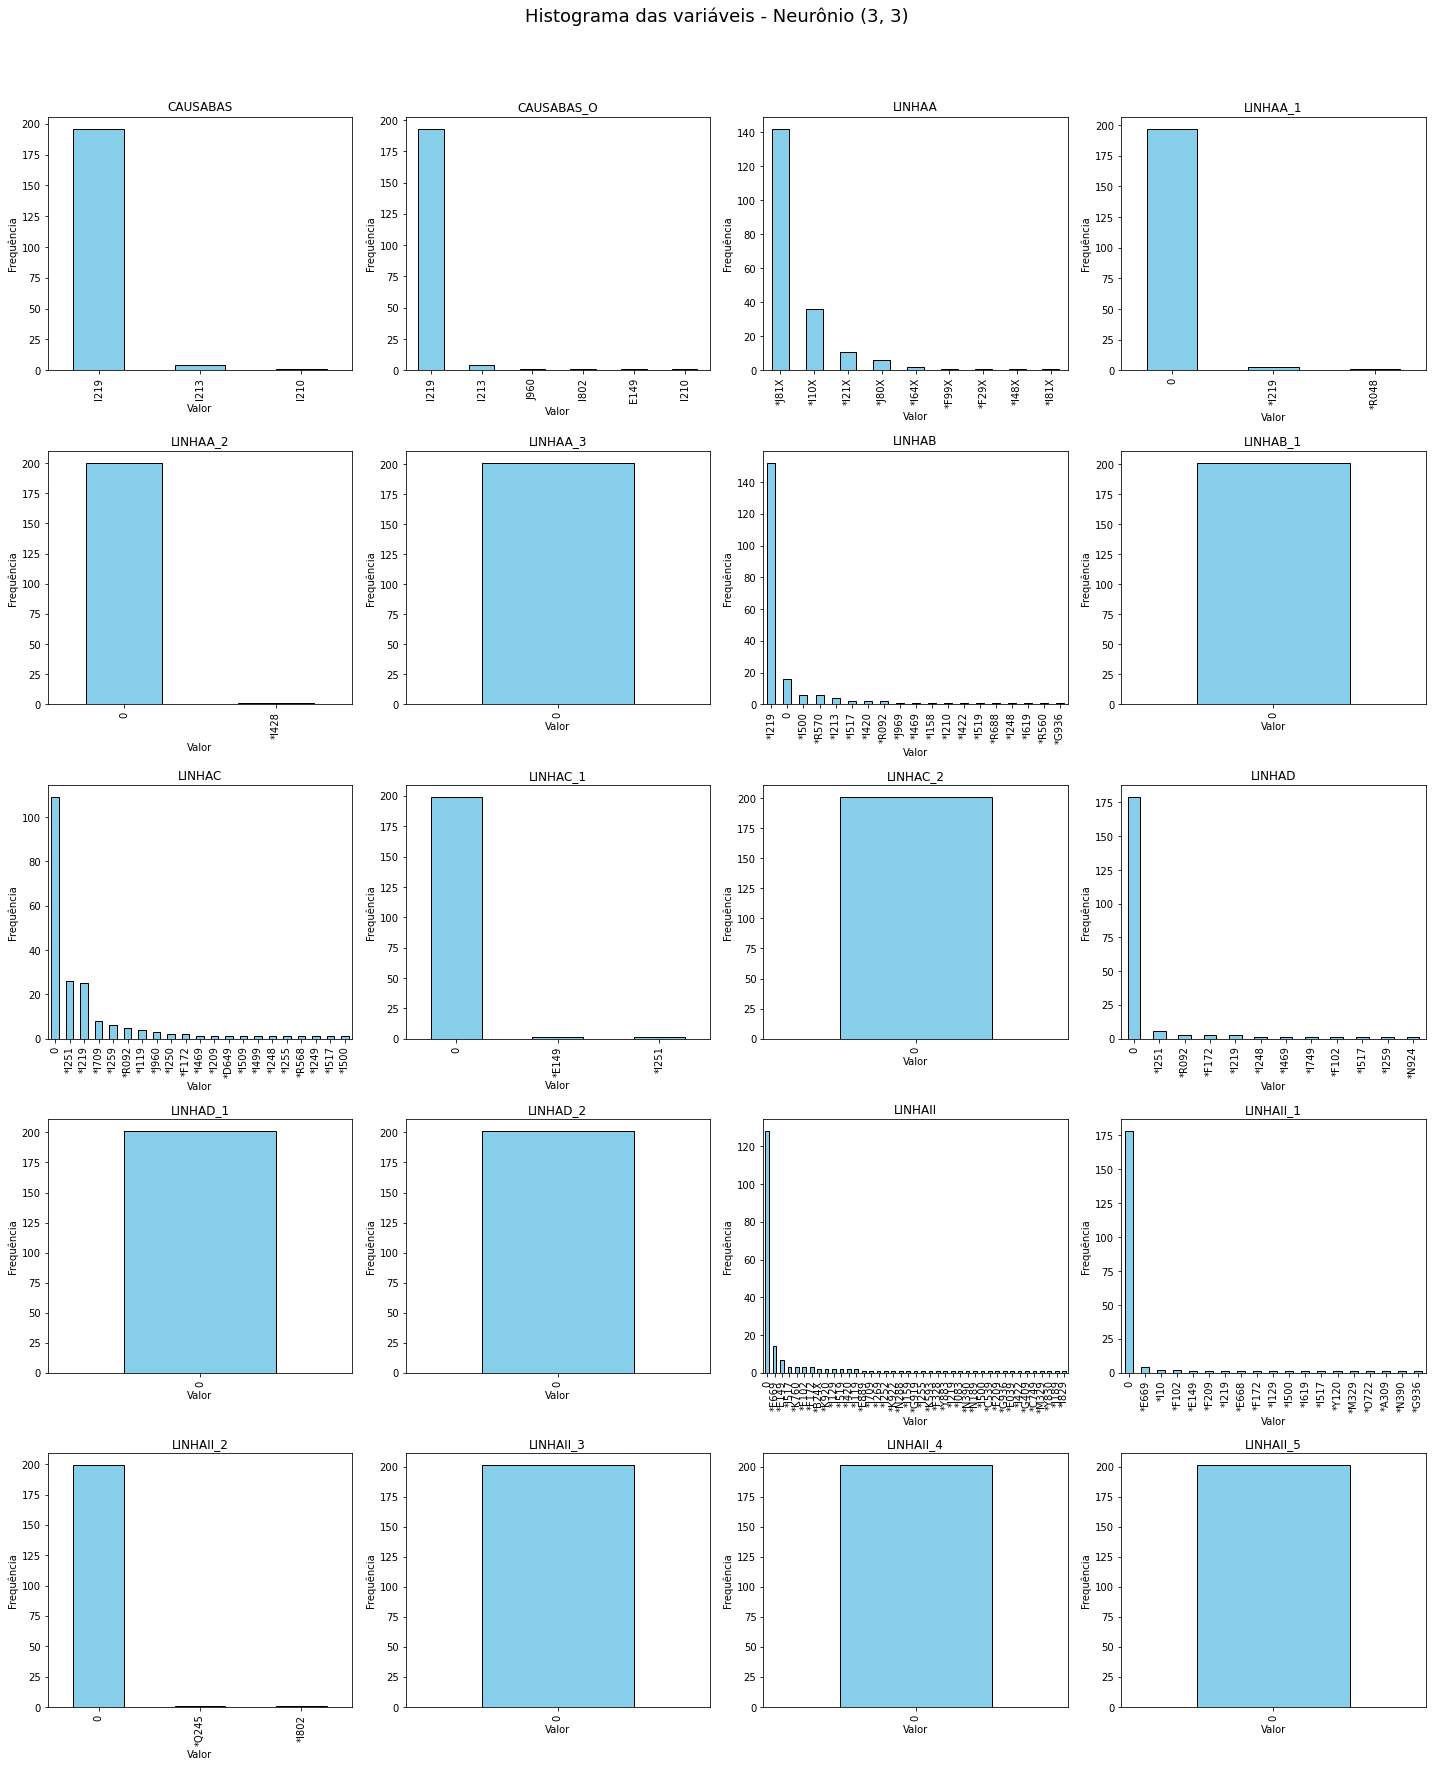

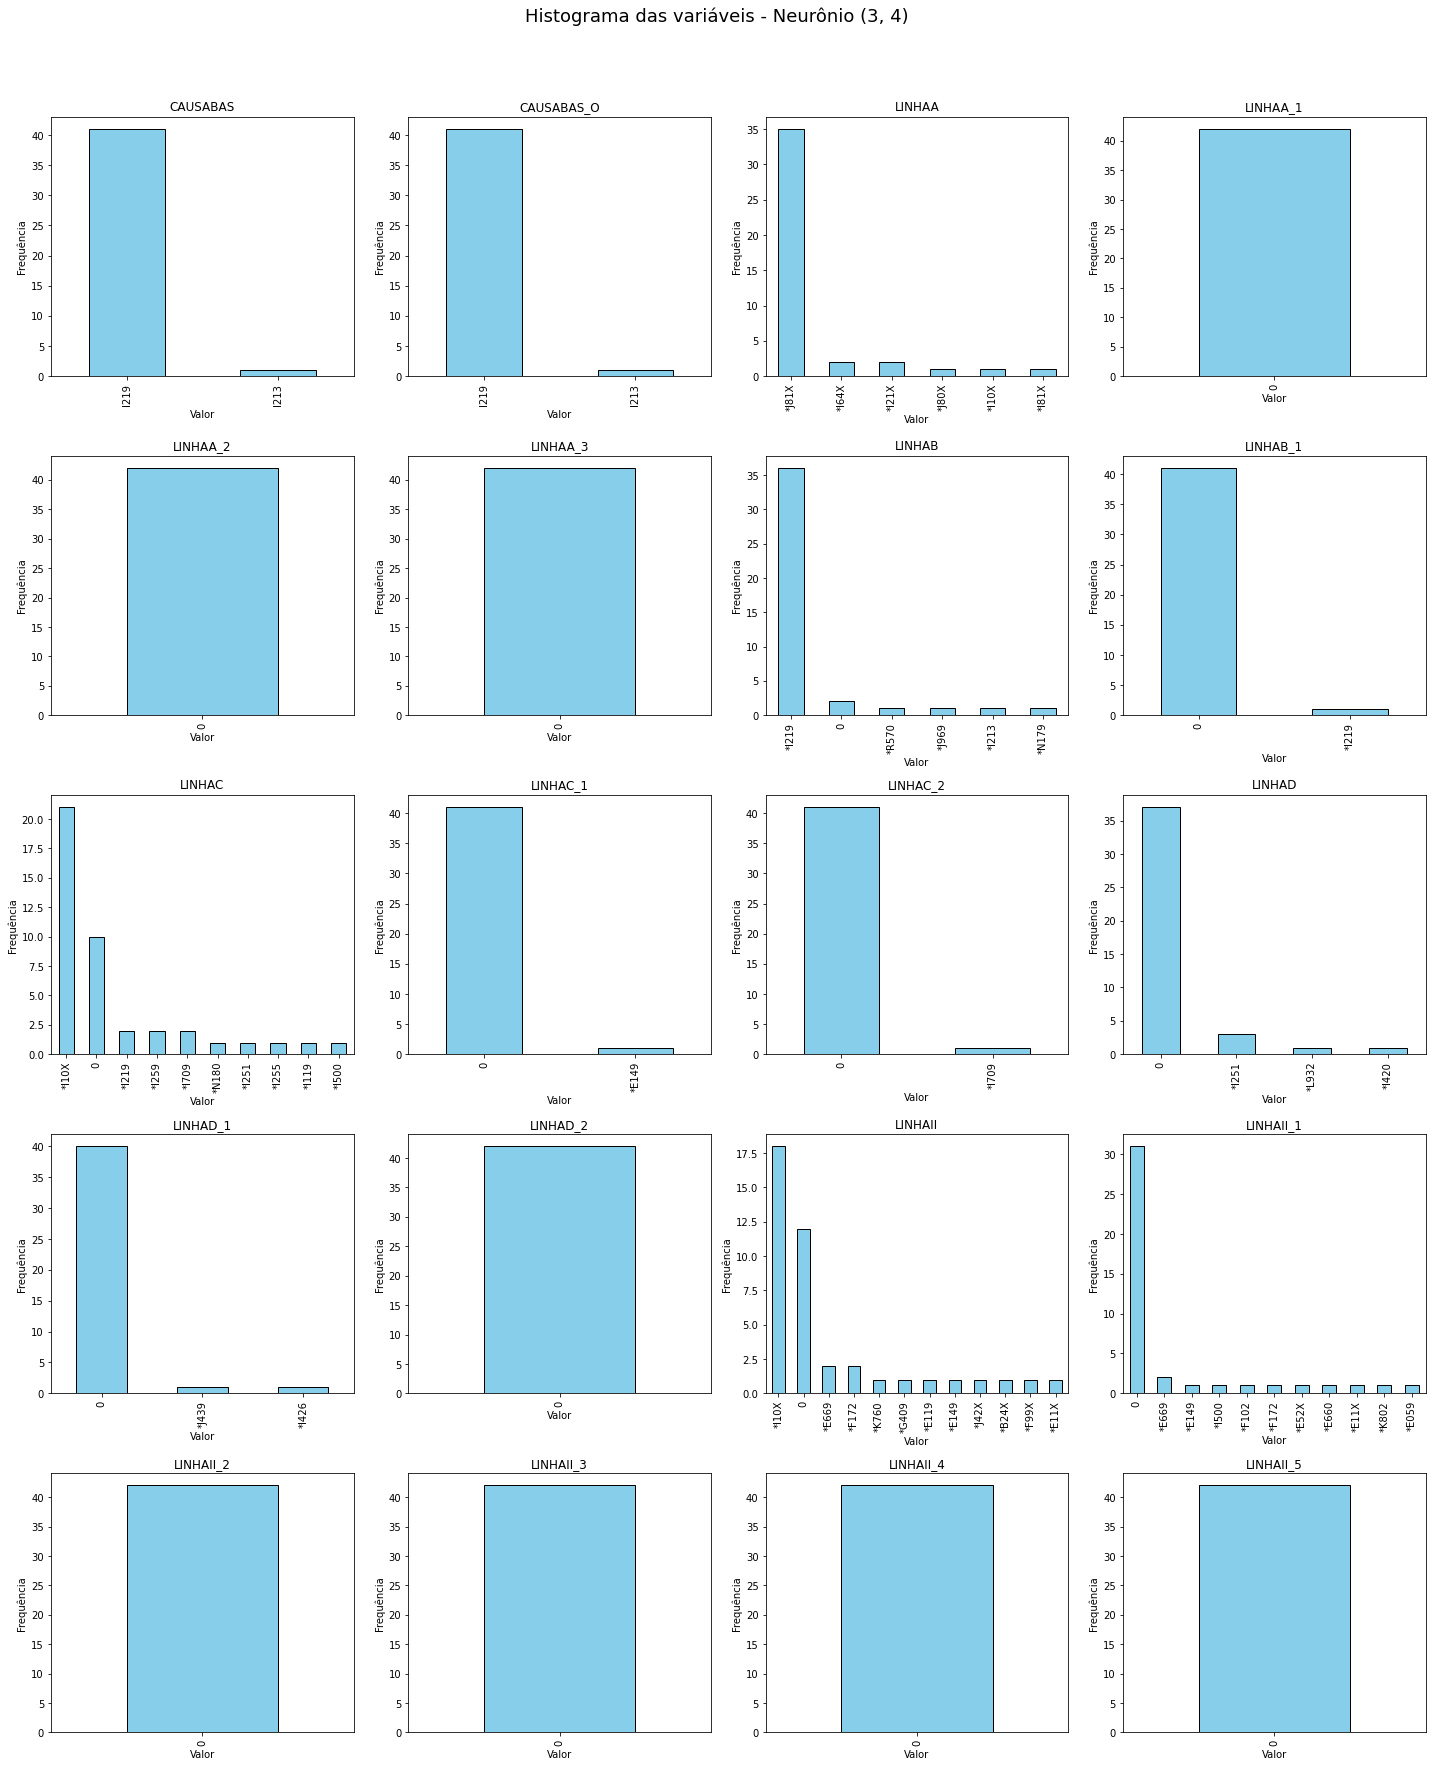

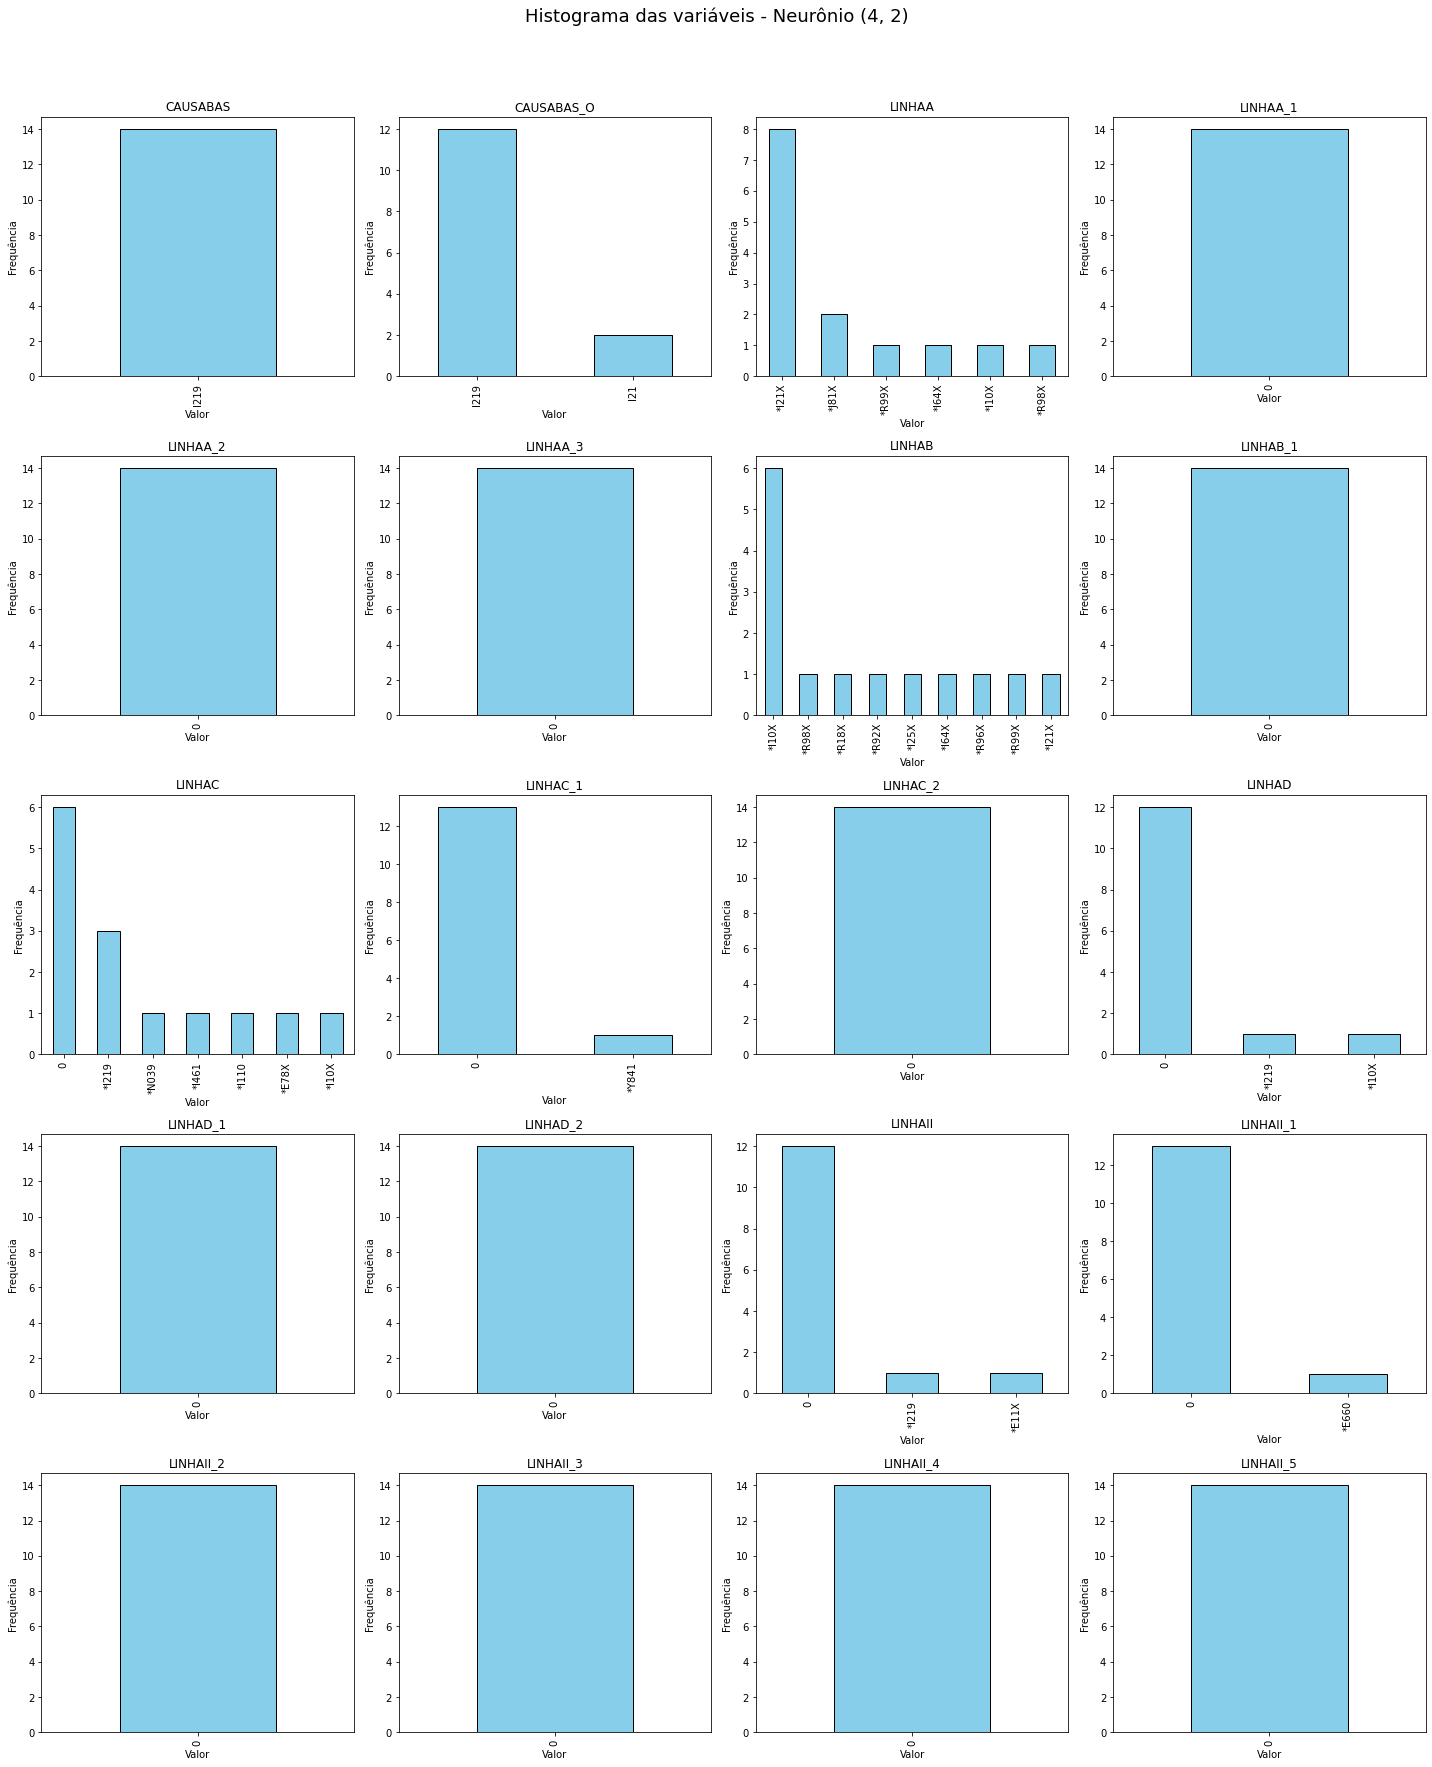

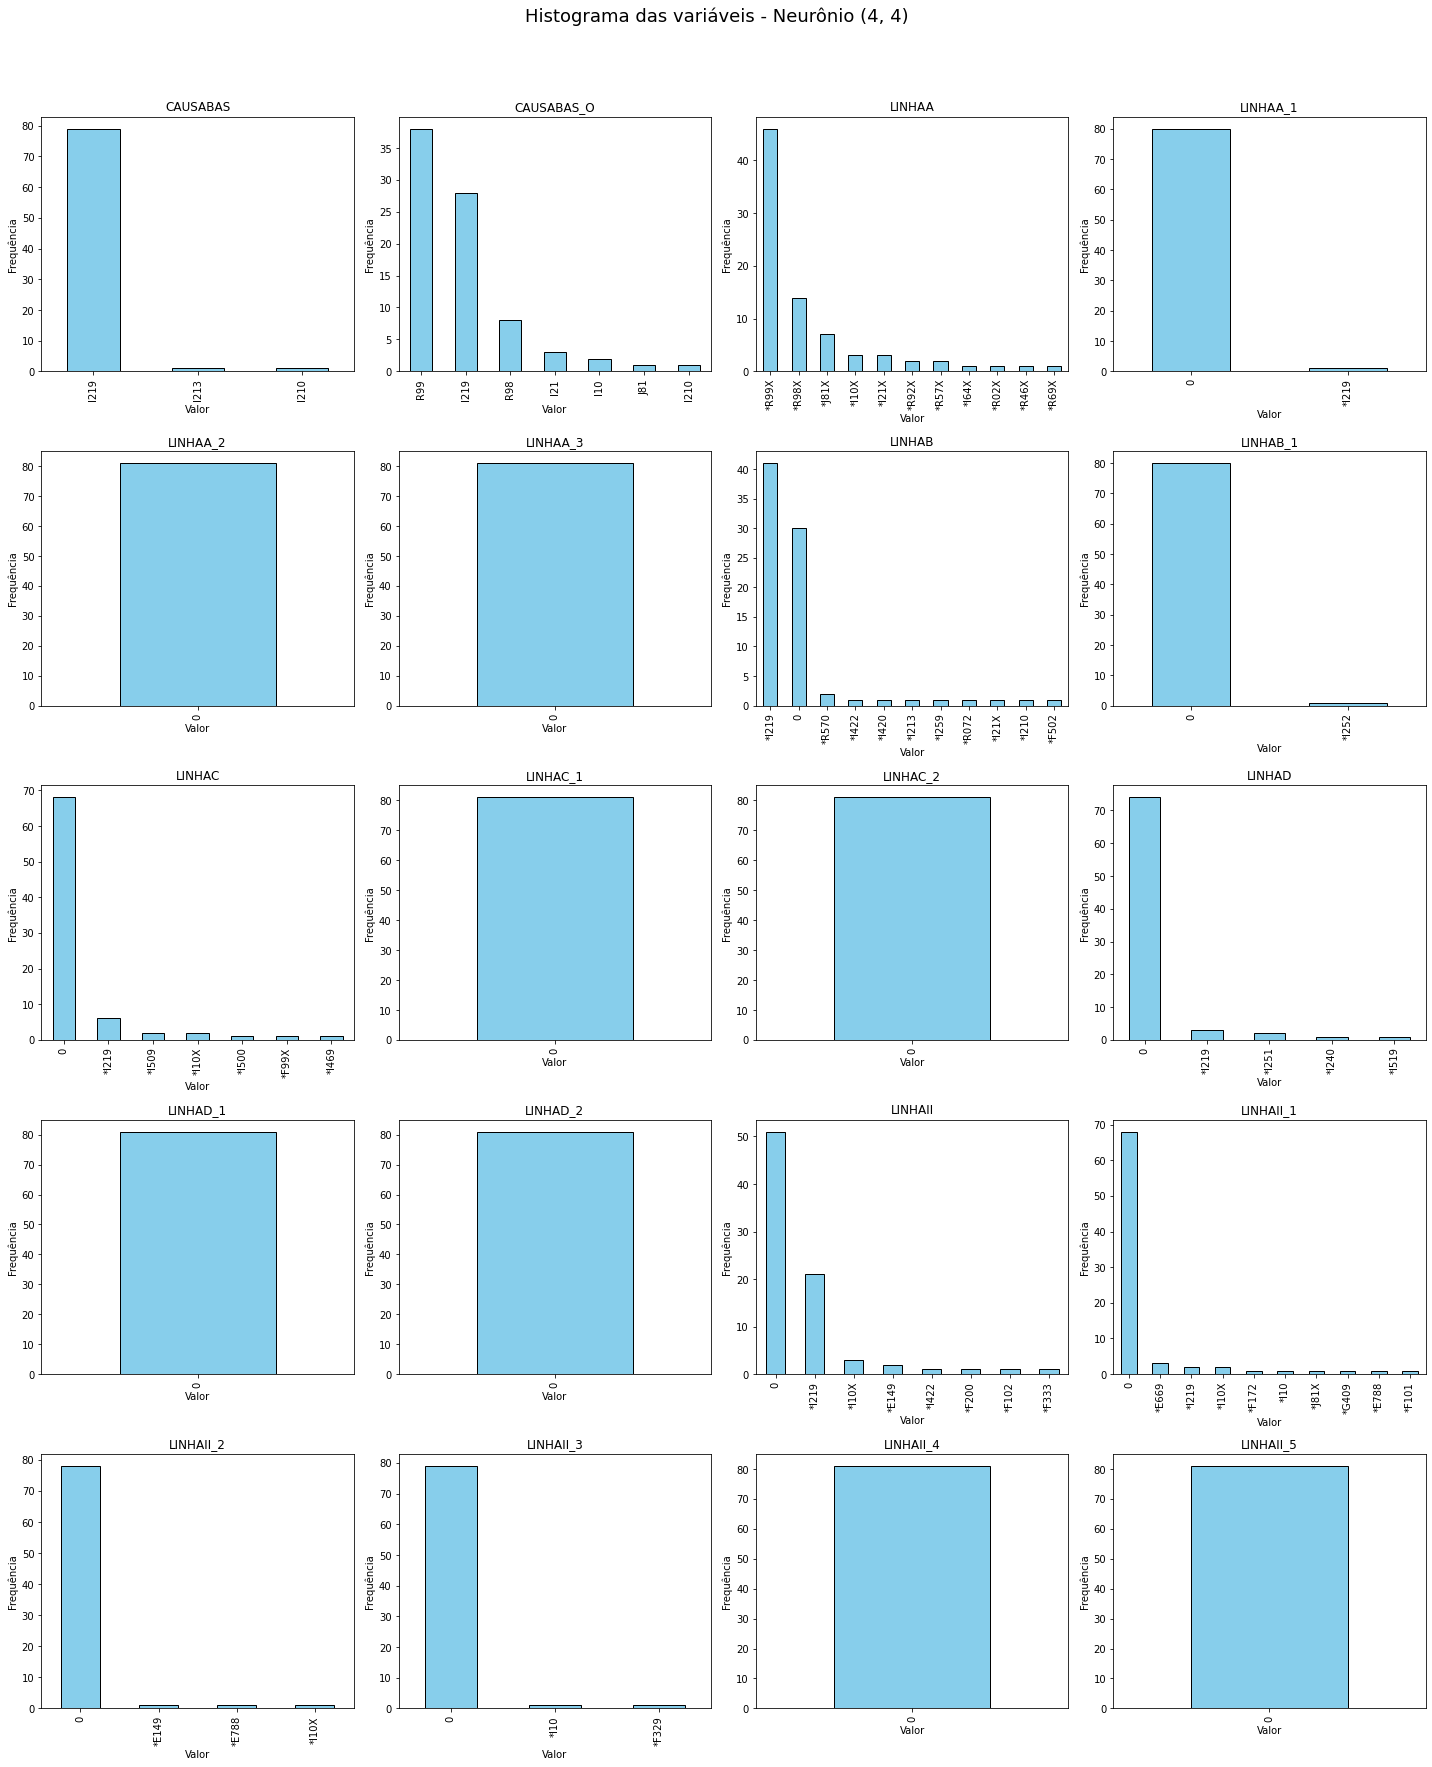

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensões do mapa SOM atualizadas para 5x5
x, y = 5, 5

# 1. Carregar os dados ORIGINAIS com CIDs no formato correto
df_original = pd.read_csv('/home/giselle/Documentos/dados_cids_separados.csv')  # ← AJUSTE se necessário

# 2. Criar dicionário para guardar instâncias por neurônio
instancias_por_neuronio = {(i, j): [] for i in range(x) for j in range(y)}

# 3. Associar cada instância normalizada ao seu neurônio vencedor no SOM
for idx, x_norm in enumerate(dados_normalizados):
    neuronio = som.winner(x_norm)
    linha_original = df_original.iloc[idx]
    instancias_por_neuronio[neuronio].append(linha_original)

# 4. Gerar histogramas para cada neurônio com base nos dados originais
for neuronio, instancias in instancias_por_neuronio.items():
    if not instancias:
        print(f"Neurônio {neuronio} não possui instâncias atribuídas.")
        continue

    df_neuronio = pd.DataFrame(instancias)

    num_variaveis = len(df_neuronio.columns)
    ncols = 4
    nrows = int(np.ceil(num_variaveis / ncols))

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
    fig.suptitle(f'Histograma das variáveis - Neurônio {neuronio}', fontsize=18)

    for i, coluna in enumerate(df_neuronio.columns):
        ax = axs.flat[i]
        try:
            df_neuronio[coluna].dropna().astype(str).value_counts().plot.bar(
                ax=ax, color='skyblue', edgecolor='black'
            )
            ax.set_title(coluna)
            ax.set_xlabel('Valor')
            ax.set_ylabel('Frequência')
        except Exception as e:
            ax.set_visible(False)
            print(f"Erro ao plotar coluna '{coluna}' no neurônio {neuronio}: {e}")

    for j in range(i + 1, len(axs.flat)):
        axs.flat[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


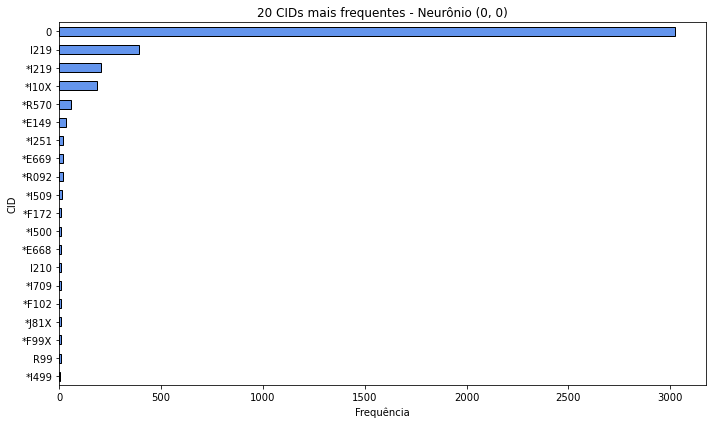

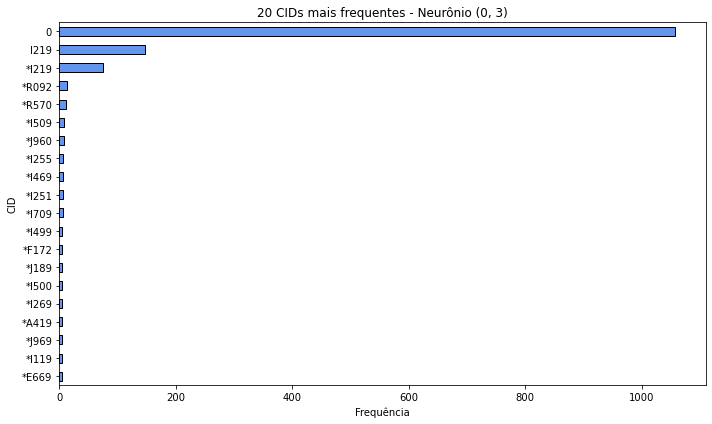

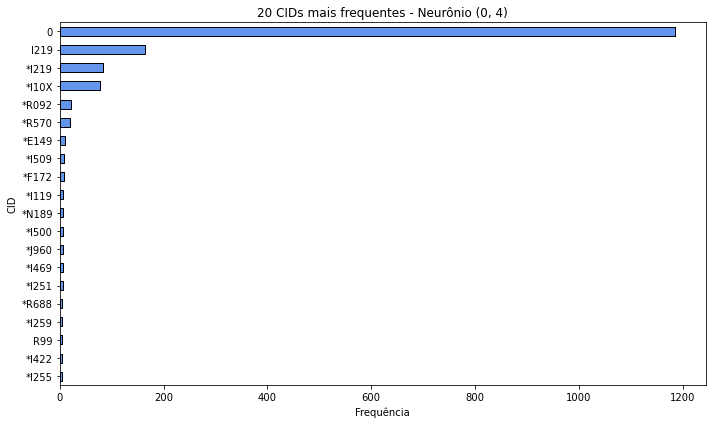

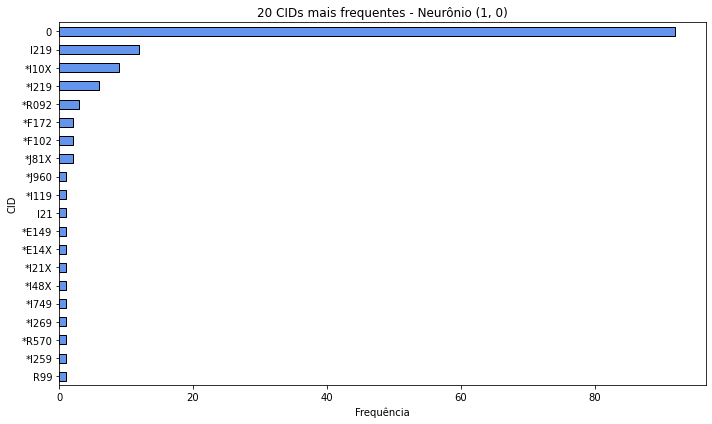

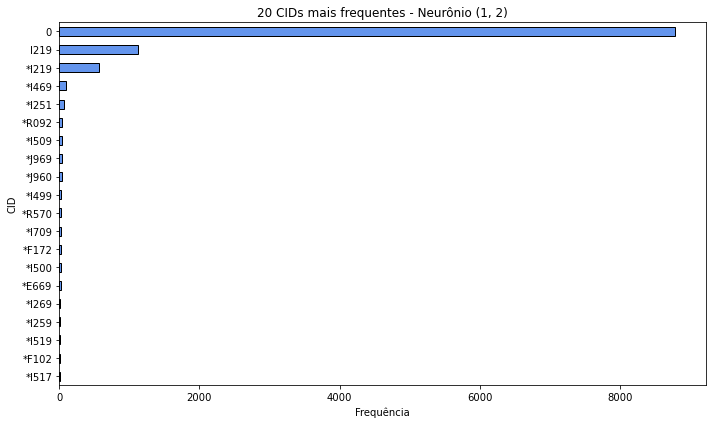

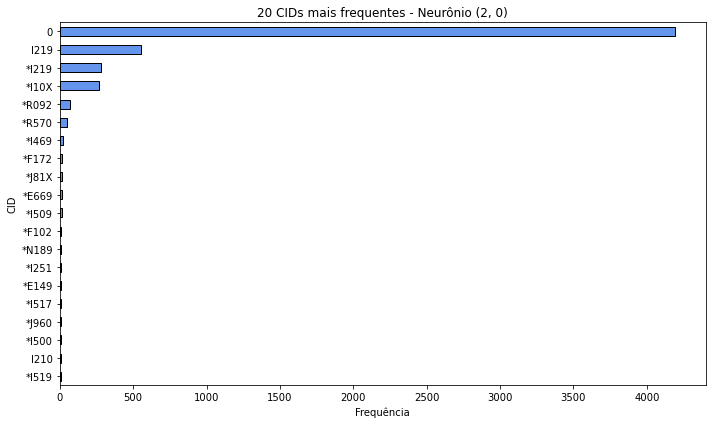

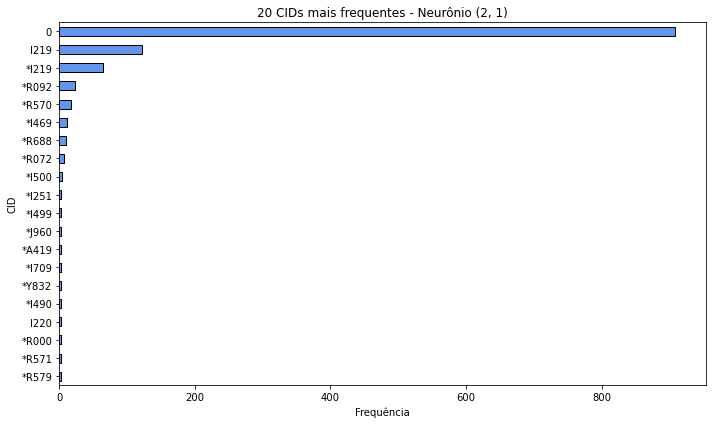

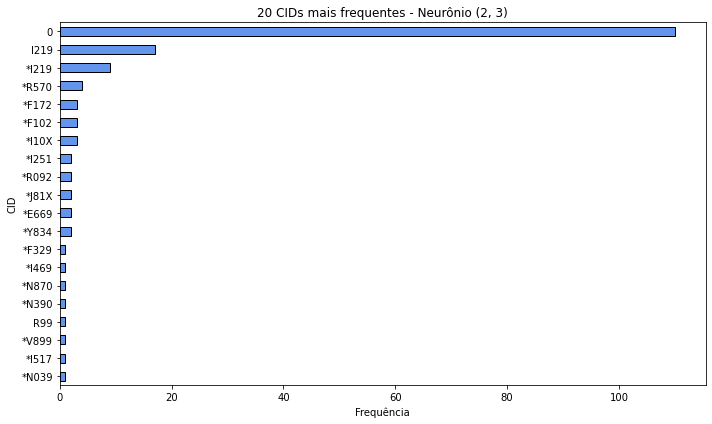

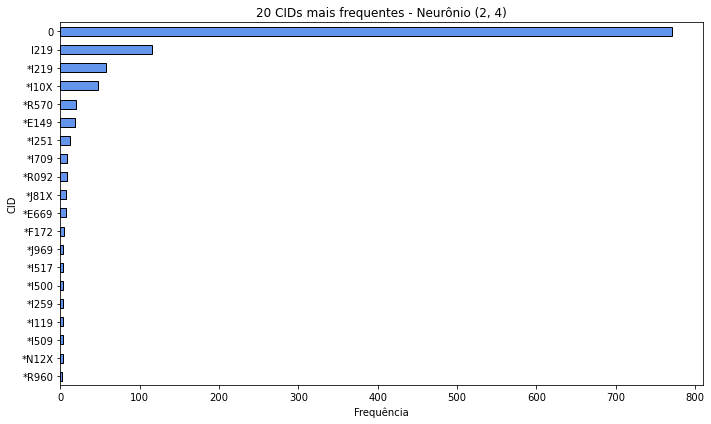

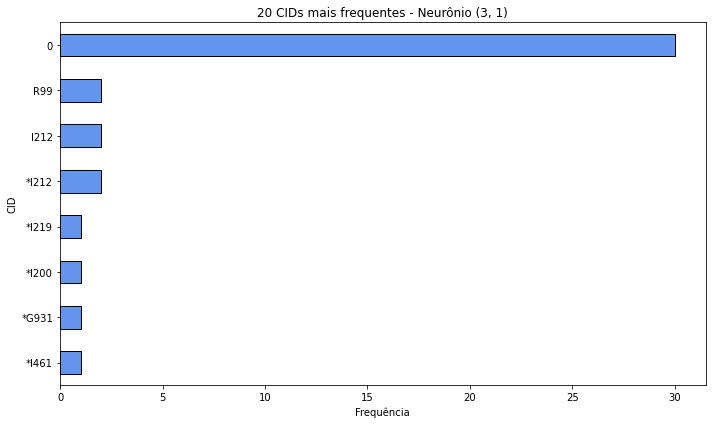

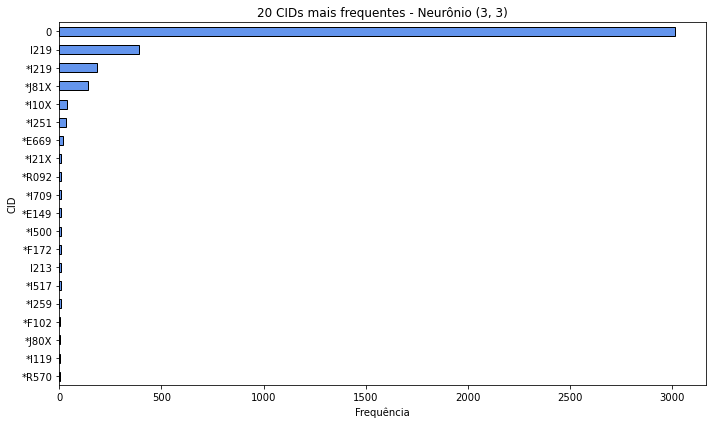

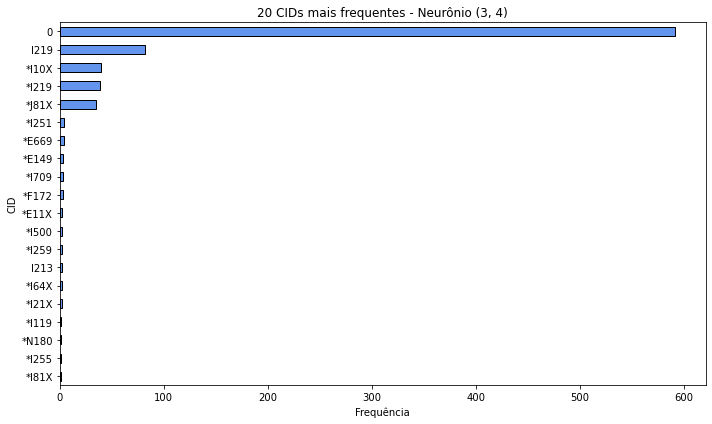

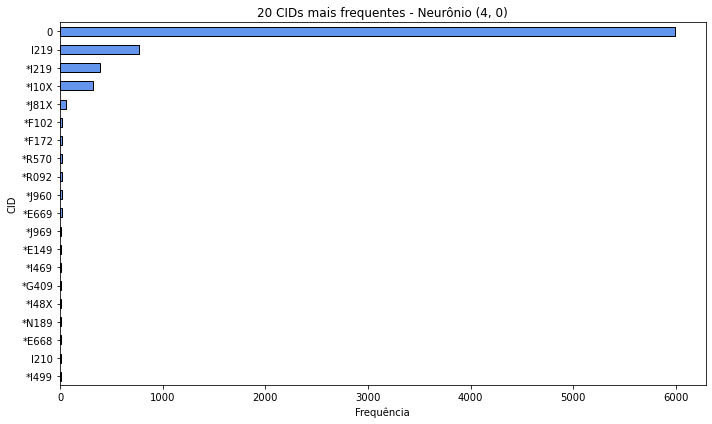

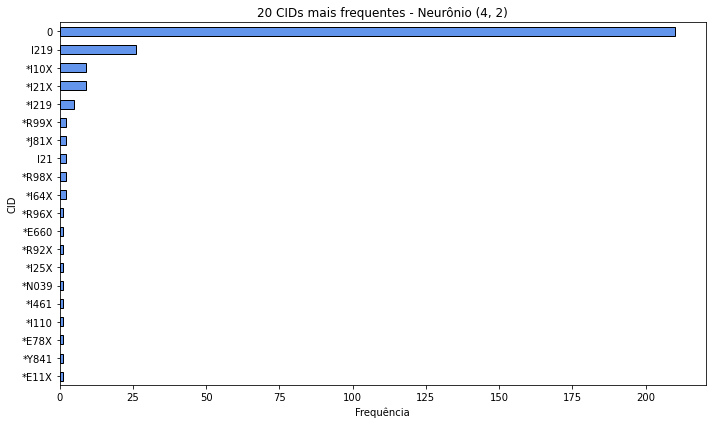

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obter dimensões reais do novo SOM
x_real, y_real = som.get_weights().shape[:2]

# 1. Carregar os dados originais com CIDs não modificados
df_original = pd.read_csv('/home/giselle/Documentos/dados_cids_separados.csv')

# 2. Definir colunas que contêm os CIDs
colunas_cid = [
    'LINHAA', 'LINHAA_1', 'LINHAA_2', 'LINHAA_3',
    'LINHAB', 'LINHAB_1',
    'LINHAC', 'LINHAC_1', 'LINHAC_2',
    'LINHAD', 'LINHAD_1', 'LINHAD_2',
    'LINHAII', 'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5',
    'CAUSABAS', 'CAUSABAS_O'
]

# 3. Criar dicionário de instâncias por neurônio com shape real
instancias_por_neuronio = {(i, j): [] for i in range(x_real) for j in range(y_real)}

# 4. Associar cada instância normalizada ao seu neurônio vencedor
for idx, x_norm in enumerate(dados_normalizados):
    neuronio = som.winner(x_norm)
    linha_original = df_original.iloc[idx]
    instancias_por_neuronio[neuronio].append(linha_original)

# 5. Para cada neurônio, contar os 20 CIDs mais frequentes
for neuronio, instancias in instancias_por_neuronio.items():
    if not instancias:
        print(f"⚠️ Neurônio {neuronio} não possui instâncias.")
        continue

    df_neuronio = pd.DataFrame(instancias)

    # Combinar todas as colunas de CID em uma única série
    todos_cids = pd.Series(dtype=str)
    for coluna in colunas_cid:
        if coluna in df_neuronio.columns:
            cids_col = df_neuronio[coluna].dropna().astype(str)
            todos_cids = pd.concat([todos_cids, cids_col])

    # Contagem e seleção dos 20 CIDs mais frequentes
    contagem_cids = todos_cids.value_counts().sort_values(ascending=True).tail(20)

    # Plot
    plt.figure(figsize=(10, 6))
    contagem_cids.plot(kind='barh', color='cornflowerblue', edgecolor='black')
    plt.title(f'20 CIDs mais frequentes - Neurônio {neuronio}')
    plt.xlabel('Frequência')
    plt.ylabel('CID')
    plt.tight_layout()
    plt.show()
